# Pre-Equilibrium Maximazation of Yield #

In [1]:
# make sure jupyter path is correct for loading local moudules
import sys
# path to steric_simulator module relative to notebook
sys.path.append("../../")
import copy

In [2]:
from steric_free_simulator import ReactionNetwork, VectorizedRxnNet, VecSim, Optimizer, EquilibriumSolver

EnergyExplorer Module is not available. Check Rosetta installation. <ipykernel.iostream.OutStream object at 0x7fddee3d8c88>


We'll start with the AP2 complex that we've worked with before. Pairwise $\Delta Gs$ were derived from the PDB structures via Rossetta

In [3]:
base_input = '../input_files/ap2.pwr'
rn = ReactionNetwork(base_input, one_step=True)
rn.resolve_tree()
vec_rn = VectorizedRxnNet(rn, dev='cpu')

['A']
['M']
['B']
['S']
-----
{'A'}
{'A'}
set()
-----
{'A'}
{'M'}
{'A'}
False
Allowed edges: 
('A', 'B')
Allowed edges: 
('A', 'M')
Connected Nodes:  ['A', 'M']
Connected Edges:  [('A', 'M')]
Allowed edges: 
('A', 'S')
Allowed edges: 
('B', 'M')
Allowed edges: 
('M', 'S')
New node added--1
['A', 'M']
New node added--2
[0, 1, 2, 3, 4]
-----
{'A'}
{'B'}
{'A'}
False
Allowed edges: 
('A', 'B')
Connected Nodes:  ['A', 'B']
Connected Edges:  [('A', 'B')]
Allowed edges: 
('A', 'M')
Allowed edges: 
('A', 'S')
Allowed edges: 
('B', 'M')
Allowed edges: 
('M', 'S')
New node added--1
['A', 'B']
New node added--2
[0, 1, 2, 3, 4, 5]
-----
{'A'}
{'S'}
{'A'}
False
Allowed edges: 
('A', 'B')
Allowed edges: 
('A', 'M')
Allowed edges: 
('A', 'S')
Connected Nodes:  ['A', 'S']
Connected Edges:  [('A', 'S')]
Allowed edges: 
('B', 'M')
Allowed edges: 
('M', 'S')
New node added--1
['A', 'S']
New node added--2
[0, 1, 2, 3, 4, 5, 6]
Allowed edges: 
('A', 'B')
Allowed edges: 
('A', 'M')
Allowed edges: 
('A', 'S'

## The Equilibrium Solution ##
First we will find the equilibrium solution for this system.

In [4]:
vec_rn.update_reaction_net(rn)
poly_system = EquilibriumSolver(rn)
solution = poly_system.solve()
print(solution)
print("Equilibrium expected yield: ", 100 * solution[-1] / min(vec_rn.initial_copies[:vec_rn.num_monomers]), '%')

Matrix([[0.6613480], [0.1865490], [2.122359], [1.848616], [0.2186914], [0.6787456], [0.5886030], [0.1570410], [2.051878], [0.08902459], [1.158073], [0.6040870], [1.727316], [0.4714269]])
Equilibrium expected yield:  10.5464624878544 %


## Using the optimizer with a 1 second simulation runtime ##

In [5]:
vec_rn.reset(reset_params=True)
optim = Optimizer(reaction_network=vec_rn,
                  sim_runtime=1,
                  optim_iterations=5000,
                  learning_rate=.001,
                  device='cpu')
optim.rn.update_reaction_net(rn)
optim.optimize()

Using CPU
Reaction Parameters before optimization: 
[Parameter containing:
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1.], dtype=torch.float64, requires_grad=True)]
Using CPU
yield on sim iteration 0 was 10.4%
current params: tensor([1.0010, 0.9990, 0.9990, 0.9990, 1.0010, 0.9990, 1.0010, 0.9990, 0.9990,
        0.9990, 0.9990, 1.0010, 0.9990, 1.0010, 1.0010, 0.9990, 1.0010, 0.9990,
        0.9990, 1.0010, 0.9990], dtype=torch.float64)
Using CPU
yield on sim iteration 1 was 10.4%
current params: tensor([1.0020, 0.9980, 0.9980, 0.9980, 1.0020, 0.9980, 1.0020, 0.9980, 0.9980,
        0.9980, 0.9980, 1.0020, 0.9980, 1.0020, 1.0020, 0.9980, 1.0020, 0.9980,
        0.9980, 1.0020, 0.9980], dtype=torch.float64)
Using CPU
yield on sim iteration 2 was 10.4%
current params: tensor([1.0030, 0.9970, 0.9970, 0.9970, 1.0030, 0.9970, 1.0030, 0.9970, 0.9970,
        0.9970, 0.9970, 1.0030, 0.9970, 1.0030, 1.0030, 0.9970, 1.0030, 0.9970,
        0.9

yield on sim iteration 33 was 10.4%
current params: tensor([1.0368, 0.9663, 0.9660, 0.9665, 1.0306, 0.9677, 1.0337, 0.9666, 0.9665,
        0.9664, 0.9674, 1.0336, 0.9660, 1.0313, 1.0336, 0.9661, 1.0336, 0.9670,
        0.9669, 1.0336, 0.9661], dtype=torch.float64)
Using CPU
yield on sim iteration 34 was 10.4%
current params: tensor([1.0380, 0.9653, 0.9650, 0.9655, 1.0313, 0.9669, 1.0347, 0.9656, 0.9655,
        0.9655, 0.9665, 1.0346, 0.9650, 1.0321, 1.0345, 0.9651, 1.0346, 0.9661,
        0.9660, 1.0345, 0.9651], dtype=torch.float64)
Using CPU
yield on sim iteration 35 was 10.4%
current params: tensor([1.0393, 0.9643, 0.9640, 0.9646, 1.0319, 0.9660, 1.0356, 0.9646, 0.9645,
        0.9645, 0.9656, 1.0356, 0.9640, 1.0328, 1.0355, 0.9640, 1.0355, 0.9652,
        0.9651, 1.0355, 0.9641], dtype=torch.float64)
Using CPU
yield on sim iteration 36 was 10.4%
current params: tensor([1.0405, 0.9633, 0.9629, 0.9636, 1.0325, 0.9652, 1.0366, 0.9637, 0.9635,
        0.9635, 0.9648, 1.0366, 0.9630, 

yield on sim iteration 71 was 10.4%
current params: tensor([1.0868, 0.9297, 0.9272, 0.9313, 1.0362, 0.9428, 1.0704, 0.9318, 0.9310,
        0.9311, 0.9413, 1.0698, 0.9274, 1.0461, 1.0695, 0.9276, 1.0698, 0.9360,
        0.9348, 1.0696, 0.9278], dtype=torch.float64)
Using CPU
yield on sim iteration 72 was 10.4%
current params: tensor([1.0882, 0.9288, 0.9261, 0.9304, 1.0356, 0.9424, 1.0713, 0.9310, 0.9301,
        0.9302, 0.9409, 1.0707, 0.9263, 1.0460, 1.0705, 0.9265, 1.0708, 0.9353,
        0.9340, 1.0706, 0.9268], dtype=torch.float64)
Using CPU
yield on sim iteration 73 was 10.4%
current params: tensor([1.0896, 0.9278, 0.9251, 0.9295, 1.0350, 0.9420, 1.0723, 0.9301, 0.9292,
        0.9293, 0.9406, 1.0717, 0.9253, 1.0458, 1.0714, 0.9255, 1.0717, 0.9347,
        0.9332, 1.0715, 0.9258], dtype=torch.float64)
Using CPU
yield on sim iteration 74 was 10.4%
current params: tensor([1.0910, 0.9269, 0.9240, 0.9286, 1.0343, 0.9416, 1.0732, 0.9292, 0.9283,
        0.9284, 0.9402, 1.0726, 0.9242, 

yield on sim iteration 107 was 10.4%
current params: tensor([1.1395, 0.8967, 0.8889, 0.9010, 0.9933, 0.9414, 1.1047, 0.9030, 0.9009,
        0.9014, 0.9436, 1.1027, 0.8890, 1.0213, 1.1023, 0.8889, 1.1035, 0.9171,
        0.9079, 1.1031, 0.8898], dtype=torch.float64)
Using CPU
yield on sim iteration 108 was 10.4%
current params: tensor([1.1410, 0.8958, 0.8877, 0.9002, 0.9916, 0.9419, 1.1056, 0.9022, 0.9001,
        0.9006, 0.9443, 1.1037, 0.8879, 1.0200, 1.1032, 0.8877, 1.1045, 0.9168,
        0.9072, 1.1041, 0.8886], dtype=torch.float64)
Using CPU
yield on sim iteration 109 was 10.4%
current params: tensor([1.1425, 0.8949, 0.8866, 0.8994, 0.9898, 0.9423, 1.1066, 0.9015, 0.8993,
        0.8999, 0.9450, 1.1046, 0.8868, 1.0186, 1.1041, 0.8866, 1.1055, 0.9165,
        0.9064, 1.1050, 0.8875], dtype=torch.float64)
Using CPU
yield on sim iteration 110 was 10.4%
current params: tensor([1.1441, 0.8940, 0.8855, 0.8986, 0.9881, 0.9428, 1.1076, 0.9008, 0.8986,
        0.8991, 0.9458, 1.1055, 0.88

yield on sim iteration 143 was 10.5%
current params: tensor([1.1958, 0.8661, 0.8480, 0.8761, 0.9264, 0.9756, 1.1399, 0.8809, 0.8767,
        0.8783, 0.9884, 1.1351, 0.8478, 0.9618, 1.1347, 0.8455, 1.1384, 0.9167,
        0.8780, 1.1377, 0.8474], dtype=torch.float64)
Using CPU
yield on sim iteration 144 was 10.5%
current params: tensor([1.1974, 0.8653, 0.8469, 0.8755, 0.9244, 0.9771, 1.1408, 0.8804, 0.8761,
        0.8778, 0.9900, 1.1360, 0.8466, 0.9600, 1.1356, 0.8443, 1.1394, 0.9171,
        0.8770, 1.1386, 0.8461], dtype=torch.float64)
Using CPU
yield on sim iteration 145 was 10.5%
current params: tensor([1.1989, 0.8646, 0.8457, 0.8750, 0.9225, 0.9786, 1.1418, 0.8800, 0.8756,
        0.8773, 0.9917, 1.1368, 0.8455, 0.9581, 1.1365, 0.8430, 1.1404, 0.9175,
        0.8760, 1.1396, 0.8449], dtype=torch.float64)
Using CPU
yield on sim iteration 146 was 10.5%
current params: tensor([1.2005, 0.8638, 0.8445, 0.8744, 0.9205, 0.9800, 1.1428, 0.8795, 0.8751,
        0.8769, 0.9934, 1.1377, 0.84

current params: tensor([1.2552, 0.8401, 0.8044, 0.8629, 0.8524, 1.0394, 1.1766, 0.8725, 0.8639,
        0.8679, 1.0565, 1.1671, 0.8036, 0.8890, 1.1671, 0.7960, 1.1754, 0.9479,
        0.8359, 1.1740, 0.7992], dtype=torch.float64)
Using CPU
yield on sim iteration 180 was 10.5%
current params: tensor([1.2569, 0.8395, 0.8031, 0.8628, 0.8502, 1.0414, 1.1776, 0.8726, 0.8638,
        0.8679, 1.0586, 1.1680, 0.8023, 0.8868, 1.1681, 0.7945, 1.1765, 0.9493,
        0.8345, 1.1751, 0.7977], dtype=torch.float64)
Using CPU
yield on sim iteration 181 was 10.5%
current params: tensor([1.2586, 0.8388, 0.8018, 0.8627, 0.8481, 1.0434, 1.1787, 0.8727, 0.8636,
        0.8679, 1.0606, 1.1689, 0.8010, 0.8847, 1.1690, 0.7930, 1.1776, 0.9507,
        0.8331, 1.1762, 0.7962], dtype=torch.float64)
Using CPU
yield on sim iteration 182 was 10.5%
current params: tensor([1.2604, 0.8382, 0.8005, 0.8627, 0.8459, 1.0454, 1.1798, 0.8728, 0.8635,
        0.8679, 1.0627, 1.1698, 0.7997, 0.8825, 1.1699, 0.7915, 1.1787, 0

current params: tensor([1.3216, 0.8212, 0.7545, 0.8751, 0.7696, 1.1188, 1.2180, 0.8919, 0.8724,
        0.8818, 1.1359, 1.2017, 0.7531, 0.8058, 1.2028, 0.7351, 1.2180, 1.0149,
        0.7714, 1.2155, 0.7399], dtype=torch.float64)
Using CPU
yield on sim iteration 218 was 10.6%
current params: tensor([1.3234, 0.8209, 0.7532, 0.8760, 0.7673, 1.1210, 1.2191, 0.8929, 0.8731,
        0.8826, 1.1380, 1.2026, 0.7517, 0.8035, 1.2037, 0.7334, 1.2191, 1.0169,
        0.7694, 1.2167, 0.7383], dtype=torch.float64)
Using CPU
yield on sim iteration 219 was 10.6%
current params: tensor([1.3252, 0.8206, 0.7518, 0.8769, 0.7651, 1.1232, 1.2202, 0.8940, 0.8737,
        0.8835, 1.1401, 1.2035, 0.7503, 0.8013, 1.2047, 0.7317, 1.2203, 1.0190,
        0.7674, 1.2178, 0.7366], dtype=torch.float64)
Using CPU
yield on sim iteration 220 was 10.6%
current params: tensor([1.3270, 0.8203, 0.7505, 0.8778, 0.7629, 1.1253, 1.2214, 0.8951, 0.8744,
        0.8844, 1.1422, 1.2044, 0.7490, 0.7990, 1.2056, 0.7300, 1.2215, 1

yield on sim iteration 254 was 10.8%
current params: tensor([1.3889, 0.8198, 0.7039, 0.9269, 0.6855, 1.1995, 1.2601, 0.9475, 0.9135,
        0.9298, 1.2152, 1.2357, 0.7021, 0.7207, 1.2387, 0.6677, 1.2620, 1.0951,
        0.6886, 1.2583, 0.6742], dtype=torch.float64)
Using CPU
yield on sim iteration 255 was 10.8%
current params: tensor([1.3908, 0.8202, 0.7025, 0.9288, 0.6832, 1.2016, 1.2613, 0.9494, 0.9151,
        0.9316, 1.2174, 1.2366, 0.7007, 0.7184, 1.2397, 0.6657, 1.2632, 1.0973,
        0.6862, 1.2594, 0.6724], dtype=torch.float64)
Using CPU
yield on sim iteration 256 was 10.8%
current params: tensor([1.3926, 0.8205, 0.7012, 0.9307, 0.6809, 1.2038, 1.2624, 0.9513, 0.9167,
        0.9333, 1.2195, 1.2375, 0.6993, 0.7160, 1.2407, 0.6638, 1.2644, 1.0995,
        0.6837, 1.2606, 0.6705], dtype=torch.float64)
Using CPU
yield on sim iteration 257 was 10.8%
current params: tensor([1.3944, 0.8209, 0.6998, 0.9326, 0.6786, 1.2060, 1.2635, 0.9532, 0.9183,
        0.9351, 1.2217, 1.2385, 0.69

yield on sim iteration 290 was 11.0%
current params: tensor([1.4574, 0.8463, 0.6545, 1.0055, 0.5996, 1.2802, 1.3026, 1.0245, 0.9811,
        1.0012, 1.2940, 1.2697, 0.6528, 0.6332, 1.2755, 0.5938, 1.3072, 1.1785,
        0.5956, 1.3021, 0.6017], dtype=torch.float64)
Using CPU
yield on sim iteration 291 was 11.0%
current params: tensor([1.4593, 0.8476, 0.6532, 1.0079, 0.5972, 1.2825, 1.3038, 1.0268, 0.9832,
        1.0034, 1.2962, 1.2707, 0.6515, 0.6307, 1.2766, 0.5916, 1.3085, 1.1808,
        0.5929, 1.3034, 0.5995], dtype=torch.float64)
Using CPU
yield on sim iteration 292 was 11.0%
current params: tensor([1.4613, 0.8488, 0.6518, 1.0103, 0.5947, 1.2848, 1.3050, 1.0291, 0.9854,
        1.0056, 1.2984, 1.2717, 0.6502, 0.6282, 1.2777, 0.5894, 1.3098, 1.1832,
        0.5902, 1.3047, 0.5974], dtype=torch.float64)
Using CPU
yield on sim iteration 293 was 11.0%
current params: tensor([1.4632, 0.8501, 0.6505, 1.0127, 0.5922, 1.2871, 1.3062, 1.0314, 0.9875,
        1.0077, 1.3007, 1.2727, 0.64

yield on sim iteration 326 was 11.3%
current params: tensor([1.5302, 0.9068, 0.6090, 1.0946, 0.5084, 1.3649, 1.3473, 1.1104, 1.0619,
        1.0823, 1.3752, 1.3065, 0.6075, 0.5400, 1.3161, 0.5109, 1.3556, 1.2659,
        0.4949, 1.3497, 0.5187], dtype=torch.float64)
Using CPU
yield on sim iteration 327 was 11.3%
current params: tensor([1.5323, 0.9089, 0.6079, 1.0972, 0.5058, 1.3673, 1.3485, 1.1128, 1.0642,
        1.0846, 1.3775, 1.3075, 0.6064, 0.5373, 1.3173, 0.5084, 1.3570, 1.2683,
        0.4920, 1.3510, 0.5163], dtype=torch.float64)
Using CPU
yield on sim iteration 328 was 11.3%
current params: tensor([1.5344, 0.9110, 0.6068, 1.0997, 0.5032, 1.3697, 1.3498, 1.1153, 1.0665,
        1.0869, 1.3798, 1.3086, 0.6053, 0.5346, 1.3185, 0.5060, 1.3584, 1.2708,
        0.4891, 1.3524, 0.5138], dtype=torch.float64)
Using CPU
yield on sim iteration 329 was 11.4%
current params: tensor([1.5365, 0.9132, 0.6057, 1.1023, 0.5006, 1.3721, 1.3511, 1.1177, 1.0689,
        1.0892, 1.3821, 1.3097, 0.60

yield on sim iteration 362 was 12.0%
current params: tensor([1.6079, 0.9901, 0.5787, 1.1874, 0.4112, 1.4539, 1.3946, 1.1993, 1.1468,
        1.1655, 1.4591, 1.3478, 0.5777, 0.4407, 1.3625, 0.4187, 1.4079, 1.3568,
        0.3884, 1.4016, 0.4252], dtype=torch.float64)
Using CPU
yield on sim iteration 363 was 12.0%
current params: tensor([1.6101, 0.9925, 0.5783, 1.1900, 0.4084, 1.4565, 1.3959, 1.2018, 1.1492,
        1.1678, 1.4615, 1.3490, 0.5774, 0.4379, 1.3639, 0.4160, 1.4094, 1.3593,
        0.3854, 1.4032, 0.4224], dtype=torch.float64)
Using CPU
yield on sim iteration 364 was 12.0%
current params: tensor([1.6124, 0.9950, 0.5779, 1.1926, 0.4056, 1.4590, 1.3973, 1.2043, 1.1515,
        1.1701, 1.4638, 1.3503, 0.5770, 0.4350, 1.3653, 0.4133, 1.4109, 1.3619,
        0.3824, 1.4047, 0.4197], dtype=torch.float64)
Using CPU
yield on sim iteration 365 was 12.1%
current params: tensor([1.6146, 0.9974, 0.5776, 1.1952, 0.4028, 1.4616, 1.3987, 1.2068, 1.1539,
        1.1724, 1.4662, 1.3515, 0.57

current params: tensor([1.6855, 1.0740, 0.5875, 1.2766, 0.3134, 1.5414, 1.4427, 1.2838, 1.2273,
        1.2424, 1.5406, 1.3932, 0.5917, 0.3411, 1.4140, 0.3230, 1.4620, 1.4452,
        0.2832, 1.4564, 0.3279], dtype=torch.float64)
Using CPU
yield on sim iteration 397 was 13.2%
current params: tensor([1.6879, 1.0765, 0.5886, 1.2793, 0.3104, 1.5440, 1.4442, 1.2862, 1.2297,
        1.2446, 1.5431, 1.3947, 0.5931, 0.3381, 1.4157, 0.3201, 1.4636, 1.4478,
        0.2801, 1.4581, 0.3249], dtype=torch.float64)
Using CPU
yield on sim iteration 398 was 13.3%
current params: tensor([1.6902, 1.0789, 0.5897, 1.2819, 0.3075, 1.5466, 1.4456, 1.2887, 1.2320,
        1.2468, 1.5455, 1.3961, 0.5945, 0.3351, 1.4173, 0.3172, 1.4653, 1.4504,
        0.2769, 1.4598, 0.3220], dtype=torch.float64)
Using CPU
yield on sim iteration 399 was 13.3%
current params: tensor([1.6925, 1.0813, 0.5909, 1.2845, 0.3045, 1.5492, 1.4471, 1.2911, 1.2344,
        1.2490, 1.5479, 1.3976, 0.5960, 0.3321, 1.4190, 0.3142, 1.4670, 1

yield on sim iteration 429 was 15.4%
current params: tensor([1.7621, 1.1503, 0.6470, 1.3627, 0.2133, 1.6265, 1.4939, 1.3628, 1.3028,
        1.3107, 1.6201, 1.4438, 0.6615, 0.2394, 1.4719, 0.2232, 1.5203, 1.5305,
        0.1777, 1.5168, 0.2269], dtype=torch.float64)
Using CPU
yield on sim iteration 430 was 15.5%
current params: tensor([1.7643, 1.1524, 0.6493, 1.3653, 0.2102, 1.6290, 1.4956, 1.3651, 1.3050,
        1.3125, 1.6225, 1.4455, 0.6640, 0.2362, 1.4737, 0.2201, 1.5221, 1.5330,
        0.1745, 1.5187, 0.2237], dtype=torch.float64)
Using CPU
yield on sim iteration 431 was 15.6%
current params: tensor([1.7666, 1.1545, 0.6517, 1.3678, 0.2071, 1.6315, 1.4972, 1.3673, 1.3072,
        1.3144, 1.6248, 1.4471, 0.6666, 0.2331, 1.4756, 0.2170, 1.5240, 1.5355,
        0.1712, 1.5207, 0.2206], dtype=torch.float64)
Using CPU
yield on sim iteration 432 was 15.8%
current params: tensor([1.7689, 1.1566, 0.6540, 1.3703, 0.2040, 1.6340, 1.4988, 1.3696, 1.3093,
        1.3162, 1.6272, 1.4487, 0.66

yield on sim iteration 461 was 19.5%
current params: tensor([1.8310, 1.2078, 0.7218, 1.4388, 0.1134, 1.7036, 1.5473, 1.4285, 1.3655,
        1.3603, 1.6908, 1.4952, 0.7424, 0.1377, 1.5319, 0.1226, 1.5810, 1.6066,
        0.0748, 1.5817, 0.1257], dtype=torch.float64)
Using CPU
yield on sim iteration 462 was 19.7%
current params: tensor([1.8330, 1.2092, 0.7239, 1.4408, 0.1102, 1.7058, 1.5490, 1.4303, 1.3671,
        1.3614, 1.6927, 1.4968, 0.7447, 0.1345, 1.5338, 0.1194, 1.5829, 1.6088,
        0.0717, 1.5838, 0.1225], dtype=torch.float64)
Using CPU
yield on sim iteration 463 was 19.9%
current params: tensor([1.8349, 1.2105, 0.7260, 1.4429, 0.1071, 1.7080, 1.5507, 1.4319, 1.3687,
        1.3625, 1.6947, 1.4983, 0.7470, 0.1313, 1.5356, 0.1163, 1.5848, 1.6109,
        0.0685, 1.5858, 0.1193], dtype=torch.float64)
Using CPU
yield on sim iteration 464 was 20.0%
current params: tensor([1.8368, 1.2118, 0.7281, 1.4449, 0.1040, 1.7102, 1.5523, 1.4336, 1.3703,
        1.3635, 1.6966, 1.4998, 0.74

yield on sim iteration 493 was 24.2%
current params: tensor([1.8834, 1.2324, 0.7751, 1.4856, 0.0683, 1.7641, 1.5971, 1.4655, 1.4007,
        1.3803, 1.7356, 1.5370, 0.7979, 0.0668, 1.5840, 0.0236, 1.6367, 1.6627,
        0.0213, 1.6452, 0.0266], dtype=torch.float64)
Using CPU
yield on sim iteration 494 was 24.3%
current params: tensor([1.8848, 1.2325, 0.7763, 1.4864, 0.0680, 1.7656, 1.5985, 1.4661, 1.4013,
        1.3805, 1.7363, 1.5380, 0.7990, 0.0673, 1.5854, 0.0206, 1.6383, 1.6640,
        0.0218, 1.6470, 0.0237], dtype=torch.float64)
Using CPU
yield on sim iteration 495 was 24.4%
current params: tensor([1.8861, 1.2326, 0.7775, 1.4871, 0.0677, 1.7670, 1.6000, 1.4666, 1.4018,
        1.3806, 1.7370, 1.5390, 0.8001, 0.0677, 1.5867, 0.0177, 1.6398, 1.6653,
        0.0222, 1.6488, 0.0207], dtype=torch.float64)
Using CPU
yield on sim iteration 496 was 24.5%
current params: tensor([1.8875, 1.2326, 0.7786, 1.4878, 0.0672, 1.7685, 1.6014, 1.4671, 1.4022,
        1.3808, 1.7376, 1.5401, 0.80

yield on sim iteration 525 was 24.7%
current params: tensor([1.9241, 1.2277, 0.8077, 1.4996, 0.0597, 1.8050, 1.6401, 1.4767, 1.4108,
        1.3829, 1.7487, 1.5670, 0.8260, 0.0655, 1.6215, 0.0183, 1.6803, 1.6990,
        0.0218, 1.6962, 0.0208], dtype=torch.float64)
Using CPU
yield on sim iteration 526 was 24.7%
current params: tensor([1.9253, 1.2275, 0.8086, 1.4999, 0.0598, 1.8061, 1.6413, 1.4770, 1.4111,
        1.3829, 1.7490, 1.5679, 0.8268, 0.0656, 1.6226, 0.0180, 1.6816, 1.7000,
        0.0216, 1.6977, 0.0206], dtype=torch.float64)
Using CPU
yield on sim iteration 527 was 24.7%
current params: tensor([1.9265, 1.2273, 0.8095, 1.5002, 0.0599, 1.8073, 1.6426, 1.4773, 1.4113,
        1.3830, 1.7493, 1.5688, 0.8276, 0.0656, 1.6237, 0.0178, 1.6829, 1.7011,
        0.0214, 1.6992, 0.0205], dtype=torch.float64)
Using CPU
yield on sim iteration 528 was 24.7%
current params: tensor([1.9277, 1.2271, 0.8105, 1.5006, 0.0598, 1.8085, 1.6438, 1.4776, 1.4116,
        1.3830, 1.7496, 1.5697, 0.82

Using CPU
yield on sim iteration 557 was 25.0%
current params: tensor([1.9608, 1.2194, 0.8363, 1.5088, 0.0619, 1.8403, 1.6791, 1.4848, 1.4177,
        1.3841, 1.7576, 1.5942, 0.8495, 0.0602, 1.6545, 0.0151, 1.7190, 1.7307,
        0.0160, 1.7408, 0.0128], dtype=torch.float64)
Using CPU
yield on sim iteration 558 was 25.0%
current params: tensor([1.9619, 1.2192, 0.8371, 1.5091, 0.0615, 1.8413, 1.6803, 1.4850, 1.4179,
        1.3841, 1.7579, 1.5950, 0.8502, 0.0606, 1.6555, 0.0156, 1.7201, 1.7317,
        0.0158, 1.7422, 0.0125], dtype=torch.float64)
Using CPU
yield on sim iteration 559 was 25.0%
current params: tensor([1.9630, 1.2189, 0.8380, 1.5093, 0.0611, 1.8424, 1.6814, 1.4853, 1.4181,
        1.3841, 1.7581, 1.5958, 0.8509, 0.0608, 1.6564, 0.0161, 1.7212, 1.7326,
        0.0156, 1.7435, 0.0122], dtype=torch.float64)
Using CPU
yield on sim iteration 560 was 25.0%
current params: tensor([1.9641, 1.2186, 0.8388, 1.5096, 0.0607, 1.8434, 1.6826, 1.4855, 1.4183,
        1.3842, 1.7583, 1.

Using CPU
yield on sim iteration 594 was 25.0%
current params: tensor([1.9999, 1.2109, 0.8672, 1.5203, 0.0616, 1.8777, 1.7205, 1.4939, 1.4257,
        1.3852, 1.7682, 1.6236, 0.8751, 0.0604, 1.6889, 0.0129, 1.7590, 1.7636,
        0.0155, 1.7867, 0.0185], dtype=torch.float64)
Using CPU
yield on sim iteration 595 was 25.0%
current params: tensor([2.0010, 1.2107, 0.8681, 1.5207, 0.0614, 1.8787, 1.7215, 1.4942, 1.4259,
        1.3853, 1.7686, 1.6244, 0.8758, 0.0603, 1.6898, 0.0126, 1.7600, 1.7644,
        0.0162, 1.7879, 0.0183], dtype=torch.float64)
Using CPU
yield on sim iteration 596 was 25.0%
current params: tensor([2.0020, 1.2105, 0.8689, 1.5210, 0.0611, 1.8797, 1.7226, 1.4945, 1.4262,
        1.3853, 1.7689, 1.6252, 0.8765, 0.0601, 1.6907, 0.0123, 1.7611, 1.7653,
        0.0169, 1.7890, 0.0182], dtype=torch.float64)
Using CPU
yield on sim iteration 597 was 25.0%
current params: tensor([2.0030, 1.2102, 0.8697, 1.5214, 0.0608, 1.8806, 1.7237, 1.4948, 1.4264,
        1.3854, 1.7693, 1.

yield on sim iteration 628 was 25.0%
current params: tensor([2.0338, 1.2032, 0.8954, 1.5339, 0.0597, 1.9099, 1.7560, 1.5040, 1.4341,
        1.3868, 1.7801, 1.6497, 0.8986, 0.0595, 1.7190, 0.0163, 1.7935, 1.7930,
        0.0197, 1.8252, 0.0119], dtype=torch.float64)
Using CPU
yield on sim iteration 629 was 25.1%
current params: tensor([2.0348, 1.2030, 0.8962, 1.5343, 0.0600, 1.9108, 1.7570, 1.5043, 1.4344,
        1.3869, 1.7805, 1.6505, 0.8993, 0.0599, 1.7198, 0.0162, 1.7945, 1.7938,
        0.0196, 1.8263, 0.0117], dtype=torch.float64)
Using CPU
yield on sim iteration 630 was 25.1%
current params: tensor([2.0358, 1.2029, 0.8970, 1.5347, 0.0601, 1.9118, 1.7580, 1.5046, 1.4346,
        1.3869, 1.7809, 1.6512, 0.9000, 0.0602, 1.7207, 0.0161, 1.7955, 1.7947,
        0.0195, 1.8275, 0.0115], dtype=torch.float64)
Using CPU
yield on sim iteration 631 was 25.1%
current params: tensor([2.0367, 1.2027, 0.8978, 1.5351, 0.0602, 1.9127, 1.7590, 1.5049, 1.4349,
        1.3870, 1.7812, 1.6520, 0.90

yield on sim iteration 664 was 25.1%
current params: tensor([2.0677, 1.1962, 0.9242, 1.5494, 0.0600, 1.9423, 1.7914, 1.5154, 1.4438,
        1.3886, 1.7938, 1.6763, 0.9232, 0.0606, 1.7491, 0.0130, 1.8278, 1.8226,
        0.0148, 1.8633, 0.0174], dtype=torch.float64)
Using CPU
yield on sim iteration 665 was 25.1%
current params: tensor([2.0686, 1.1960, 0.9250, 1.5499, 0.0598, 1.9431, 1.7924, 1.5157, 1.4441,
        1.3886, 1.7942, 1.6771, 0.9239, 0.0606, 1.7499, 0.0136, 1.8287, 1.8234,
        0.0147, 1.8643, 0.0173], dtype=torch.float64)
Using CPU
yield on sim iteration 666 was 25.1%
current params: tensor([2.0696, 1.1958, 0.9258, 1.5504, 0.0596, 1.9440, 1.7933, 1.5161, 1.4443,
        1.3887, 1.7947, 1.6778, 0.9245, 0.0605, 1.7507, 0.0141, 1.8296, 1.8242,
        0.0145, 1.8653, 0.0172], dtype=torch.float64)
Using CPU
yield on sim iteration 667 was 25.1%
current params: tensor([2.0705, 1.1956, 0.9266, 1.5509, 0.0594, 1.9448, 1.7943, 1.5164, 1.4446,
        1.3888, 1.7951, 1.6785, 0.92

yield on sim iteration 694 was 25.2%
current params: tensor([2.0947, 1.1913, 0.9477, 1.5639, 0.0600, 1.9679, 1.8195, 1.5257, 1.4526,
        1.3906, 1.8069, 1.6978, 0.9434, 0.0605, 1.7729, 0.0141, 1.8546, 1.8462,
        0.0104, 1.8929, 0.0125], dtype=torch.float64)
Using CPU
yield on sim iteration 695 was 25.2%
current params: tensor([2.0956, 1.1912, 0.9484, 1.5644, 0.0598, 1.9688, 1.8204, 1.5260, 1.4528,
        1.3907, 1.8074, 1.6985, 0.9441, 0.0605, 1.7736, 0.0139, 1.8554, 1.8469,
        0.0102, 1.8939, 0.0124], dtype=torch.float64)
Using CPU
yield on sim iteration 696 was 25.2%
current params: tensor([2.0964, 1.1910, 0.9492, 1.5649, 0.0596, 1.9696, 1.8213, 1.5264, 1.4531,
        1.3907, 1.8078, 1.6992, 0.9447, 0.0603, 1.7744, 0.0137, 1.8563, 1.8477,
        0.0101, 1.8949, 0.0122], dtype=torch.float64)
Using CPU
yield on sim iteration 697 was 25.2%
current params: tensor([2.0973, 1.1909, 0.9499, 1.5653, 0.0594, 1.9704, 1.8222, 1.5267, 1.4534,
        1.3908, 1.8082, 1.6999, 0.94

current params: tensor([2.1260, 1.1853, 0.9751, 1.5816, 0.0600, 1.9974, 1.8520, 1.5383, 1.4631,
        1.3929, 1.8227, 1.7230, 0.9670, 0.0594, 1.8002, 0.0156, 1.8854, 1.8735,
        0.0193, 1.9268, 0.0171], dtype=torch.float64)
Using CPU
yield on sim iteration 731 was 25.1%
current params: tensor([2.1268, 1.1851, 0.9759, 1.5822, 0.0600, 1.9982, 1.8529, 1.5387, 1.4635,
        1.3930, 1.8232, 1.7237, 0.9677, 0.0597, 1.8010, 0.0156, 1.8863, 1.8742,
        0.0192, 1.9277, 0.0171], dtype=torch.float64)
Using CPU
yield on sim iteration 732 was 25.1%
current params: tensor([2.1277, 1.1850, 0.9767, 1.5828, 0.0600, 1.9990, 1.8538, 1.5391, 1.4638,
        1.3931, 1.8238, 1.7244, 0.9684, 0.0600, 1.8018, 0.0156, 1.8871, 1.8750,
        0.0192, 1.9286, 0.0170], dtype=torch.float64)
Using CPU
yield on sim iteration 733 was 25.1%
current params: tensor([2.1285, 1.1849, 0.9774, 1.5834, 0.0599, 1.9998, 1.8547, 1.5395, 1.4642,
        1.3932, 1.8243, 1.7251, 0.9691, 0.0602, 1.8025, 0.0156, 1.8879, 1

yield on sim iteration 765 was 25.3%
current params: tensor([2.1553, 1.1808, 1.0021, 1.6029, 0.0597, 2.0253, 1.8823, 1.5527, 1.4753,
        1.3958, 1.8413, 1.7472, 0.9909, 0.0604, 1.8264, 0.0109, 1.9145, 1.9000,
        0.0154, 1.9582, 0.0124], dtype=torch.float64)
Using CPU
yield on sim iteration 766 was 25.3%
current params: tensor([2.1561, 1.1807, 1.0028, 1.6035, 0.0595, 2.0261, 1.8832, 1.5531, 1.4757,
        1.3959, 1.8418, 1.7479, 0.9916, 0.0604, 1.8272, 0.0107, 1.9153, 1.9008,
        0.0152, 1.9591, 0.0122], dtype=torch.float64)
Using CPU
yield on sim iteration 767 was 25.3%
current params: tensor([2.1569, 1.1805, 1.0036, 1.6041, 0.0598, 2.0269, 1.8841, 1.5535, 1.4760,
        1.3959, 1.8423, 1.7485, 0.9922, 0.0604, 1.8279, 0.0105, 1.9161, 1.9015,
        0.0151, 1.9600, 0.0120], dtype=torch.float64)
Using CPU
yield on sim iteration 768 was 25.3%
current params: tensor([2.1578, 1.1803, 1.0043, 1.6046, 0.0599, 2.0276, 1.8849, 1.5539, 1.4763,
        1.3960, 1.8428, 1.7492, 0.99

yield on sim iteration 800 was 25.2%
current params: tensor([2.1837, 1.1765, 1.0280, 1.6233, 0.0598, 2.0519, 1.9117, 1.5667, 1.4872,
        1.3986, 1.8595, 1.7706, 1.0137, 0.0599, 1.8511, 0.0143, 1.9419, 1.9250,
        0.0109, 1.9881, 0.0168], dtype=torch.float64)
Using CPU
yield on sim iteration 801 was 25.2%
current params: tensor([2.1845, 1.1764, 1.0287, 1.6240, 0.0598, 2.0527, 1.9125, 1.5672, 1.4875,
        1.3987, 1.8601, 1.7713, 1.0143, 0.0597, 1.8518, 0.0142, 1.9427, 1.9257,
        0.0107, 1.9889, 0.0167], dtype=torch.float64)
Using CPU
yield on sim iteration 802 was 25.2%
current params: tensor([2.1853, 1.1763, 1.0294, 1.6246, 0.0598, 2.0534, 1.9133, 1.5676, 1.4879,
        1.3988, 1.8607, 1.7719, 1.0150, 0.0595, 1.8525, 0.0141, 1.9434, 1.9264,
        0.0106, 1.9897, 0.0167], dtype=torch.float64)
Using CPU
yield on sim iteration 803 was 25.2%
current params: tensor([2.1861, 1.1763, 1.0302, 1.6253, 0.0598, 2.0542, 1.9142, 1.5680, 1.4883,
        1.3989, 1.8612, 1.7726, 1.01

current params: tensor([2.2105, 1.1728, 1.0530, 1.6452, 0.0600, 2.0770, 1.9393, 1.5815, 1.4996,
        1.4020, 1.8790, 1.7931, 1.0359, 0.0603, 1.8745, 0.0141, 1.9677, 1.9490,
        0.0191, 2.0158, 0.0126], dtype=torch.float64)
Using CPU
yield on sim iteration 835 was 25.2%
current params: tensor([2.2112, 1.1726, 1.0537, 1.6459, 0.0599, 2.0777, 1.9402, 1.5819, 1.4999,
        1.4020, 1.8796, 1.7937, 1.0365, 0.0604, 1.8752, 0.0144, 1.9685, 1.9497,
        0.0190, 2.0166, 0.0125], dtype=torch.float64)
Using CPU
yield on sim iteration 836 was 25.2%
current params: tensor([2.2120, 1.1725, 1.0545, 1.6465, 0.0597, 2.0784, 1.9410, 1.5823, 1.5003,
        1.4021, 1.8802, 1.7944, 1.0372, 0.0605, 1.8759, 0.0146, 1.9693, 1.9505,
        0.0190, 2.0175, 0.0123], dtype=torch.float64)
Using CPU
yield on sim iteration 837 was 25.2%
current params: tensor([2.2128, 1.1724, 1.0552, 1.6472, 0.0595, 2.0792, 1.9418, 1.5828, 1.5007,
        1.4022, 1.8808, 1.7950, 1.0378, 0.0605, 1.8766, 0.0148, 1.9700, 1

yield on sim iteration 869 was 25.3%
current params: tensor([2.2373, 1.1699, 1.0787, 1.6698, 0.0596, 2.1023, 1.9670, 1.5978, 1.5134,
        1.4052, 1.9004, 1.8159, 1.0591, 0.0602, 1.8983, 0.0121, 1.9937, 1.9735,
        0.0158, 2.0436, 0.0165], dtype=torch.float64)
Using CPU
yield on sim iteration 870 was 25.3%
current params: tensor([2.2381, 1.1698, 1.0794, 1.6705, 0.0597, 2.1030, 1.9678, 1.5983, 1.5138,
        1.4053, 1.9011, 1.8166, 1.0598, 0.0601, 1.8989, 0.0120, 1.9944, 1.9742,
        0.0157, 2.0443, 0.0165], dtype=torch.float64)
Using CPU
yield on sim iteration 871 was 25.3%
current params: tensor([2.2388, 1.1697, 1.0802, 1.6712, 0.0598, 2.1037, 1.9686, 1.5987, 1.5142,
        1.4054, 1.9017, 1.8172, 1.0605, 0.0600, 1.8996, 0.0118, 1.9952, 1.9749,
        0.0155, 2.0451, 0.0165], dtype=torch.float64)
Using CPU
yield on sim iteration 872 was 25.3%
current params: tensor([2.2396, 1.1697, 1.0809, 1.6719, 0.0599, 2.1044, 1.9693, 1.5992, 1.5146,
        1.4055, 1.9023, 1.8179, 1.06

yield on sim iteration 904 was 25.3%
current params: tensor([2.2636, 1.1667, 1.1039, 1.6945, 0.0600, 2.1267, 1.9941, 1.6143, 1.5273,
        1.4091, 1.9225, 1.8384, 1.0818, 0.0595, 1.9213, 0.0148, 2.0189, 1.9975,
        0.0117, 2.0703, 0.0129], dtype=torch.float64)
Using CPU
yield on sim iteration 905 was 25.3%
current params: tensor([2.2644, 1.1666, 1.1047, 1.6953, 0.0600, 2.1274, 1.9949, 1.6147, 1.5277,
        1.4092, 1.9231, 1.8391, 1.0824, 0.0597, 1.9219, 0.0148, 2.0196, 1.9981,
        0.0115, 2.0711, 0.0127], dtype=torch.float64)
Using CPU
yield on sim iteration 906 was 25.3%
current params: tensor([2.2651, 1.1666, 1.1054, 1.6960, 0.0599, 2.1281, 1.9956, 1.6152, 1.5281,
        1.4093, 1.9238, 1.8397, 1.0831, 0.0600, 1.9226, 0.0147, 2.0203, 1.9988,
        0.0114, 2.0718, 0.0126], dtype=torch.float64)
Using CPU
yield on sim iteration 907 was 25.3%
current params: tensor([2.2658, 1.1665, 1.1061, 1.6967, 0.0597, 2.1288, 1.9964, 1.6157, 1.5285,
        1.4094, 1.9244, 1.8404, 1.08

current params: tensor([2.2877, 1.1651, 1.1272, 1.7184, 0.0596, 2.1491, 2.0188, 1.6301, 1.5409,
        1.4127, 1.9440, 1.8592, 1.1029, 0.0602, 1.9420, 0.0101, 2.0414, 2.0190,
        0.0186, 2.0944, 0.0158], dtype=torch.float64)
Using CPU
yield on sim iteration 938 was 25.3%
current params: tensor([2.2884, 1.1650, 1.1279, 1.7192, 0.0595, 2.1497, 2.0195, 1.6306, 1.5413,
        1.4128, 1.9446, 1.8598, 1.1036, 0.0603, 1.9426, 0.0099, 2.0421, 2.0196,
        0.0186, 2.0951, 0.0159], dtype=torch.float64)
Using CPU
yield on sim iteration 939 was 25.3%
current params: tensor([2.2891, 1.1649, 1.1286, 1.7199, 0.0594, 2.1504, 2.0203, 1.6311, 1.5417,
        1.4129, 1.9453, 1.8604, 1.1042, 0.0603, 1.9432, 0.0107, 2.0428, 2.0203,
        0.0187, 2.0958, 0.0160], dtype=torch.float64)
Using CPU
yield on sim iteration 940 was 25.3%
current params: tensor([2.2898, 1.1648, 1.1293, 1.7207, 0.0596, 2.1511, 2.0210, 1.6316, 1.5421,
        1.4130, 1.9459, 1.8611, 1.1049, 0.0603, 1.9439, 0.0114, 2.0434, 2

current params: tensor([2.3093, 1.1632, 1.1487, 1.7421, 0.0599, 2.1692, 2.0410, 1.6457, 1.5541,
        1.4163, 1.9648, 1.8782, 1.1227, 0.0602, 1.9612, 0.0141, 2.0622, 2.0393,
        0.0170, 2.1162, 0.0141], dtype=torch.float64)
Using CPU
yield on sim iteration 968 was 25.3%
current params: tensor([2.3100, 1.1631, 1.1495, 1.7429, 0.0598, 2.1699, 2.0418, 1.6463, 1.5546,
        1.4164, 1.9656, 1.8788, 1.1234, 0.0603, 1.9618, 0.0140, 2.0628, 2.0399,
        0.0169, 2.1169, 0.0140], dtype=torch.float64)
Using CPU
yield on sim iteration 969 was 25.3%
current params: tensor([2.3107, 1.1631, 1.1502, 1.7438, 0.0597, 2.1706, 2.0425, 1.6468, 1.5550,
        1.4165, 1.9663, 1.8794, 1.1240, 0.0602, 1.9624, 0.0138, 2.0635, 2.0406,
        0.0168, 2.1176, 0.0138], dtype=torch.float64)
Using CPU
yield on sim iteration 970 was 25.3%
current params: tensor([2.3114, 1.1631, 1.1509, 1.7446, 0.0595, 2.1712, 2.0432, 1.6474, 1.5555,
        1.4167, 1.9670, 1.8801, 1.1247, 0.0602, 1.9631, 0.0137, 2.0642, 2

yield on sim iteration 999 was 25.4%
current params: tensor([2.3318, 1.1618, 1.1712, 1.7674, 0.0597, 2.1901, 2.0642, 1.6625, 1.5683,
        1.4201, 1.9873, 1.8981, 1.1434, 0.0603, 1.9809, 0.0123, 2.0834, 2.0601,
        0.0135, 2.1385, 0.0115], dtype=torch.float64)
Using CPU
yield on sim iteration 1000 was 25.4%
current params: tensor([2.3325, 1.1617, 1.1719, 1.7682, 0.0596, 2.1907, 2.0649, 1.6630, 1.5688,
        1.4202, 1.9880, 1.8987, 1.1440, 0.0602, 1.9815, 0.0128, 2.0840, 2.0607,
        0.0134, 2.1392, 0.0122], dtype=torch.float64)
Using CPU
yield on sim iteration 1001 was 25.4%
current params: tensor([2.3332, 1.1616, 1.1726, 1.7689, 0.0595, 2.1914, 2.0656, 1.6635, 1.5692,
        1.4203, 1.9886, 1.8993, 1.1446, 0.0601, 1.9821, 0.0132, 2.0847, 2.0614,
        0.0133, 2.1398, 0.0128], dtype=torch.float64)
Using CPU
yield on sim iteration 1002 was 25.4%
current params: tensor([2.3339, 1.1616, 1.1733, 1.7697, 0.0597, 2.1920, 2.0663, 1.6640, 1.5696,
        1.4205, 1.9893, 1.8999, 1

yield on sim iteration 1033 was 25.4%
current params: tensor([2.3554, 1.1610, 1.1948, 1.7945, 0.0595, 2.2118, 2.0883, 1.6804, 1.5838,
        1.4246, 2.0118, 1.9189, 1.1651, 0.0596, 2.0013, 0.0128, 2.1053, 2.0817,
        0.0129, 2.1616, 0.0149], dtype=torch.float64)
Using CPU
yield on sim iteration 1034 was 25.4%
current params: tensor([2.3561, 1.1610, 1.1955, 1.7953, 0.0593, 2.2125, 2.0890, 1.6809, 1.5842,
        1.4247, 2.0126, 1.9195, 1.1658, 0.0594, 2.0019, 0.0126, 2.1059, 2.0823,
        0.0136, 2.1622, 0.0148], dtype=torch.float64)
Using CPU
yield on sim iteration 1035 was 25.4%
current params: tensor([2.3568, 1.1610, 1.1961, 1.7961, 0.0595, 2.2131, 2.0897, 1.6815, 1.5847,
        1.4249, 2.0133, 1.9201, 1.1664, 0.0596, 2.0024, 0.0125, 2.1066, 2.0829,
        0.0143, 2.1629, 0.0146], dtype=torch.float64)
Using CPU
yield on sim iteration 1036 was 25.4%
current params: tensor([2.3574, 1.1610, 1.1968, 1.7970, 0.0597, 2.2137, 2.0904, 1.6820, 1.5852,
        1.4250, 2.0141, 1.9208, 

yield on sim iteration 1067 was 25.3%
current params: tensor([2.3786, 1.1598, 1.2183, 1.8224, 0.0600, 2.2331, 2.1121, 1.6989, 1.5995,
        1.4291, 2.0368, 1.9397, 1.1868, 0.0604, 2.0215, 0.0148, 2.1270, 2.1033,
        0.0178, 2.1842, 0.0104], dtype=torch.float64)
Using CPU
yield on sim iteration 1068 was 25.3%
current params: tensor([2.3793, 1.1598, 1.2190, 1.8232, 0.0601, 2.2337, 2.1128, 1.6995, 1.6000,
        1.4292, 2.0376, 1.9403, 1.1875, 0.0604, 2.0221, 0.0148, 2.1277, 2.1039,
        0.0178, 2.1849, 0.0102], dtype=torch.float64)
Using CPU
yield on sim iteration 1069 was 25.3%
current params: tensor([2.3799, 1.1598, 1.2196, 1.8241, 0.0601, 2.2344, 2.1135, 1.7000, 1.6005,
        1.4293, 2.0383, 1.9409, 1.1881, 0.0604, 2.0227, 0.0148, 2.1283, 2.1046,
        0.0177, 2.1855, 0.0101], dtype=torch.float64)
Using CPU
yield on sim iteration 1070 was 25.3%
current params: tensor([2.3806, 1.1598, 1.2203, 1.8249, 0.0601, 2.2350, 2.1142, 1.7006, 1.6010,
        1.4295, 2.0391, 1.9415, 

yield on sim iteration 1100 was 25.4%
current params: tensor([2.4007, 1.1598, 1.2412, 1.8510, 0.0598, 2.2537, 2.1348, 1.7178, 1.6159,
        1.4336, 2.0624, 1.9598, 1.2084, 0.0602, 2.0411, 0.0113, 2.1478, 2.1243,
        0.0146, 2.2057, 0.0155], dtype=torch.float64)
Using CPU
yield on sim iteration 1101 was 25.4%
current params: tensor([2.4014, 1.1597, 1.2418, 1.8518, 0.0599, 2.2543, 2.1355, 1.7184, 1.6164,
        1.4337, 2.0632, 1.9604, 1.2091, 0.0601, 2.0417, 0.0111, 2.1484, 2.1249,
        0.0145, 2.2064, 0.0154], dtype=torch.float64)
Using CPU
yield on sim iteration 1102 was 25.4%
current params: tensor([2.4021, 1.1597, 1.2425, 1.8527, 0.0599, 2.2549, 2.1362, 1.7190, 1.6169,
        1.4339, 2.0639, 1.9610, 1.2097, 0.0599, 2.0422, 0.0110, 2.1490, 2.1255,
        0.0144, 2.2070, 0.0153], dtype=torch.float64)
Using CPU
yield on sim iteration 1103 was 25.4%
current params: tensor([2.4027, 1.1597, 1.2432, 1.8536, 0.0598, 2.2555, 2.1369, 1.7195, 1.6174,
        1.4340, 2.0647, 1.9616, 

yield on sim iteration 1130 was 25.4%
current params: tensor([2.4206, 1.1593, 1.2616, 1.8764, 0.0598, 2.2717, 2.1551, 1.7348, 1.6305,
        1.4380, 2.0855, 1.9778, 1.2274, 0.0600, 2.0583, 0.0145, 2.1661, 2.1429,
        0.0114, 2.2247, 0.0119], dtype=torch.float64)
Using CPU
yield on sim iteration 1131 was 25.4%
current params: tensor([2.4212, 1.1593, 1.2622, 1.8773, 0.0599, 2.2723, 2.1558, 1.7353, 1.6310,
        1.4382, 2.0863, 1.9784, 1.2281, 0.0599, 2.0589, 0.0145, 2.1667, 2.1435,
        0.0113, 2.2253, 0.0117], dtype=torch.float64)
Using CPU
yield on sim iteration 1132 was 25.4%
current params: tensor([2.4219, 1.1593, 1.2629, 1.8781, 0.0600, 2.2729, 2.1565, 1.7359, 1.6315,
        1.4383, 2.0871, 1.9790, 1.2287, 0.0597, 2.0594, 0.0144, 2.1673, 2.1441,
        0.0111, 2.2260, 0.0116], dtype=torch.float64)
Using CPU
yield on sim iteration 1133 was 25.4%
current params: tensor([2.4225, 1.1594, 1.2636, 1.8790, 0.0600, 2.2735, 2.1571, 1.7365, 1.6320,
        1.4385, 2.0878, 1.9796, 

current params: tensor([2.4420, 1.1599, 1.2836, 1.9043, 0.0599, 2.2914, 2.1771, 1.7534, 1.6468,
        1.4428, 2.1110, 1.9973, 1.2482, 0.0594, 2.0768, 0.0104, 2.1857, 2.1627,
        0.0182, 2.2451, 0.0159], dtype=torch.float64)
Using CPU
yield on sim iteration 1164 was 25.4%
current params: tensor([2.4427, 1.1598, 1.2843, 1.9052, 0.0600, 2.2920, 2.1778, 1.7540, 1.6473,
        1.4429, 2.1118, 1.9979, 1.2489, 0.0596, 2.0774, 0.0103, 2.1863, 2.1633,
        0.0182, 2.2458, 0.0159], dtype=torch.float64)
Using CPU
yield on sim iteration 1165 was 25.4%
current params: tensor([2.4433, 1.1598, 1.2850, 1.9061, 0.0600, 2.2925, 2.1785, 1.7546, 1.6478,
        1.4431, 2.1126, 1.9985, 1.2495, 0.0598, 2.0779, 0.0101, 2.1869, 2.1640,
        0.0182, 2.2464, 0.0159], dtype=torch.float64)
Using CPU
yield on sim iteration 1166 was 25.4%
current params: tensor([2.4440, 1.1598, 1.2857, 1.9069, 0.0600, 2.2931, 2.1791, 1.7552, 1.6483,
        1.4432, 2.1134, 1.9991, 1.2501, 0.0600, 2.0785, 0.0100, 2.1875

yield on sim iteration 1196 was 25.4%
current params: tensor([2.4633, 1.1601, 1.3063, 1.9343, 0.0600, 2.3109, 2.1989, 1.7735, 1.6641,
        1.4480, 2.1381, 2.0171, 1.2697, 0.0602, 2.0957, 0.0138, 2.2056, 2.1834,
        0.0162, 2.2654, 0.0129], dtype=torch.float64)
Using CPU
yield on sim iteration 1197 was 25.4%
current params: tensor([2.4639, 1.1601, 1.3069, 1.9352, 0.0600, 2.3115, 2.1995, 1.7741, 1.6646,
        1.4481, 2.1389, 2.0177, 1.2703, 0.0602, 2.0963, 0.0137, 2.2062, 2.1840,
        0.0161, 2.2660, 0.0128], dtype=torch.float64)
Using CPU
yield on sim iteration 1198 was 25.4%
current params: tensor([2.4646, 1.1601, 1.3076, 1.9361, 0.0600, 2.3120, 2.2002, 1.7747, 1.6652,
        1.4483, 2.1397, 2.0183, 1.2710, 0.0602, 2.0968, 0.0136, 2.2068, 2.1846,
        0.0160, 2.2666, 0.0127], dtype=torch.float64)
Using CPU
yield on sim iteration 1199 was 25.4%
current params: tensor([2.4652, 1.1601, 1.3083, 1.9370, 0.0600, 2.3126, 2.2008, 1.7753, 1.6657,
        1.4484, 2.1406, 2.0189, 

current params: tensor([2.4830, 1.1606, 1.3270, 1.9616, 0.0597, 2.3288, 2.2190, 1.7919, 1.6801,
        1.4526, 2.1629, 2.0354, 1.2893, 0.0601, 2.1129, 0.0118, 2.2236, 2.2020,
        0.0130, 2.2839, 0.0144], dtype=torch.float64)
Using CPU
yield on sim iteration 1228 was 25.4%
current params: tensor([2.4836, 1.1606, 1.3276, 1.9625, 0.0598, 2.3293, 2.2197, 1.7925, 1.6806,
        1.4527, 2.1637, 2.0360, 1.2899, 0.0601, 2.1134, 0.0123, 2.2242, 2.2026,
        0.0129, 2.2845, 0.0147], dtype=torch.float64)
Using CPU
yield on sim iteration 1229 was 25.4%
current params: tensor([2.4843, 1.1606, 1.3283, 1.9633, 0.0599, 2.3299, 2.2203, 1.7931, 1.6811,
        1.4529, 2.1645, 2.0365, 1.2906, 0.0600, 2.1139, 0.0127, 2.2248, 2.2032,
        0.0128, 2.2851, 0.0149], dtype=torch.float64)
Using CPU
yield on sim iteration 1230 was 25.4%
current params: tensor([2.4849, 1.1606, 1.3290, 1.9642, 0.0599, 2.3305, 2.2210, 1.7937, 1.6817,
        1.4531, 2.1653, 2.0371, 1.2912, 0.0599, 2.1145, 0.0131, 2.2253

current params: tensor([2.5031, 1.1618, 1.3482, 1.9901, 0.0598, 2.3470, 2.2396, 1.8111, 1.6970,
        1.4579, 2.1892, 2.0541, 1.3096, 0.0599, 2.1303, 0.0132, 2.2419, 2.2210,
        0.0127, 2.3027, 0.0143], dtype=torch.float64)
Using CPU
yield on sim iteration 1260 was 25.4%
current params: tensor([2.5037, 1.1618, 1.3489, 1.9909, 0.0599, 2.3476, 2.2402, 1.8117, 1.6975,
        1.4581, 2.1900, 2.0547, 1.3102, 0.0598, 2.1309, 0.0130, 2.2425, 2.2216,
        0.0135, 2.3033, 0.0142], dtype=torch.float64)
Using CPU
yield on sim iteration 1261 was 25.4%
current params: tensor([2.5043, 1.1619, 1.3495, 1.9918, 0.0599, 2.3482, 2.2409, 1.8123, 1.6981,
        1.4583, 2.1908, 2.0553, 1.3108, 0.0596, 2.1314, 0.0129, 2.2431, 2.2222,
        0.0141, 2.3039, 0.0141], dtype=torch.float64)
Using CPU
yield on sim iteration 1262 was 25.4%
current params: tensor([2.5050, 1.1619, 1.3502, 1.9927, 0.0600, 2.3488, 2.2415, 1.8129, 1.6986,
        1.4585, 2.1917, 2.0559, 1.3115, 0.0595, 2.1320, 0.0128, 2.2436

current params: tensor([2.5223, 1.1627, 1.3688, 2.0181, 0.0597, 2.3644, 2.2592, 1.8301, 1.7136,
        1.4631, 2.2149, 2.0722, 1.3292, 0.0594, 2.1471, 0.0136, 2.2594, 2.2395,
        0.0177, 2.3205, 0.0105], dtype=torch.float64)
Using CPU
yield on sim iteration 1291 was 25.5%
current params: tensor([2.5230, 1.1627, 1.3694, 2.0190, 0.0599, 2.3650, 2.2598, 1.8307, 1.7142,
        1.4632, 2.2157, 2.0728, 1.3298, 0.0597, 2.1477, 0.0138, 2.2600, 2.2401,
        0.0177, 2.3211, 0.0103], dtype=torch.float64)
Using CPU
yield on sim iteration 1292 was 25.4%
current params: tensor([2.5236, 1.1627, 1.3701, 2.0199, 0.0600, 2.3655, 2.2605, 1.8314, 1.7147,
        1.4634, 2.2165, 2.0734, 1.3305, 0.0599, 2.1482, 0.0140, 2.2605, 2.2407,
        0.0176, 2.3216, 0.0102], dtype=torch.float64)
Using CPU
yield on sim iteration 1293 was 25.4%
current params: tensor([2.5242, 1.1628, 1.3708, 2.0208, 0.0601, 2.3661, 2.2611, 1.8320, 1.7153,
        1.4635, 2.2174, 2.0740, 1.3311, 0.0601, 2.1487, 0.0142, 2.2611

current params: tensor([2.5408, 1.1641, 1.3888, 2.0458, 0.0598, 2.3813, 2.2781, 1.8490, 1.7303,
        1.4679, 2.2403, 2.0898, 1.3485, 0.0596, 2.1635, 0.0128, 2.2764, 2.2575,
        0.0150, 2.3378, 0.0156], dtype=torch.float64)
Using CPU
yield on sim iteration 1321 was 25.4%
current params: tensor([2.5415, 1.1642, 1.3894, 2.0467, 0.0597, 2.3819, 2.2788, 1.8496, 1.7309,
        1.4681, 2.2411, 2.0904, 1.3492, 0.0598, 2.1641, 0.0127, 2.2770, 2.2581,
        0.0149, 2.3383, 0.0155], dtype=torch.float64)
Using CPU
yield on sim iteration 1322 was 25.4%
current params: tensor([2.5421, 1.1642, 1.3901, 2.0477, 0.0595, 2.3825, 2.2794, 1.8503, 1.7315,
        1.4683, 2.2420, 2.0910, 1.3498, 0.0600, 2.1646, 0.0126, 2.2776, 2.2587,
        0.0148, 2.3389, 0.0155], dtype=torch.float64)
Using CPU
yield on sim iteration 1323 was 25.4%
current params: tensor([2.5427, 1.1643, 1.3908, 2.0486, 0.0593, 2.3830, 2.2800, 1.8509, 1.7320,
        1.4685, 2.2429, 2.0916, 1.3505, 0.0601, 2.1652, 0.0124, 2.2781

yield on sim iteration 1350 was 25.5%
current params: tensor([2.5591, 1.1652, 1.4085, 2.0733, 0.0600, 2.3977, 2.2968, 1.8678, 1.7468,
        1.4733, 2.2657, 2.1072, 1.3675, 0.0600, 2.1795, 0.0137, 2.2930, 2.2752,
        0.0120, 2.3545, 0.0124], dtype=torch.float64)
Using CPU
yield on sim iteration 1351 was 25.5%
current params: tensor([2.5597, 1.1653, 1.4092, 2.0741, 0.0599, 2.3982, 2.2974, 1.8684, 1.7474,
        1.4735, 2.2665, 2.1078, 1.3681, 0.0602, 2.1801, 0.0139, 2.2936, 2.2758,
        0.0119, 2.3550, 0.0123], dtype=torch.float64)
Using CPU
yield on sim iteration 1352 was 25.5%
current params: tensor([2.5603, 1.1653, 1.4098, 2.0750, 0.0599, 2.3988, 2.2980, 1.8690, 1.7479,
        1.4737, 2.2674, 2.1084, 1.3687, 0.0602, 2.1806, 0.0141, 2.2941, 2.2764,
        0.0118, 2.3556, 0.0122], dtype=torch.float64)
Using CPU
yield on sim iteration 1353 was 25.5%
current params: tensor([2.5609, 1.1654, 1.4105, 2.0759, 0.0598, 2.3993, 2.2986, 1.8697, 1.7485,
        1.4738, 2.2682, 2.1089, 

current params: tensor([2.5777, 1.1677, 1.4286, 2.1011, 0.0600, 2.4145, 2.3157, 1.8870, 1.7640,
        1.4786, 2.2917, 2.1249, 1.3868, 0.0601, 2.1956, 0.0125, 2.3096, 2.2928,
        0.0166, 2.3714, 0.0150], dtype=torch.float64)
Using CPU
yield on sim iteration 1382 was 25.4%
current params: tensor([2.5783, 1.1678, 1.4292, 2.1020, 0.0600, 2.4151, 2.3164, 1.8876, 1.7646,
        1.4788, 2.2926, 2.1255, 1.3875, 0.0601, 2.1961, 0.0123, 2.3101, 2.2934,
        0.0168, 2.3719, 0.0152], dtype=torch.float64)
Using CPU
yield on sim iteration 1383 was 25.4%
current params: tensor([2.5789, 1.1678, 1.4299, 2.1029, 0.0600, 2.4156, 2.3170, 1.8883, 1.7652,
        1.4790, 2.2934, 2.1261, 1.3881, 0.0601, 2.1966, 0.0122, 2.3106, 2.2940,
        0.0170, 2.3724, 0.0153], dtype=torch.float64)
Using CPU
yield on sim iteration 1384 was 25.4%
current params: tensor([2.5795, 1.1679, 1.4305, 2.1039, 0.0599, 2.4162, 2.3176, 1.8889, 1.7657,
        1.4792, 2.2943, 2.1266, 1.3887, 0.0600, 2.1971, 0.0121, 2.3112

yield on sim iteration 1411 was 25.4%
current params: tensor([2.5958, 1.1689, 1.4483, 2.1290, 0.0597, 2.4307, 2.3342, 1.9063, 1.7810,
        1.4841, 2.3176, 2.1423, 1.4059, 0.0601, 2.2115, 0.0143, 2.3260, 2.3106,
        0.0171, 2.3878, 0.0142], dtype=torch.float64)
Using CPU
yield on sim iteration 1412 was 25.4%
current params: tensor([2.5964, 1.1690, 1.4490, 2.1300, 0.0598, 2.4312, 2.3348, 1.9070, 1.7816,
        1.4843, 2.3185, 2.1429, 1.4066, 0.0601, 2.2121, 0.0144, 2.3266, 2.3112,
        0.0170, 2.3883, 0.0141], dtype=torch.float64)
Using CPU
yield on sim iteration 1413 was 25.4%
current params: tensor([2.5970, 1.1690, 1.4496, 2.1310, 0.0599, 2.4318, 2.3354, 1.9076, 1.7822,
        1.4845, 2.3193, 2.1435, 1.4072, 0.0600, 2.2126, 0.0145, 2.3271, 2.3118,
        0.0169, 2.3889, 0.0140], dtype=torch.float64)
Using CPU
yield on sim iteration 1414 was 25.4%
current params: tensor([2.5976, 1.1691, 1.4503, 2.1319, 0.0600, 2.4323, 2.3360, 1.9083, 1.7828,
        1.4847, 2.3202, 2.1440, 

yield on sim iteration 1446 was 25.6%
current params: tensor([2.6165, 1.1717, 1.4712, 2.1620, 0.0599, 2.4496, 2.3553, 1.9292, 1.8015,
        1.4904, 2.3481, 2.1625, 1.4284, 0.0594, 2.2300, 0.0117, 2.3449, 2.3311,
        0.0137, 2.4067, 0.0099], dtype=torch.float64)
Using CPU
yield on sim iteration 1447 was 25.6%
current params: tensor([2.6171, 1.1718, 1.4719, 2.1629, 0.0600, 2.4501, 2.3559, 1.9298, 1.8021,
        1.4906, 2.3490, 2.1630, 1.4290, 0.0596, 2.2305, 0.0115, 2.3454, 2.3316,
        0.0136, 2.4072, 0.0107], dtype=torch.float64)
Using CPU
yield on sim iteration 1448 was 25.6%
current params: tensor([2.6177, 1.1718, 1.4725, 2.1638, 0.0600, 2.4506, 2.3565, 1.9304, 1.8027,
        1.4907, 2.3498, 2.1636, 1.4296, 0.0598, 2.2310, 0.0114, 2.3459, 2.3322,
        0.0135, 2.4077, 0.0115], dtype=torch.float64)
Using CPU
yield on sim iteration 1449 was 25.5%
current params: tensor([2.6183, 1.1719, 1.4731, 2.1647, 0.0600, 2.4511, 2.3571, 1.9310, 1.8032,
        1.4909, 2.3506, 2.1642, 

yield on sim iteration 1477 was 25.5%
current params: tensor([2.6347, 1.1739, 1.4911, 2.1904, 0.0596, 2.4657, 2.3738, 1.9490, 1.8192,
        1.4963, 2.3748, 2.1801, 1.4477, 0.0600, 2.2457, 0.0145, 2.3609, 2.3486,
        0.0106, 2.4227, 0.0152], dtype=torch.float64)
Using CPU
yield on sim iteration 1478 was 25.5%
current params: tensor([2.6353, 1.1740, 1.4918, 2.1913, 0.0598, 2.4662, 2.3744, 1.9496, 1.8198,
        1.4965, 2.3756, 2.1806, 1.4483, 0.0601, 2.2463, 0.0145, 2.3615, 2.3492,
        0.0105, 2.4233, 0.0151], dtype=torch.float64)
Using CPU
yield on sim iteration 1479 was 25.5%
current params: tensor([2.6359, 1.1741, 1.4924, 2.1922, 0.0599, 2.4667, 2.3750, 1.9503, 1.8204,
        1.4967, 2.3765, 2.1812, 1.4490, 0.0602, 2.2468, 0.0145, 2.3620, 2.3498,
        0.0104, 2.4238, 0.0150], dtype=torch.float64)
Using CPU
yield on sim iteration 1480 was 25.5%
current params: tensor([2.6365, 1.1742, 1.4931, 2.1931, 0.0600, 2.4672, 2.3755, 1.9509, 1.8210,
        1.4969, 2.3774, 2.1818, 

current params: tensor([2.6539, 1.1770, 1.5124, 2.2211, 0.0594, 2.4830, 2.3934, 1.9706, 1.8388,
        1.5027, 2.4037, 2.1989, 1.4686, 0.0602, 2.2627, 0.0110, 2.3782, 2.3675,
        0.0179, 2.4400, 0.0115], dtype=torch.float64)
Using CPU
yield on sim iteration 1511 was 25.5%
current params: tensor([2.6545, 1.1771, 1.5131, 2.2221, 0.0596, 2.4835, 2.3940, 1.9712, 1.8393,
        1.5029, 2.4046, 2.1995, 1.4693, 0.0601, 2.2633, 0.0109, 2.3787, 2.3681,
        0.0179, 2.4405, 0.0114], dtype=torch.float64)
Using CPU
yield on sim iteration 1512 was 25.5%
current params: tensor([2.6551, 1.1771, 1.5137, 2.2230, 0.0598, 2.4841, 2.3945, 1.9719, 1.8399,
        1.5031, 2.4055, 2.2001, 1.4699, 0.0600, 2.2638, 0.0107, 2.3793, 2.3687,
        0.0179, 2.4410, 0.0113], dtype=torch.float64)
Using CPU
yield on sim iteration 1513 was 25.5%
current params: tensor([2.6557, 1.1772, 1.5144, 2.2240, 0.0599, 2.4846, 2.3951, 1.9725, 1.8405,
        1.5033, 2.4064, 2.2006, 1.4705, 0.0599, 2.2643, 0.0106, 2.3798

yield on sim iteration 1540 was 25.4%
current params: tensor([2.6713, 1.1792, 1.5318, 2.2491, 0.0598, 2.4984, 2.4110, 1.9903, 1.8565,
        1.5082, 2.4299, 2.2160, 1.4876, 0.0600, 2.2781, 0.0143, 2.3938, 2.3847,
        0.0156, 2.4553, 0.0156], dtype=torch.float64)
Using CPU
yield on sim iteration 1541 was 25.4%
current params: tensor([2.6719, 1.1793, 1.5324, 2.2501, 0.0597, 2.4990, 2.4116, 1.9910, 1.8571,
        1.5084, 2.4307, 2.2166, 1.4882, 0.0599, 2.2786, 0.0143, 2.3943, 2.3853,
        0.0156, 2.4559, 0.0156], dtype=torch.float64)
Using CPU
yield on sim iteration 1542 was 25.5%
current params: tensor([2.6725, 1.1794, 1.5331, 2.2510, 0.0596, 2.4995, 2.4122, 1.9917, 1.8577,
        1.5086, 2.4316, 2.2171, 1.4889, 0.0598, 2.2791, 0.0142, 2.3948, 2.3859,
        0.0155, 2.4564, 0.0157], dtype=torch.float64)
Using CPU
yield on sim iteration 1543 was 25.5%
current params: tensor([2.6730, 1.1795, 1.5337, 2.2520, 0.0595, 2.5000, 2.4128, 1.9924, 1.8583,
        1.5088, 2.4325, 2.2177, 

yield on sim iteration 1572 was 25.6%
current params: tensor([2.6897, 1.1825, 1.5525, 2.2795, 0.0600, 2.5150, 2.4297, 2.0119, 1.8760,
        1.5148, 2.4585, 2.2343, 1.5081, 0.0594, 2.2945, 0.0107, 2.4103, 2.4031,
        0.0125, 2.4717, 0.0133], dtype=torch.float64)
Using CPU
yield on sim iteration 1573 was 25.6%
current params: tensor([2.6903, 1.1825, 1.5531, 2.2805, 0.0599, 2.5155, 2.4303, 2.0125, 1.8766,
        1.5150, 2.4594, 2.2348, 1.5087, 0.0597, 2.2950, 0.0106, 2.4108, 2.4037,
        0.0124, 2.4722, 0.0132], dtype=torch.float64)
Using CPU
yield on sim iteration 1574 was 25.6%
current params: tensor([2.6909, 1.1826, 1.5537, 2.2814, 0.0598, 2.5160, 2.4309, 2.0132, 1.8772,
        1.5152, 2.4603, 2.2354, 1.5093, 0.0599, 2.2955, 0.0104, 2.4113, 2.4042,
        0.0123, 2.4727, 0.0130], dtype=torch.float64)
Using CPU
yield on sim iteration 1575 was 25.6%
current params: tensor([2.6914, 1.1827, 1.5544, 2.2823, 0.0597, 2.5165, 2.4314, 2.0138, 1.8778,
        1.5154, 2.4612, 2.2360, 

yield on sim iteration 1604 was 25.5%
current params: tensor([2.7079, 1.1858, 1.5726, 2.3086, 0.0600, 2.5310, 2.4481, 2.0326, 1.8949,
        1.5212, 2.4861, 2.2522, 1.5278, 0.0601, 2.3102, 0.0141, 2.4261, 2.4207,
        0.0145, 2.4874, 0.0126], dtype=torch.float64)
Using CPU
yield on sim iteration 1605 was 25.5%
current params: tensor([2.7084, 1.1860, 1.5732, 2.3095, 0.0600, 2.5316, 2.4487, 2.0332, 1.8955,
        1.5213, 2.4870, 2.2527, 1.5285, 0.0602, 2.3107, 0.0140, 2.4266, 2.4212,
        0.0150, 2.4879, 0.0131], dtype=torch.float64)
Using CPU
yield on sim iteration 1606 was 25.5%
current params: tensor([2.7090, 1.1861, 1.5738, 2.3104, 0.0600, 2.5321, 2.4493, 2.0339, 1.8961,
        1.5215, 2.4879, 2.2533, 1.5291, 0.0602, 2.3112, 0.0139, 2.4271, 2.4218,
        0.0154, 2.4884, 0.0135], dtype=torch.float64)
Using CPU
yield on sim iteration 1607 was 25.5%
current params: tensor([2.7096, 1.1863, 1.5745, 2.3113, 0.0599, 2.5326, 2.4498, 2.0346, 1.8967,
        1.5217, 2.4888, 2.2538, 

current params: tensor([2.7272, 1.1894, 1.5944, 2.3407, 0.0600, 2.5483, 2.4677, 2.0556, 1.9158,
        1.5282, 2.5165, 2.2715, 1.5495, 0.0600, 2.3275, 0.0107, 2.4434, 2.4401,
        0.0170, 2.5043, 0.0145], dtype=torch.float64)
Using CPU
yield on sim iteration 1639 was 25.5%
current params: tensor([2.7278, 1.1894, 1.5950, 2.3417, 0.0600, 2.5488, 2.4683, 2.0563, 1.9164,
        1.5284, 2.5174, 2.2720, 1.5501, 0.0599, 2.3280, 0.0113, 2.4439, 2.4406,
        0.0169, 2.5048, 0.0144], dtype=torch.float64)
Using CPU
yield on sim iteration 1640 was 25.5%
current params: tensor([2.7283, 1.1895, 1.5957, 2.3426, 0.0599, 2.5493, 2.4689, 2.0570, 1.9170,
        1.5286, 2.5183, 2.2726, 1.5508, 0.0597, 2.3285, 0.0118, 2.4444, 2.4412,
        0.0169, 2.5053, 0.0143], dtype=torch.float64)
Using CPU
yield on sim iteration 1641 was 25.5%
current params: tensor([2.7289, 1.1896, 1.5963, 2.3435, 0.0598, 2.5498, 2.4695, 2.0576, 1.9176,
        1.5288, 2.5192, 2.2732, 1.5514, 0.0596, 2.3290, 0.0123, 2.4449

yield on sim iteration 1671 was 25.6%
current params: tensor([2.7458, 1.1931, 1.6155, 2.3720, 0.0601, 2.5649, 2.4866, 2.0781, 1.9364,
        1.5350, 2.5462, 2.2902, 1.5706, 0.0596, 2.3441, 0.0134, 2.4600, 2.4588,
        0.0140, 2.5205, 0.0107], dtype=torch.float64)
Using CPU
yield on sim iteration 1672 was 25.6%
current params: tensor([2.7463, 1.1933, 1.6162, 2.3730, 0.0601, 2.5654, 2.4871, 2.0788, 1.9370,
        1.5352, 2.5471, 2.2908, 1.5712, 0.0598, 2.3446, 0.0133, 2.4605, 2.4594,
        0.0139, 2.5210, 0.0106], dtype=torch.float64)
Using CPU
yield on sim iteration 1673 was 25.6%
current params: tensor([2.7469, 1.1934, 1.6168, 2.3739, 0.0601, 2.5659, 2.4877, 2.0795, 1.9377,
        1.5354, 2.5479, 2.2913, 1.5719, 0.0600, 2.3451, 0.0131, 2.4610, 2.4599,
        0.0138, 2.5215, 0.0105], dtype=torch.float64)
Using CPU
yield on sim iteration 1674 was 25.6%
current params: tensor([2.7475, 1.1936, 1.6174, 2.3748, 0.0600, 2.5664, 2.4883, 2.0802, 1.9383,
        1.5356, 2.5488, 2.2919, 

yield on sim iteration 1701 was 25.6%
current params: tensor([2.7625, 1.1967, 1.6343, 2.3996, 0.0594, 2.5796, 2.5035, 2.0981, 1.9547,
        1.5413, 2.5725, 2.3069, 1.5893, 0.0599, 2.3588, 0.0117, 2.4746, 2.4753,
        0.0110, 2.5348, 0.0156], dtype=torch.float64)
Using CPU
yield on sim iteration 1702 was 25.6%
current params: tensor([2.7631, 1.1968, 1.6350, 2.4006, 0.0596, 2.5801, 2.5040, 2.0988, 1.9553,
        1.5415, 2.5734, 2.3075, 1.5899, 0.0600, 2.3592, 0.0121, 2.4750, 2.4758,
        0.0109, 2.5353, 0.0156], dtype=torch.float64)
Using CPU
yield on sim iteration 1703 was 25.5%
current params: tensor([2.7636, 1.1969, 1.6356, 2.4015, 0.0597, 2.5806, 2.5046, 2.0994, 1.9560,
        1.5417, 2.5742, 2.3081, 1.5905, 0.0601, 2.3597, 0.0125, 2.4755, 2.4764,
        0.0108, 2.5357, 0.0155], dtype=torch.float64)
Using CPU
yield on sim iteration 1704 was 25.5%
current params: tensor([2.7642, 1.1970, 1.6362, 2.4024, 0.0598, 2.5810, 2.5052, 2.1001, 1.9566,
        1.5419, 2.5751, 2.3086, 

current params: tensor([2.7792, 1.2006, 1.6532, 2.4275, 0.0599, 2.5944, 2.5204, 2.1184, 1.9734,
        1.5480, 2.5993, 2.3238, 1.6082, 0.0601, 2.3735, 0.0134, 2.4892, 2.4919,
        0.0176, 2.5491, 0.0128], dtype=torch.float64)
Using CPU
yield on sim iteration 1732 was 25.5%
current params: tensor([2.7797, 1.2008, 1.6539, 2.4285, 0.0599, 2.5949, 2.5209, 2.1191, 1.9741,
        1.5482, 2.6002, 2.3244, 1.6088, 0.0601, 2.3740, 0.0133, 2.4897, 2.4925,
        0.0177, 2.5496, 0.0127], dtype=torch.float64)
Using CPU
yield on sim iteration 1733 was 25.5%
current params: tensor([2.7803, 1.2009, 1.6545, 2.4294, 0.0597, 2.5954, 2.5215, 2.1198, 1.9747,
        1.5484, 2.6011, 2.3249, 1.6095, 0.0601, 2.3745, 0.0132, 2.4902, 2.4930,
        0.0177, 2.5501, 0.0126], dtype=torch.float64)
Using CPU
yield on sim iteration 1734 was 25.5%
current params: tensor([2.7808, 1.2010, 1.6551, 2.4304, 0.0596, 2.5959, 2.5220, 2.1205, 1.9754,
        1.5486, 2.6020, 2.3255, 1.6101, 0.0600, 2.3750, 0.0130, 2.4907

Using CPU
yield on sim iteration 1763 was 25.5%
current params: tensor([2.7969, 1.2046, 1.6735, 2.4576, 0.0599, 2.6100, 2.5382, 2.1403, 1.9936,
        1.5547, 2.6278, 2.3418, 1.6284, 0.0599, 2.3893, 0.0126, 2.5048, 2.5098,
        0.0161, 2.5641, 0.0138], dtype=torch.float64)
Using CPU
yield on sim iteration 1764 was 25.5%
current params: tensor([2.7974, 1.2047, 1.6741, 2.4585, 0.0598, 2.6105, 2.5388, 2.1410, 1.9942,
        1.5549, 2.6287, 2.3423, 1.6291, 0.0598, 2.3898, 0.0130, 2.5053, 2.5103,
        0.0160, 2.5646, 0.0141], dtype=torch.float64)
Using CPU
yield on sim iteration 1765 was 25.5%
current params: tensor([2.7980, 1.2048, 1.6747, 2.4594, 0.0598, 2.6109, 2.5393, 2.1417, 1.9949,
        1.5551, 2.6296, 2.3429, 1.6297, 0.0597, 2.3903, 0.0133, 2.5057, 2.5109,
        0.0159, 2.5651, 0.0144], dtype=torch.float64)
Using CPU
yield on sim iteration 1766 was 25.5%
current params: tensor([2.7985, 1.2049, 1.6754, 2.4604, 0.0597, 2.6114, 2.5399, 2.1424, 1.9955,
        1.5553, 2.6304

yield on sim iteration 1794 was 25.5%
current params: tensor([2.8140, 1.2088, 1.6931, 2.4869, 0.0600, 2.6252, 2.5555, 2.1618, 2.0136,
        1.5616, 2.6558, 2.3593, 1.6483, 0.0596, 2.4047, 0.0131, 2.5200, 2.5272,
        0.0131, 2.5788, 0.0145], dtype=torch.float64)
Using CPU
yield on sim iteration 1795 was 25.5%
current params: tensor([2.8145, 1.2090, 1.6938, 2.4878, 0.0600, 2.6257, 2.5561, 2.1625, 2.0142,
        1.5618, 2.6568, 2.3598, 1.6489, 0.0594, 2.4052, 0.0130, 2.5204, 2.5277,
        0.0130, 2.5793, 0.0144], dtype=torch.float64)
Using CPU
yield on sim iteration 1796 was 25.5%
current params: tensor([2.8151, 1.2092, 1.6944, 2.4888, 0.0601, 2.6262, 2.5566, 2.1632, 2.0149,
        1.5620, 2.6577, 2.3604, 1.6496, 0.0597, 2.4057, 0.0129, 2.5209, 2.5283,
        0.0129, 2.5797, 0.0143], dtype=torch.float64)
Using CPU
yield on sim iteration 1797 was 25.5%
current params: tensor([2.8156, 1.2093, 1.6950, 2.4897, 0.0601, 2.6267, 2.5572, 2.1639, 2.0155,
        1.5623, 2.6586, 2.3610, 

yield on sim iteration 1825 was 25.6%
current params: tensor([2.8309, 1.2131, 1.7124, 2.5153, 0.0596, 2.6400, 2.5726, 2.1827, 2.0330,
        1.5687, 2.6832, 2.3765, 1.6675, 0.0598, 2.4196, 0.0129, 2.5346, 2.5440,
        0.0101, 2.5929, 0.0110], dtype=torch.float64)
Using CPU
yield on sim iteration 1826 was 25.6%
current params: tensor([2.8314, 1.2132, 1.7130, 2.5162, 0.0595, 2.6405, 2.5731, 2.1834, 2.0336,
        1.5689, 2.6841, 2.3771, 1.6682, 0.0599, 2.4201, 0.0132, 2.5350, 2.5445,
        0.0100, 2.5934, 0.0109], dtype=torch.float64)
Using CPU
yield on sim iteration 1827 was 25.6%
current params: tensor([2.8320, 1.2134, 1.7136, 2.5171, 0.0597, 2.6409, 2.5737, 2.1841, 2.0342,
        1.5691, 2.6850, 2.3776, 1.6688, 0.0600, 2.4206, 0.0135, 2.5355, 2.5451,
        0.0110, 2.5938, 0.0108], dtype=torch.float64)
Using CPU
yield on sim iteration 1828 was 25.6%
current params: tensor([2.8325, 1.2135, 1.7142, 2.5180, 0.0598, 2.6414, 2.5742, 2.1847, 2.0348,
        1.5693, 2.6858, 2.3781, 

current params: tensor([2.8472, 1.2180, 1.7311, 2.5432, 0.0599, 2.6544, 2.5890, 2.2033, 2.0523,
        1.5753, 2.7100, 2.3932, 1.6865, 0.0600, 2.4341, 0.0131, 2.5487, 2.5603,
        0.0177, 2.6066, 0.0156], dtype=torch.float64)
Using CPU
yield on sim iteration 1856 was 25.5%
current params: tensor([2.8477, 1.2182, 1.7317, 2.5441, 0.0599, 2.6549, 2.5895, 2.2040, 2.0529,
        1.5755, 2.7109, 2.3938, 1.6871, 0.0600, 2.4346, 0.0130, 2.5492, 2.5609,
        0.0176, 2.6070, 0.0156], dtype=torch.float64)
Using CPU
yield on sim iteration 1857 was 25.5%
current params: tensor([2.8483, 1.2183, 1.7324, 2.5451, 0.0598, 2.6554, 2.5901, 2.2048, 2.0536,
        1.5758, 2.7118, 2.3944, 1.6878, 0.0600, 2.4351, 0.0129, 2.5497, 2.5615,
        0.0176, 2.6075, 0.0156], dtype=torch.float64)
Using CPU
yield on sim iteration 1858 was 25.5%
current params: tensor([2.8488, 1.2185, 1.7330, 2.5460, 0.0597, 2.6559, 2.5906, 2.2055, 2.0543,
        1.5760, 2.7128, 2.3949, 1.6884, 0.0600, 2.4356, 0.0128, 2.5502

yield on sim iteration 1885 was 25.6%
current params: tensor([2.8635, 1.2220, 1.7501, 2.5716, 0.0598, 2.6688, 2.6055, 2.2244, 2.0718,
        1.5824, 2.7373, 2.4102, 1.7057, 0.0602, 2.4490, 0.0126, 2.5632, 2.5773,
        0.0153, 2.6203, 0.0132], dtype=torch.float64)
Using CPU
yield on sim iteration 1886 was 25.6%
current params: tensor([2.8641, 1.2221, 1.7507, 2.5725, 0.0600, 2.6693, 2.6060, 2.2251, 2.0725,
        1.5826, 2.7382, 2.4108, 1.7063, 0.0601, 2.4495, 0.0129, 2.5637, 2.5778,
        0.0152, 2.6208, 0.0131], dtype=torch.float64)
Using CPU
yield on sim iteration 1887 was 25.5%
current params: tensor([2.8646, 1.2222, 1.7513, 2.5734, 0.0600, 2.6697, 2.6066, 2.2258, 2.0731,
        1.5828, 2.7391, 2.4113, 1.7070, 0.0601, 2.4500, 0.0132, 2.5642, 2.5784,
        0.0152, 2.6212, 0.0129], dtype=torch.float64)
Using CPU
yield on sim iteration 1888 was 25.5%
current params: tensor([2.8652, 1.2223, 1.7520, 2.5744, 0.0600, 2.6702, 2.6071, 2.2265, 2.0738,
        1.5831, 2.7400, 2.4119, 

yield on sim iteration 1916 was 25.6%
current params: tensor([2.8803, 1.2272, 1.7694, 2.6003, 0.0597, 2.6836, 2.6223, 2.2459, 2.0920,
        1.5894, 2.7649, 2.4275, 1.7253, 0.0599, 2.4640, 0.0131, 2.5778, 2.5942,
        0.0124, 2.6343, 0.0120], dtype=torch.float64)
Using CPU
yield on sim iteration 1917 was 25.6%
current params: tensor([2.8808, 1.2274, 1.7700, 2.6012, 0.0596, 2.6841, 2.6229, 2.2466, 2.0927,
        1.5896, 2.7658, 2.4280, 1.7260, 0.0598, 2.4645, 0.0130, 2.5782, 2.5947,
        0.0123, 2.6347, 0.0126], dtype=torch.float64)
Using CPU
yield on sim iteration 1918 was 25.6%
current params: tensor([2.8813, 1.2275, 1.7706, 2.6021, 0.0595, 2.6845, 2.6234, 2.2473, 2.0933,
        1.5898, 2.7667, 2.4286, 1.7266, 0.0596, 2.4649, 0.0129, 2.5787, 2.5952,
        0.0122, 2.6352, 0.0131], dtype=torch.float64)
Using CPU
yield on sim iteration 1919 was 25.6%
current params: tensor([2.8819, 1.2277, 1.7712, 2.6030, 0.0597, 2.6850, 2.6240, 2.2479, 2.0940,
        1.5900, 2.7676, 2.4292, 

yield on sim iteration 1946 was 25.6%
current params: tensor([2.8963, 1.2321, 1.7879, 2.6277, 0.0599, 2.6975, 2.6384, 2.2664, 2.1113,
        1.5967, 2.7916, 2.4441, 1.7440, 0.0596, 2.4782, 0.0126, 2.5914, 2.6102,
        0.0139, 2.6473, 0.0150], dtype=torch.float64)
Using CPU
yield on sim iteration 1947 was 25.6%
current params: tensor([2.8968, 1.2323, 1.7885, 2.6286, 0.0599, 2.6980, 2.6390, 2.2671, 2.1120,
        1.5969, 2.7925, 2.4447, 1.7447, 0.0594, 2.4786, 0.0130, 2.5919, 2.6108,
        0.0145, 2.6478, 0.0149], dtype=torch.float64)
Using CPU
yield on sim iteration 1948 was 25.6%
current params: tensor([2.8974, 1.2324, 1.7891, 2.6295, 0.0599, 2.6985, 2.6395, 2.2678, 2.1126,
        1.5972, 2.7934, 2.4452, 1.7453, 0.0597, 2.4791, 0.0133, 2.5923, 2.6113,
        0.0149, 2.6482, 0.0148], dtype=torch.float64)
Using CPU
yield on sim iteration 1949 was 25.5%
current params: tensor([2.8979, 1.2326, 1.7897, 2.6304, 0.0598, 2.6989, 2.6401, 2.2685, 2.1132,
        1.5974, 2.7943, 2.4458, 

yield on sim iteration 1980 was 25.6%
current params: tensor([2.9146, 1.2381, 1.8092, 2.6596, 0.0601, 2.7137, 2.6568, 2.2904, 2.1340,
        1.6049, 2.8225, 2.4632, 1.7659, 0.0601, 2.4948, 0.0129, 2.6074, 2.6290,
        0.0170, 2.6626, 0.0114], dtype=torch.float64)
Using CPU
yield on sim iteration 1981 was 25.6%
current params: tensor([2.9151, 1.2382, 1.8098, 2.6605, 0.0601, 2.7142, 2.6574, 2.2911, 2.1347,
        1.6051, 2.8234, 2.4638, 1.7665, 0.0601, 2.4953, 0.0127, 2.6079, 2.6296,
        0.0169, 2.6630, 0.0112], dtype=torch.float64)
Using CPU
yield on sim iteration 1982 was 25.6%
current params: tensor([2.9156, 1.2384, 1.8104, 2.6615, 0.0600, 2.7147, 2.6579, 2.2918, 2.1353,
        1.6053, 2.8243, 2.4644, 1.7672, 0.0601, 2.4958, 0.0126, 2.6084, 2.6301,
        0.0169, 2.6634, 0.0111], dtype=torch.float64)
Using CPU
yield on sim iteration 1983 was 25.6%
current params: tensor([2.9162, 1.2386, 1.8110, 2.6624, 0.0600, 2.7151, 2.6584, 2.2926, 2.1360,
        1.6055, 2.8252, 2.4649, 

yield on sim iteration 2014 was 25.5%
current params: tensor([2.9327, 1.2435, 1.8302, 2.6909, 0.0598, 2.7295, 2.6750, 2.3141, 2.1563,
        1.6128, 2.8527, 2.4822, 1.7873, 0.0597, 2.5111, 0.0140, 2.6231, 2.6476,
        0.0140, 2.6773, 0.0157], dtype=torch.float64)
Using CPU
yield on sim iteration 2015 was 25.5%
current params: tensor([2.9332, 1.2437, 1.8309, 2.6919, 0.0599, 2.7300, 2.6756, 2.3148, 2.1569,
        1.6131, 2.8536, 2.4827, 1.7880, 0.0596, 2.5116, 0.0142, 2.6236, 2.6482,
        0.0139, 2.6778, 0.0156], dtype=torch.float64)
Using CPU
yield on sim iteration 2016 was 25.5%
current params: tensor([2.9338, 1.2438, 1.8315, 2.6928, 0.0599, 2.7304, 2.6761, 2.3155, 2.1576,
        1.6133, 2.8545, 2.4833, 1.7886, 0.0594, 2.5121, 0.0143, 2.6241, 2.6487,
        0.0138, 2.6782, 0.0156], dtype=torch.float64)
Using CPU
yield on sim iteration 2017 was 25.5%
current params: tensor([2.9343, 1.2440, 1.8321, 2.6937, 0.0599, 2.7309, 2.6766, 2.3163, 2.1583,
        1.6136, 2.8554, 2.4839, 

current params: tensor([2.9502, 1.2500, 1.8507, 2.7216, 0.0598, 2.7450, 2.6926, 2.3374, 2.1785,
        1.6212, 2.8826, 2.5007, 1.8085, 0.0599, 2.5270, 0.0122, 2.6383, 2.6656,
        0.0108, 2.6918, 0.0128], dtype=torch.float64)
Using CPU
yield on sim iteration 2048 was 25.6%
current params: tensor([2.9508, 1.2502, 1.8513, 2.7225, 0.0599, 2.7455, 2.6932, 2.3381, 2.1791,
        1.6215, 2.8835, 2.5012, 1.8091, 0.0600, 2.5275, 0.0121, 2.6388, 2.6661,
        0.0107, 2.6922, 0.0127], dtype=torch.float64)
Using CPU
yield on sim iteration 2049 was 25.6%
current params: tensor([2.9513, 1.2504, 1.8520, 2.7234, 0.0600, 2.7460, 2.6937, 2.3388, 2.1798,
        1.6217, 2.8844, 2.5018, 1.8097, 0.0601, 2.5280, 0.0120, 2.6392, 2.6666,
        0.0106, 2.6926, 0.0126], dtype=torch.float64)
Using CPU
yield on sim iteration 2050 was 25.6%
current params: tensor([2.9518, 1.2506, 1.8526, 2.7243, 0.0600, 2.7464, 2.6942, 2.3395, 2.1804,
        1.6220, 2.8853, 2.5023, 1.8103, 0.0601, 2.5284, 0.0119, 2.6397

yield on sim iteration 2079 was 25.5%
current params: tensor([2.9670, 1.2558, 1.8702, 2.7504, 0.0595, 2.7595, 2.7094, 2.3594, 2.1993,
        1.6291, 2.9107, 2.5183, 1.8283, 0.0600, 2.5419, 0.0143, 2.6525, 2.6825,
        0.0176, 2.7051, 0.0139], dtype=torch.float64)
Using CPU
yield on sim iteration 2080 was 25.5%
current params: tensor([2.9676, 1.2560, 1.8708, 2.7513, 0.0594, 2.7600, 2.7100, 2.3601, 2.2000,
        1.6293, 2.9116, 2.5188, 1.8289, 0.0599, 2.5424, 0.0144, 2.6529, 2.6830,
        0.0176, 2.7055, 0.0142], dtype=torch.float64)
Using CPU
yield on sim iteration 2081 was 25.5%
current params: tensor([2.9681, 1.2562, 1.8715, 2.7522, 0.0596, 2.7604, 2.7105, 2.3608, 2.2006,
        1.6296, 2.9125, 2.5194, 1.8296, 0.0599, 2.5429, 0.0144, 2.6534, 2.6836,
        0.0176, 2.7059, 0.0145], dtype=torch.float64)
Using CPU
yield on sim iteration 2082 was 25.5%
current params: tensor([2.9686, 1.2564, 1.8721, 2.7532, 0.0598, 2.7609, 2.7110, 2.3615, 2.2013,
        1.6298, 2.9134, 2.5200, 

yield on sim iteration 2111 was 25.6%
current params: tensor([2.9840, 1.2621, 1.8903, 2.7805, 0.0598, 2.7746, 2.7265, 2.3824, 2.2213,
        1.6372, 2.9399, 2.5364, 1.8491, 0.0596, 2.5576, 0.0120, 2.6674, 2.7003,
        0.0156, 2.7191, 0.0145], dtype=torch.float64)
Using CPU
yield on sim iteration 2112 was 25.6%
current params: tensor([2.9846, 1.2623, 1.8909, 2.7814, 0.0597, 2.7751, 2.7270, 2.3831, 2.2220,
        1.6374, 2.9408, 2.5370, 1.8497, 0.0595, 2.5581, 0.0119, 2.6679, 2.7008,
        0.0155, 2.7196, 0.0144], dtype=torch.float64)
Using CPU
yield on sim iteration 2113 was 25.6%
current params: tensor([2.9851, 1.2625, 1.8915, 2.7824, 0.0597, 2.7755, 2.7276, 2.3838, 2.2227,
        1.6377, 2.9418, 2.5375, 1.8504, 0.0597, 2.5586, 0.0117, 2.6684, 2.7014,
        0.0154, 2.7200, 0.0143], dtype=torch.float64)
Using CPU
yield on sim iteration 2114 was 25.6%
current params: tensor([2.9856, 1.2627, 1.8921, 2.7833, 0.0595, 2.7760, 2.7281, 2.3845, 2.2233,
        1.6379, 2.9427, 2.5381, 

current params: tensor([3.0003, 1.2677, 1.9094, 2.8088, 0.0598, 2.7887, 2.7428, 2.4042, 2.2420,
        1.6451, 2.9676, 2.5537, 1.8687, 0.0598, 2.5724, 0.0144, 2.6814, 2.7171,
        0.0127, 2.7321, 0.0111], dtype=torch.float64)
Using CPU
yield on sim iteration 2143 was 25.6%
current params: tensor([3.0008, 1.2679, 1.9100, 2.8097, 0.0599, 2.7891, 2.7433, 2.4049, 2.2427,
        1.6454, 2.9685, 2.5542, 1.8693, 0.0599, 2.5729, 0.0144, 2.6819, 2.7176,
        0.0126, 2.7325, 0.0110], dtype=torch.float64)
Using CPU
yield on sim iteration 2144 was 25.6%
current params: tensor([3.0014, 1.2681, 1.9106, 2.8107, 0.0599, 2.7896, 2.7439, 2.4056, 2.2433,
        1.6456, 2.9694, 2.5548, 1.8700, 0.0600, 2.5733, 0.0145, 2.6823, 2.7182,
        0.0125, 2.7329, 0.0109], dtype=torch.float64)
Using CPU
yield on sim iteration 2145 was 25.6%
current params: tensor([3.0019, 1.2683, 1.9112, 2.8116, 0.0599, 2.7901, 2.7444, 2.4063, 2.2440,
        1.6459, 2.9702, 2.5553, 1.8706, 0.0601, 2.5738, 0.0145, 2.6828

yield on sim iteration 2172 was 25.6%
current params: tensor([3.0159, 1.2748, 1.9276, 2.8360, 0.0597, 2.8025, 2.7584, 2.4251, 2.2623,
        1.6527, 2.9942, 2.5703, 1.8877, 0.0602, 2.5864, 0.0122, 2.6946, 2.7329,
        0.0118, 2.7445, 0.0157], dtype=torch.float64)
Using CPU
yield on sim iteration 2173 was 25.6%
current params: tensor([3.0164, 1.2750, 1.9282, 2.8369, 0.0595, 2.8029, 2.7589, 2.4258, 2.2629,
        1.6530, 2.9951, 2.5708, 1.8883, 0.0602, 2.5869, 0.0120, 2.6950, 2.7334,
        0.0126, 2.7450, 0.0157], dtype=torch.float64)
Using CPU
yield on sim iteration 2174 was 25.6%
current params: tensor([3.0170, 1.2752, 1.9288, 2.8378, 0.0594, 2.8034, 2.7594, 2.4265, 2.2636,
        1.6533, 2.9960, 2.5714, 1.8889, 0.0602, 2.5874, 0.0119, 2.6955, 2.7339,
        0.0133, 2.7454, 0.0156], dtype=torch.float64)
Using CPU
yield on sim iteration 2175 was 25.6%
current params: tensor([3.0175, 1.2754, 1.9294, 2.8387, 0.0596, 2.8038, 2.7600, 2.4272, 2.2643,
        1.6535, 2.9969, 2.5719, 

yield on sim iteration 2202 was 25.5%
current params: tensor([3.0317, 1.2803, 1.9461, 2.8635, 0.0598, 2.8160, 2.7741, 2.4464, 2.2825,
        1.6609, 3.0211, 2.5871, 1.9067, 0.0601, 2.6008, 0.0141, 2.7081, 2.7492,
        0.0175, 2.7570, 0.0134], dtype=torch.float64)
Using CPU
yield on sim iteration 2203 was 25.5%
current params: tensor([3.0322, 1.2805, 1.9467, 2.8644, 0.0598, 2.8165, 2.7747, 2.4471, 2.2832,
        1.6611, 3.0220, 2.5876, 1.9074, 0.0601, 2.6013, 0.0142, 2.7085, 2.7498,
        0.0174, 2.7574, 0.0133], dtype=torch.float64)
Using CPU
yield on sim iteration 2204 was 25.5%
current params: tensor([3.0327, 1.2807, 1.9474, 2.8653, 0.0598, 2.8169, 2.7752, 2.4478, 2.2839,
        1.6614, 3.0229, 2.5882, 1.9080, 0.0600, 2.6017, 0.0143, 2.7090, 2.7503,
        0.0173, 2.7578, 0.0131], dtype=torch.float64)
Using CPU
yield on sim iteration 2205 was 25.5%
current params: tensor([3.0332, 1.2809, 1.9480, 2.8662, 0.0598, 2.8174, 2.7757, 2.4485, 2.2846,
        1.6617, 3.0238, 2.5888, 

yield on sim iteration 2236 was 25.6%
current params: tensor([3.0494, 1.2879, 1.9672, 2.8948, 0.0600, 2.8317, 2.7919, 2.4707, 2.3061,
        1.6695, 3.0517, 2.6062, 1.9287, 0.0595, 2.6172, 0.0120, 2.7235, 2.7678,
        0.0147, 2.7713, 0.0120], dtype=torch.float64)
Using CPU
yield on sim iteration 2237 was 25.6%
current params: tensor([3.0499, 1.2882, 1.9678, 2.8957, 0.0601, 2.8322, 2.7924, 2.4714, 2.3068,
        1.6698, 3.0526, 2.6067, 1.9293, 0.0597, 2.6177, 0.0119, 2.7239, 2.7683,
        0.0146, 2.7717, 0.0125], dtype=torch.float64)
Using CPU
yield on sim iteration 2238 was 25.6%
current params: tensor([3.0505, 1.2884, 1.9684, 2.8966, 0.0601, 2.8326, 2.7929, 2.4721, 2.3074,
        1.6700, 3.0535, 2.6073, 1.9300, 0.0599, 2.6181, 0.0117, 2.7244, 2.7688,
        0.0145, 2.7721, 0.0130], dtype=torch.float64)
Using CPU
yield on sim iteration 2239 was 25.6%
current params: tensor([3.0510, 1.2886, 1.9690, 2.8975, 0.0600, 2.8331, 2.7935, 2.4728, 2.3081,
        1.6703, 3.0544, 2.6079, 

current params: tensor([3.0655, 1.2943, 1.9861, 2.9229, 0.0596, 2.8456, 2.8079, 2.4926, 2.3271,
        1.6780, 3.0793, 2.6235, 1.9483, 0.0601, 2.6318, 0.0144, 2.7371, 2.7844,
        0.0117, 2.7838, 0.0149], dtype=torch.float64)
Using CPU
yield on sim iteration 2268 was 25.6%
current params: tensor([3.0660, 1.2946, 1.9867, 2.9238, 0.0595, 2.8460, 2.8084, 2.4933, 2.3278,
        1.6782, 3.0802, 2.6240, 1.9490, 0.0602, 2.6323, 0.0145, 2.7375, 2.7849,
        0.0116, 2.7842, 0.0148], dtype=torch.float64)
Using CPU
yield on sim iteration 2269 was 25.6%
current params: tensor([3.0666, 1.2948, 1.9873, 2.9247, 0.0597, 2.8465, 2.8090, 2.4941, 2.3285,
        1.6785, 3.0811, 2.6246, 1.9496, 0.0602, 2.6328, 0.0145, 2.7380, 2.7854,
        0.0115, 2.7846, 0.0147], dtype=torch.float64)
Using CPU
yield on sim iteration 2270 was 25.6%
current params: tensor([3.0671, 1.2950, 1.9880, 2.9256, 0.0598, 2.8469, 2.8095, 2.4948, 2.3292,
        1.6788, 3.0820, 2.6252, 1.9502, 0.0602, 2.6332, 0.0145, 2.7384

yield on sim iteration 2298 was 25.6%
current params: tensor([3.0816, 1.3021, 2.0050, 2.9510, 0.0600, 2.8597, 2.8239, 2.5146, 2.3485,
        1.6865, 3.1070, 2.6408, 1.9681, 0.0601, 2.6465, 0.0121, 2.7507, 2.8008,
        0.0168, 2.7965, 0.0117], dtype=torch.float64)
Using CPU
yield on sim iteration 2299 was 25.6%
current params: tensor([3.0821, 1.3024, 2.0056, 2.9519, 0.0600, 2.8602, 2.8244, 2.5153, 2.3492,
        1.6868, 3.1079, 2.6413, 1.9688, 0.0601, 2.6469, 0.0120, 2.7511, 2.8014,
        0.0170, 2.7969, 0.0116], dtype=torch.float64)
Using CPU
yield on sim iteration 2300 was 25.6%
current params: tensor([3.0826, 1.3026, 2.0063, 2.9528, 0.0599, 2.8606, 2.8250, 2.5160, 2.3499,
        1.6871, 3.1088, 2.6419, 1.9694, 0.0600, 2.6474, 0.0118, 2.7515, 2.8019,
        0.0171, 2.7973, 0.0115], dtype=torch.float64)
Using CPU
yield on sim iteration 2301 was 25.6%
current params: tensor([3.0831, 1.3028, 2.0069, 2.9537, 0.0598, 2.8611, 2.8255, 2.5167, 2.3506,
        1.6874, 3.1097, 2.6424, 

current params: tensor([3.0971, 1.3085, 2.0234, 2.9780, 0.0596, 2.8731, 2.8394, 2.5358, 2.3690,
        1.6944, 3.1335, 2.6575, 1.9872, 0.0600, 2.6606, 0.0143, 2.7638, 2.8170,
        0.0167, 2.8085, 0.0155], dtype=torch.float64)
Using CPU
yield on sim iteration 2329 was 25.5%
current params: tensor([3.0976, 1.3087, 2.0240, 2.9790, 0.0598, 2.8735, 2.8399, 2.5366, 2.3697,
        1.6947, 3.1344, 2.6581, 1.9878, 0.0599, 2.6611, 0.0144, 2.7643, 2.8175,
        0.0166, 2.8090, 0.0156], dtype=torch.float64)
Using CPU
yield on sim iteration 2330 was 25.5%
current params: tensor([3.0981, 1.3089, 2.0246, 2.9799, 0.0599, 2.8740, 2.8404, 2.5373, 2.3704,
        1.6949, 3.1353, 2.6586, 1.9885, 0.0597, 2.6616, 0.0144, 2.7647, 2.8181,
        0.0165, 2.8094, 0.0156], dtype=torch.float64)
Using CPU
yield on sim iteration 2331 was 25.5%
current params: tensor([3.0986, 1.3092, 2.0252, 2.9808, 0.0599, 2.8744, 2.8409, 2.5380, 2.3711,
        1.6952, 3.1362, 2.6592, 1.9891, 0.0596, 2.6621, 0.0145, 2.7652

yield on sim iteration 2360 was 25.6%
current params: tensor([3.1137, 1.3163, 2.0432, 3.0077, 0.0598, 2.8878, 2.8560, 2.5592, 2.3918,
        1.7035, 3.1627, 2.6757, 2.0082, 0.0597, 2.6763, 0.0122, 2.7783, 2.8346,
        0.0138, 2.8218, 0.0138], dtype=torch.float64)
Using CPU
yield on sim iteration 2361 was 25.6%
current params: tensor([3.1142, 1.3166, 2.0439, 3.0086, 0.0597, 2.8883, 2.8565, 2.5599, 2.3925,
        1.7037, 3.1636, 2.6763, 2.0088, 0.0598, 2.6768, 0.0121, 2.7787, 2.8351,
        0.0137, 2.8222, 0.0137], dtype=torch.float64)
Using CPU
yield on sim iteration 2362 was 25.6%
current params: tensor([3.1147, 1.3168, 2.0445, 3.0095, 0.0595, 2.8887, 2.8570, 2.5606, 2.3932,
        1.7040, 3.1645, 2.6768, 2.0095, 0.0600, 2.6772, 0.0120, 2.7792, 2.8356,
        0.0136, 2.8226, 0.0136], dtype=torch.float64)
Using CPU
yield on sim iteration 2363 was 25.6%
current params: tensor([3.1152, 1.3171, 2.0451, 3.0104, 0.0594, 2.8892, 2.8575, 2.5613, 2.3939,
        1.7043, 3.1653, 2.6774, 

current params: tensor([3.1296, 1.3236, 2.0620, 3.0353, 0.0600, 2.9014, 2.8717, 2.5810, 2.4129,
        1.7121, 3.1899, 2.6929, 2.0277, 0.0600, 2.6907, 0.0143, 2.7916, 2.8509,
        0.0108, 2.8339, 0.0104], dtype=torch.float64)
Using CPU
yield on sim iteration 2392 was 25.7%
current params: tensor([3.1301, 1.3238, 2.0626, 3.0361, 0.0600, 2.9019, 2.8723, 2.5817, 2.4136,
        1.7124, 3.1908, 2.6935, 2.0283, 0.0600, 2.6912, 0.0144, 2.7920, 2.8514,
        0.0107, 2.8343, 0.0102], dtype=torch.float64)
Using CPU
yield on sim iteration 2393 was 25.7%
current params: tensor([3.1306, 1.3241, 2.0632, 3.0370, 0.0600, 2.9023, 2.8728, 2.5824, 2.4143,
        1.7127, 3.1916, 2.6940, 2.0290, 0.0600, 2.6916, 0.0144, 2.7924, 2.8520,
        0.0107, 2.8347, 0.0101], dtype=torch.float64)
Using CPU
yield on sim iteration 2394 was 25.7%
current params: tensor([3.1311, 1.3244, 2.0638, 3.0379, 0.0599, 2.9028, 2.8733, 2.5831, 2.4150,
        1.7130, 3.1925, 2.6946, 2.0296, 0.0600, 2.6921, 0.0145, 2.7928

yield on sim iteration 2422 was 25.6%
current params: tensor([3.1455, 1.3322, 2.0808, 3.0630, 0.0594, 2.9155, 2.8875, 2.6030, 2.4346,
        1.7208, 3.2173, 2.7102, 2.0476, 0.0601, 2.7053, 0.0124, 2.8049, 2.8673,
        0.0176, 2.8463, 0.0154], dtype=torch.float64)
Using CPU
yield on sim iteration 2423 was 25.6%
current params: tensor([3.1460, 1.3324, 2.0814, 3.0640, 0.0596, 2.9159, 2.8881, 2.6037, 2.4353,
        1.7211, 3.2183, 2.7108, 2.0482, 0.0600, 2.7058, 0.0123, 2.8053, 2.8678,
        0.0176, 2.8467, 0.0154], dtype=torch.float64)
Using CPU
yield on sim iteration 2424 was 25.6%
current params: tensor([3.1465, 1.3326, 2.0820, 3.0649, 0.0597, 2.9164, 2.8886, 2.6044, 2.4361,
        1.7214, 3.2192, 2.7114, 2.0489, 0.0599, 2.7063, 0.0121, 2.8058, 2.8684,
        0.0176, 2.8471, 0.0153], dtype=torch.float64)
Using CPU
yield on sim iteration 2425 was 25.6%
current params: tensor([3.1470, 1.3329, 2.0827, 3.0658, 0.0598, 2.9168, 2.8891, 2.6052, 2.4368,
        1.7217, 3.2201, 2.7119, 

yield on sim iteration 2452 was 25.6%
current params: tensor([3.1610, 1.3389, 2.0993, 3.0904, 0.0599, 2.9288, 2.9029, 2.6248, 2.4558,
        1.7296, 3.2443, 2.7272, 2.0670, 0.0598, 2.7198, 0.0139, 2.8182, 2.8838,
        0.0159, 2.8582, 0.0126], dtype=torch.float64)
Using CPU
yield on sim iteration 2453 was 25.6%
current params: tensor([3.1615, 1.3392, 2.1000, 3.0913, 0.0598, 2.9293, 2.9034, 2.6255, 2.4565,
        1.7299, 3.2452, 2.7278, 2.0677, 0.0597, 2.7203, 0.0140, 2.8186, 2.8843,
        0.0158, 2.8586, 0.0125], dtype=torch.float64)
Using CPU
yield on sim iteration 2454 was 25.6%
current params: tensor([3.1620, 1.3394, 2.1006, 3.0922, 0.0598, 2.9297, 2.9040, 2.6262, 2.4572,
        1.7301, 3.2461, 2.7284, 2.0683, 0.0596, 2.7208, 0.0141, 2.8191, 2.8848,
        0.0157, 2.8590, 0.0124], dtype=torch.float64)
Using CPU
yield on sim iteration 2455 was 25.6%
current params: tensor([3.1625, 1.3396, 2.1012, 3.0931, 0.0597, 2.9302, 2.9045, 2.6269, 2.4579,
        1.7304, 3.2470, 2.7289, 

current params: tensor([3.1763, 1.3472, 2.1176, 3.1174, 0.0596, 2.9424, 2.9182, 2.6463, 2.4770,
        1.7379, 3.2710, 2.7441, 2.0864, 0.0595, 2.7341, 0.0128, 2.8312, 2.8998,
        0.0131, 2.8702, 0.0135], dtype=torch.float64)
Using CPU
yield on sim iteration 2483 was 25.6%
current params: tensor([3.1768, 1.3475, 2.1182, 3.1183, 0.0598, 2.9428, 2.9187, 2.6470, 2.4777,
        1.7381, 3.2718, 2.7447, 2.0871, 0.0597, 2.7346, 0.0127, 2.8317, 2.9003,
        0.0130, 2.8705, 0.0139], dtype=torch.float64)
Using CPU
yield on sim iteration 2484 was 25.6%
current params: tensor([3.1773, 1.3478, 2.1188, 3.1192, 0.0599, 2.9433, 2.9192, 2.6477, 2.4784,
        1.7384, 3.2727, 2.7452, 2.0877, 0.0599, 2.7350, 0.0126, 2.8321, 2.9008,
        0.0129, 2.8709, 0.0142], dtype=torch.float64)
Using CPU
yield on sim iteration 2485 was 25.6%
current params: tensor([3.1778, 1.3481, 2.1195, 3.1201, 0.0600, 2.9437, 2.9197, 2.6484, 2.4791,
        1.7387, 3.2736, 2.7458, 2.0884, 0.0600, 2.7355, 0.0124, 2.8325

yield on sim iteration 2514 was 25.6%
current params: tensor([3.1927, 1.3555, 2.1370, 3.1458, 0.0598, 2.9564, 2.9344, 2.6690, 2.4993,
        1.7475, 3.2991, 2.7620, 2.1068, 0.0602, 2.7491, 0.0138, 2.8448, 2.9167,
        0.0101, 2.8825, 0.0147], dtype=torch.float64)
Using CPU
yield on sim iteration 2515 was 25.6%
current params: tensor([3.1932, 1.3558, 2.1376, 3.1467, 0.0597, 2.9569, 2.9349, 2.6697, 2.5000,
        1.7478, 3.3000, 2.7626, 2.1074, 0.0602, 2.7496, 0.0139, 2.8452, 2.9172,
        0.0100, 2.8828, 0.0146], dtype=torch.float64)
Using CPU
yield on sim iteration 2516 was 25.6%
current params: tensor([3.1937, 1.3560, 2.1382, 3.1475, 0.0596, 2.9573, 2.9354, 2.6704, 2.5006,
        1.7481, 3.3009, 2.7631, 2.1081, 0.0602, 2.7500, 0.0141, 2.8457, 2.9178,
        0.0110, 2.8832, 0.0145], dtype=torch.float64)
Using CPU
yield on sim iteration 2517 was 25.6%
current params: tensor([3.1942, 1.3563, 2.1388, 3.1484, 0.0595, 2.9577, 2.9359, 2.6711, 2.5013,
        1.7484, 3.3018, 2.7637, 

current params: tensor([3.2085, 1.3645, 2.1560, 3.1737, 0.0600, 2.9704, 2.9501, 2.6914, 2.5215,
        1.7568, 3.3269, 2.7796, 2.1270, 0.0600, 2.7640, 0.0129, 2.8583, 2.9333,
        0.0175, 2.8947, 0.0114], dtype=torch.float64)
Using CPU
yield on sim iteration 2546 was 25.6%
current params: tensor([3.2090, 1.3648, 2.1566, 3.1747, 0.0600, 2.9709, 2.9506, 2.6922, 2.5222,
        1.7570, 3.3278, 2.7801, 2.1277, 0.0599, 2.7644, 0.0128, 2.8587, 2.9339,
        0.0174, 2.8951, 0.0113], dtype=torch.float64)
Using CPU
yield on sim iteration 2547 was 25.6%
current params: tensor([3.2095, 1.3651, 2.1572, 3.1756, 0.0600, 2.9713, 2.9511, 2.6929, 2.5229,
        1.7573, 3.3287, 2.7807, 2.1283, 0.0598, 2.7649, 0.0127, 2.8591, 2.9344,
        0.0174, 2.8955, 0.0112], dtype=torch.float64)
Using CPU
yield on sim iteration 2548 was 25.6%
current params: tensor([3.2100, 1.3654, 2.1578, 3.1765, 0.0599, 2.9718, 2.9516, 2.6936, 2.5236,
        1.7576, 3.3295, 2.7813, 2.1290, 0.0597, 2.7654, 0.0125, 2.8596

yield on sim iteration 2576 was 25.6%
current params: tensor([3.2243, 1.3726, 2.1749, 3.2014, 0.0595, 2.9841, 2.9658, 2.7137, 2.5434,
        1.7656, 3.3542, 2.7971, 2.1470, 0.0597, 2.7787, 0.0133, 2.8716, 2.9500,
        0.0151, 2.9067, 0.0156], dtype=torch.float64)
Using CPU
yield on sim iteration 2577 was 25.6%
current params: tensor([3.2248, 1.3729, 2.1755, 3.2023, 0.0594, 2.9845, 2.9663, 2.7145, 2.5441,
        1.7659, 3.3551, 2.7976, 2.1476, 0.0595, 2.7792, 0.0135, 2.8721, 2.9506,
        0.0150, 2.9070, 0.0157], dtype=torch.float64)
Using CPU
yield on sim iteration 2578 was 25.6%
current params: tensor([3.2254, 1.3732, 2.1761, 3.2032, 0.0596, 2.9850, 2.9668, 2.7152, 2.5448,
        1.7662, 3.3560, 2.7982, 2.1483, 0.0594, 2.7797, 0.0137, 2.8725, 2.9511,
        0.0149, 2.9074, 0.0157], dtype=torch.float64)
Using CPU
yield on sim iteration 2579 was 25.6%
current params: tensor([3.2259, 1.3734, 2.1767, 3.2041, 0.0597, 2.9854, 2.9673, 2.7159, 2.5455,
        1.7665, 3.3569, 2.7988, 

current params: tensor([3.2397, 1.3814, 2.1933, 3.2285, 0.0599, 2.9977, 2.9810, 2.7356, 2.5651,
        1.7749, 3.3811, 2.8142, 2.1667, 0.0596, 2.7933, 0.0132, 2.8847, 2.9663,
        0.0123, 2.9185, 0.0137], dtype=torch.float64)
Using CPU
yield on sim iteration 2607 was 25.6%
current params: tensor([3.2402, 1.3817, 2.1939, 3.2294, 0.0599, 2.9981, 2.9815, 2.7363, 2.5658,
        1.7752, 3.3820, 2.8147, 2.1673, 0.0598, 2.7938, 0.0131, 2.8852, 2.9668,
        0.0122, 2.9189, 0.0136], dtype=torch.float64)
Using CPU
yield on sim iteration 2608 was 25.6%
current params: tensor([3.2407, 1.3820, 2.1945, 3.2303, 0.0599, 2.9986, 2.9820, 2.7370, 2.5665,
        1.7755, 3.3829, 2.8153, 2.1680, 0.0599, 2.7942, 0.0130, 2.8856, 2.9674,
        0.0121, 2.9193, 0.0135], dtype=torch.float64)
Using CPU
yield on sim iteration 2609 was 25.6%
current params: tensor([3.2412, 1.3823, 2.1951, 3.2312, 0.0598, 2.9990, 2.9825, 2.7378, 2.5672,
        1.7758, 3.3838, 2.8159, 2.1686, 0.0600, 2.7947, 0.0129, 2.8860

current params: tensor([3.2558, 1.3909, 2.2125, 3.2565, 0.0596, 3.0116, 2.9969, 2.7582, 2.5875,
        1.7847, 3.4090, 2.8320, 2.1870, 0.0601, 2.8081, 0.0126, 2.8979, 2.9829,
        0.0153, 2.9304, 0.0102], dtype=torch.float64)
Using CPU
yield on sim iteration 2639 was 25.7%
current params: tensor([3.2563, 1.3912, 2.2131, 3.2573, 0.0597, 3.0120, 2.9974, 2.7589, 2.5882,
        1.7850, 3.4098, 2.8326, 2.1877, 0.0601, 2.8086, 0.0130, 2.8983, 2.9834,
        0.0157, 2.9308, 0.0101], dtype=torch.float64)
Using CPU
yield on sim iteration 2640 was 25.7%
current params: tensor([3.2568, 1.3914, 2.2137, 3.2582, 0.0598, 3.0124, 2.9979, 2.7596, 2.5889,
        1.7853, 3.4107, 2.8331, 2.1883, 0.0601, 2.8090, 0.0133, 2.8987, 2.9840,
        0.0160, 2.9311, 0.0100], dtype=torch.float64)
Using CPU
yield on sim iteration 2641 was 25.7%
current params: tensor([3.2573, 1.3917, 2.2143, 3.2591, 0.0599, 3.0129, 2.9984, 2.7603, 2.5896,
        1.7856, 3.4116, 2.8337, 2.1889, 0.0600, 2.8095, 0.0135, 2.8992

yield on sim iteration 2670 was 25.6%
current params: tensor([3.2721, 1.4006, 2.2321, 3.2852, 0.0598, 3.0260, 3.0131, 2.7815, 2.6107,
        1.7944, 3.4374, 2.8503, 2.2080, 0.0598, 2.8236, 0.0133, 2.9118, 3.0002,
        0.0169, 2.9429, 0.0154], dtype=torch.float64)
Using CPU
yield on sim iteration 2671 was 25.6%
current params: tensor([3.2726, 1.4009, 2.2327, 3.2861, 0.0597, 3.0265, 3.0136, 2.7823, 2.6115,
        1.7947, 3.4384, 2.8508, 2.2087, 0.0597, 2.8241, 0.0131, 2.9122, 3.0008,
        0.0168, 2.9433, 0.0153], dtype=torch.float64)
Using CPU
yield on sim iteration 2672 was 25.6%
current params: tensor([3.2732, 1.4012, 2.2333, 3.2870, 0.0595, 3.0269, 3.0141, 2.7830, 2.6122,
        1.7950, 3.4393, 2.8514, 2.2094, 0.0596, 2.8246, 0.0130, 2.9127, 3.0013,
        0.0167, 2.9437, 0.0152], dtype=torch.float64)
Using CPU
yield on sim iteration 2673 was 25.6%
current params: tensor([3.2737, 1.4016, 2.2339, 3.2879, 0.0594, 3.0274, 3.0146, 2.7838, 2.6129,
        1.7953, 3.4402, 2.8520, 

yield on sim iteration 2702 was 25.7%
current params: tensor([3.2885, 1.4097, 2.2517, 3.3138, 0.0600, 3.0402, 3.0293, 2.8049, 2.6338,
        1.8045, 3.4659, 2.8686, 2.2290, 0.0599, 2.8392, 0.0122, 2.9257, 3.0177,
        0.0141, 2.9552, 0.0122], dtype=torch.float64)
Using CPU
yield on sim iteration 2703 was 25.7%
current params: tensor([3.2890, 1.4100, 2.2523, 3.3147, 0.0600, 3.0406, 3.0298, 2.8056, 2.6345,
        1.8048, 3.4668, 2.8691, 2.2297, 0.0600, 2.8396, 0.0126, 2.9262, 3.0182,
        0.0140, 2.9556, 0.0121], dtype=torch.float64)
Using CPU
yield on sim iteration 2704 was 25.7%
current params: tensor([3.2895, 1.4103, 2.2529, 3.3156, 0.0599, 3.0411, 3.0303, 2.8063, 2.6353,
        1.8051, 3.4677, 2.8697, 2.2303, 0.0601, 2.8401, 0.0129, 2.9266, 3.0188,
        0.0139, 2.9560, 0.0120], dtype=torch.float64)
Using CPU
yield on sim iteration 2705 was 25.6%
current params: tensor([3.2900, 1.4106, 2.2535, 3.3165, 0.0599, 3.0415, 3.0308, 2.8070, 2.6360,
        1.8055, 3.4685, 2.8703, 

yield on sim iteration 2734 was 25.7%
current params: tensor([3.3046, 1.4203, 2.2710, 3.3419, 0.0597, 3.0544, 3.0452, 2.8278, 2.6568,
        1.8143, 3.4939, 2.8866, 2.2497, 0.0601, 2.8542, 0.0133, 2.9390, 3.0345,
        0.0111, 2.9672, 0.0149], dtype=torch.float64)
Using CPU
yield on sim iteration 2735 was 25.7%
current params: tensor([3.3051, 1.4206, 2.2716, 3.3428, 0.0598, 3.0548, 3.0457, 2.8285, 2.6575,
        1.8146, 3.4948, 2.8872, 2.2504, 0.0601, 2.8547, 0.0132, 2.9394, 3.0350,
        0.0110, 2.9676, 0.0151], dtype=torch.float64)
Using CPU
yield on sim iteration 2736 was 25.7%
current params: tensor([3.3056, 1.4210, 2.2722, 3.3436, 0.0599, 3.0553, 3.0462, 2.8292, 2.6582,
        1.8149, 3.4956, 2.8877, 2.2510, 0.0600, 2.8552, 0.0131, 2.9399, 3.0355,
        0.0109, 2.9679, 0.0152], dtype=torch.float64)
Using CPU
yield on sim iteration 2737 was 25.7%
current params: tensor([3.3061, 1.4213, 2.2728, 3.3445, 0.0600, 3.0557, 3.0467, 2.8299, 2.6590,
        1.8152, 3.4965, 2.8883, 

yield on sim iteration 2766 was 25.6%
current params: tensor([3.3208, 1.4303, 2.2904, 3.3700, 0.0597, 3.0684, 3.0612, 2.8508, 2.6797,
        1.8248, 3.5220, 2.9048, 2.2704, 0.0598, 2.8694, 0.0122, 2.9524, 3.0514,
        0.0175, 2.9791, 0.0142], dtype=torch.float64)
Using CPU
yield on sim iteration 2767 was 25.6%
current params: tensor([3.3213, 1.4306, 2.2910, 3.3709, 0.0597, 3.0688, 3.0617, 2.8515, 2.6805,
        1.8251, 3.5229, 2.9053, 2.2711, 0.0596, 2.8699, 0.0126, 2.9529, 3.0520,
        0.0175, 2.9795, 0.0141], dtype=torch.float64)
Using CPU
yield on sim iteration 2768 was 25.6%
current params: tensor([3.3218, 1.4309, 2.2916, 3.3718, 0.0595, 3.0693, 3.0622, 2.8523, 2.6812,
        1.8255, 3.5238, 2.9059, 2.2717, 0.0595, 2.8704, 0.0130, 2.9533, 3.0525,
        0.0175, 2.9799, 0.0140], dtype=torch.float64)
Using CPU
yield on sim iteration 2769 was 25.6%
current params: tensor([3.3223, 1.4311, 2.2922, 3.3727, 0.0594, 3.0697, 3.0627, 2.8530, 2.6819,
        1.8258, 3.5247, 2.9065, 

current params: tensor([3.3361, 1.4400, 2.3088, 3.3968, 0.0600, 3.0819, 3.0763, 2.8728, 2.7018,
        1.8343, 3.5487, 2.9220, 2.2903, 0.0596, 2.8841, 0.0136, 2.9655, 3.0678,
        0.0160, 2.9907, 0.0110], dtype=torch.float64)
Using CPU
yield on sim iteration 2797 was 25.6%
current params: tensor([3.3366, 1.4403, 2.3094, 3.3977, 0.0600, 3.0824, 3.0768, 2.8736, 2.7025,
        1.8346, 3.5496, 2.9226, 2.2910, 0.0598, 2.8846, 0.0135, 2.9659, 3.0683,
        0.0159, 2.9911, 0.0109], dtype=torch.float64)
Using CPU
yield on sim iteration 2798 was 25.6%
current params: tensor([3.3371, 1.4407, 2.3100, 3.3986, 0.0601, 3.0828, 3.0773, 2.8743, 2.7033,
        1.8349, 3.5505, 2.9232, 2.2917, 0.0600, 2.8851, 0.0134, 2.9663, 3.0689,
        0.0158, 2.9915, 0.0108], dtype=torch.float64)
Using CPU
yield on sim iteration 2799 was 25.6%
current params: tensor([3.3376, 1.4410, 2.3106, 3.3995, 0.0601, 3.0833, 3.0778, 2.8750, 2.7040,
        1.8352, 3.5513, 2.9238, 2.2923, 0.0601, 2.8856, 0.0133, 2.9668

yield on sim iteration 2826 was 25.7%
current params: tensor([3.3512, 1.4499, 2.3270, 3.4232, 0.0598, 3.0952, 3.0912, 2.8946, 2.7236,
        1.8437, 3.5750, 2.9391, 2.3099, 0.0601, 2.8985, 0.0101, 2.9781, 3.0838,
        0.0132, 3.0019, 0.0157], dtype=torch.float64)
Using CPU
yield on sim iteration 2827 was 25.7%
current params: tensor([3.3517, 1.4502, 2.3276, 3.4241, 0.0597, 3.0956, 3.0917, 2.8953, 2.7243,
        1.8440, 3.5758, 2.9397, 2.3106, 0.0601, 2.8990, 0.0100, 2.9785, 3.0843,
        0.0131, 3.0023, 0.0157], dtype=torch.float64)
Using CPU
yield on sim iteration 2828 was 25.7%
current params: tensor([3.3522, 1.4505, 2.3282, 3.4250, 0.0596, 3.0960, 3.0922, 2.8960, 2.7250,
        1.8443, 3.5767, 2.9403, 2.3112, 0.0602, 2.8994, 0.0106, 2.9789, 3.0848,
        0.0131, 3.0027, 0.0157], dtype=torch.float64)
Using CPU
yield on sim iteration 2829 was 25.7%
current params: tensor([3.3527, 1.4508, 2.3288, 3.4258, 0.0595, 3.0965, 3.0927, 2.8967, 2.7257,
        1.8447, 3.5776, 2.9408, 

current params: tensor([3.3674, 1.4607, 2.3464, 3.4513, 0.0600, 3.1093, 3.1072, 2.9177, 2.7468,
        1.8545, 3.6031, 2.9574, 2.3309, 0.0601, 2.9139, 0.0139, 2.9916, 3.1008,
        0.0102, 3.0139, 0.0133], dtype=torch.float64)
Using CPU
yield on sim iteration 2859 was 25.7%
current params: tensor([3.3679, 1.4611, 2.3470, 3.4522, 0.0600, 3.1098, 3.1077, 2.9184, 2.7476,
        1.8549, 3.6040, 2.9580, 2.3315, 0.0600, 2.9143, 0.0138, 2.9920, 3.1014,
        0.0101, 3.0142, 0.0132], dtype=torch.float64)
Using CPU
yield on sim iteration 2860 was 25.7%
current params: tensor([3.3684, 1.4615, 2.3476, 3.4531, 0.0600, 3.1102, 3.1082, 2.9192, 2.7483,
        1.8552, 3.6049, 2.9586, 2.3322, 0.0599, 2.9148, 0.0137, 2.9924, 3.1019,
        0.0100, 3.0146, 0.0131], dtype=torch.float64)
Using CPU
yield on sim iteration 2861 was 25.7%
current params: tensor([3.3689, 1.4618, 2.3483, 3.4539, 0.0600, 3.1107, 3.1086, 2.9199, 2.7491,
        1.8556, 3.6058, 2.9591, 2.3328, 0.0598, 2.9153, 0.0136, 2.9928

yield on sim iteration 2889 was 25.7%
current params: tensor([3.3830, 1.4716, 2.3652, 3.4783, 0.0596, 3.1231, 3.1225, 2.9401, 2.7694,
        1.8646, 3.6301, 2.9751, 2.3511, 0.0596, 2.9286, 0.0103, 3.0045, 3.1172,
        0.0175, 3.0253, 0.0099], dtype=torch.float64)
Using CPU
yield on sim iteration 2890 was 25.7%
current params: tensor([3.3835, 1.4720, 2.3658, 3.4792, 0.0594, 3.1235, 3.1230, 2.9408, 2.7701,
        1.8649, 3.6310, 2.9757, 2.3517, 0.0594, 2.9291, 0.0102, 3.0049, 3.1177,
        0.0175, 3.0257, 0.0107], dtype=torch.float64)
Using CPU
yield on sim iteration 2891 was 25.7%
current params: tensor([3.3840, 1.4723, 2.3664, 3.4801, 0.0597, 3.1239, 3.1235, 2.9415, 2.7708,
        1.8652, 3.6319, 2.9762, 2.3524, 0.0597, 2.9296, 0.0101, 3.0053, 3.1183,
        0.0174, 3.0261, 0.0114], dtype=torch.float64)
Using CPU
yield on sim iteration 2892 was 25.7%
current params: tensor([3.3845, 1.4726, 2.3670, 3.4809, 0.0598, 3.1243, 3.1240, 2.9422, 2.7715,
        1.8655, 3.6327, 2.9768, 

yield on sim iteration 2921 was 25.6%
current params: tensor([3.3993, 1.4824, 2.3848, 3.5067, 0.0599, 3.1373, 3.1386, 2.9636, 2.7930,
        1.8752, 3.6584, 2.9936, 2.3723, 0.0601, 2.9443, 0.0141, 3.0182, 3.1346,
        0.0151, 3.0374, 0.0152], dtype=torch.float64)
Using CPU
yield on sim iteration 2922 was 25.6%
current params: tensor([3.3998, 1.4828, 2.3854, 3.5076, 0.0599, 3.1378, 3.1391, 2.9643, 2.7937,
        1.8755, 3.6593, 2.9942, 2.3730, 0.0601, 2.9448, 0.0140, 3.0186, 3.1352,
        0.0150, 3.0378, 0.0151], dtype=torch.float64)
Using CPU
yield on sim iteration 2923 was 25.6%
current params: tensor([3.4003, 1.4832, 2.3860, 3.5085, 0.0598, 3.1382, 3.1396, 2.9651, 2.7945,
        1.8758, 3.6602, 2.9948, 2.3737, 0.0602, 2.9453, 0.0139, 3.0191, 3.1357,
        0.0149, 3.0382, 0.0151], dtype=torch.float64)
Using CPU
yield on sim iteration 2924 was 25.6%
current params: tensor([3.4008, 1.4835, 2.3866, 3.5094, 0.0598, 3.1387, 3.1401, 2.9658, 2.7952,
        1.8762, 3.6611, 2.9954, 

yield on sim iteration 2953 was 25.7%
current params: tensor([3.4155, 1.4939, 2.4043, 3.5349, 0.0598, 3.1517, 3.1545, 2.9870, 2.8167,
        1.8861, 3.6866, 3.0121, 2.3936, 0.0601, 2.9600, 0.0105, 3.0318, 3.1519,
        0.0121, 3.0494, 0.0121], dtype=torch.float64)
Using CPU
yield on sim iteration 2954 was 25.7%
current params: tensor([3.4160, 1.4943, 2.4049, 3.5357, 0.0599, 3.1521, 3.1550, 2.9877, 2.8174,
        1.8865, 3.6875, 3.0127, 2.3942, 0.0600, 2.9605, 0.0104, 3.0322, 3.1524,
        0.0120, 3.0498, 0.0120], dtype=torch.float64)
Using CPU
yield on sim iteration 2955 was 25.7%
current params: tensor([3.4165, 1.4946, 2.4055, 3.5366, 0.0600, 3.1525, 3.1555, 2.9885, 2.8181,
        1.8868, 3.6884, 3.0133, 2.3949, 0.0599, 2.9609, 0.0102, 3.0326, 3.1530,
        0.0119, 3.0501, 0.0118], dtype=torch.float64)
Using CPU
yield on sim iteration 2956 was 25.7%
current params: tensor([3.4170, 1.4950, 2.4061, 3.5375, 0.0601, 3.1529, 3.1560, 2.9892, 2.8188,
        1.8872, 3.6892, 3.0138, 

yield on sim iteration 2985 was 25.6%
current params: tensor([3.4315, 1.5059, 2.4234, 3.5622, 0.0599, 3.1656, 3.1702, 3.0098, 2.8397,
        1.8968, 3.7141, 3.0302, 2.4142, 0.0594, 2.9750, 0.0142, 3.0447, 3.1685,
        0.0157, 3.0608, 0.0153], dtype=torch.float64)
Using CPU
yield on sim iteration 2986 was 25.6%
current params: tensor([3.4320, 1.5063, 2.4241, 3.5631, 0.0598, 3.1660, 3.1707, 3.0105, 2.8405,
        1.8971, 3.7149, 3.0308, 2.4149, 0.0596, 2.9755, 0.0141, 3.0451, 3.1690,
        0.0160, 3.0612, 0.0154], dtype=torch.float64)
Using CPU
yield on sim iteration 2987 was 25.6%
current params: tensor([3.4325, 1.5067, 2.4247, 3.5640, 0.0596, 3.1665, 3.1712, 3.0112, 2.8412,
        1.8974, 3.7158, 3.0314, 2.4156, 0.0598, 2.9760, 0.0140, 3.0455, 3.1695,
        0.0163, 3.0615, 0.0155], dtype=torch.float64)
Using CPU
yield on sim iteration 2988 was 25.6%
current params: tensor([3.4330, 1.5071, 2.4253, 3.5648, 0.0595, 3.1669, 3.1717, 3.0120, 2.8420,
        1.8978, 3.7167, 3.0320, 

yield on sim iteration 3015 was 25.7%
current params: tensor([3.4467, 1.5170, 2.4419, 3.5889, 0.0599, 3.1792, 3.1853, 3.0320, 2.8623,
        1.9073, 3.7408, 3.0478, 2.4345, 0.0600, 2.9900, 0.0109, 3.0577, 3.1849,
        0.0169, 3.0722, 0.0143], dtype=torch.float64)
Using CPU
yield on sim iteration 3016 was 25.7%
current params: tensor([3.4472, 1.5174, 2.4425, 3.5897, 0.0600, 3.1796, 3.1858, 3.0328, 2.8630,
        1.9076, 3.7416, 3.0484, 2.4351, 0.0600, 2.9905, 0.0108, 3.0581, 3.1855,
        0.0168, 3.0726, 0.0142], dtype=torch.float64)
Using CPU
yield on sim iteration 3017 was 25.7%
current params: tensor([3.4477, 1.5177, 2.4432, 3.5906, 0.0600, 3.1801, 3.1863, 3.0335, 2.8638,
        1.9080, 3.7425, 3.0490, 2.4358, 0.0601, 2.9910, 0.0107, 3.0586, 3.1860,
        0.0167, 3.0730, 0.0141], dtype=torch.float64)
Using CPU
yield on sim iteration 3018 was 25.7%
current params: tensor([3.4482, 1.5180, 2.4438, 3.5915, 0.0600, 3.1805, 3.1868, 3.0343, 2.8645,
        1.9083, 3.7434, 3.0495, 

yield on sim iteration 3046 was 25.7%
current params: tensor([3.4624, 1.5280, 2.4609, 3.6160, 0.0598, 3.1929, 3.2007, 3.0548, 2.8852,
        1.9180, 3.7679, 3.0658, 2.4551, 0.0601, 3.0052, 0.0145, 3.0709, 3.2018,
        0.0142, 3.0837, 0.0111], dtype=torch.float64)
Using CPU
yield on sim iteration 3047 was 25.7%
current params: tensor([3.4629, 1.5285, 2.4615, 3.6169, 0.0597, 3.1934, 3.2012, 3.0555, 2.8860,
        1.9183, 3.7688, 3.0664, 2.4557, 0.0601, 3.0057, 0.0144, 3.0713, 3.2023,
        0.0141, 3.0840, 0.0110], dtype=torch.float64)
Using CPU
yield on sim iteration 3048 was 25.7%
current params: tensor([3.4634, 1.5289, 2.4621, 3.6178, 0.0596, 3.1938, 3.2017, 3.0563, 2.8867,
        1.9187, 3.7697, 3.0670, 2.4564, 0.0600, 3.0062, 0.0143, 3.0717, 3.2028,
        0.0140, 3.0844, 0.0108], dtype=torch.float64)
Using CPU
yield on sim iteration 3049 was 25.7%
current params: tensor([3.4639, 1.5293, 2.4627, 3.6186, 0.0594, 3.1943, 3.2022, 3.0570, 2.8875,
        1.9190, 3.7706, 3.0675, 

yield on sim iteration 3078 was 25.7%
current params: tensor([3.4785, 1.5410, 2.4803, 3.6437, 0.0601, 3.2073, 3.2166, 3.0780, 2.9089,
        1.9289, 3.7957, 3.0843, 2.4762, 0.0597, 3.0207, 0.0112, 3.0841, 3.2187,
        0.0112, 3.0954, 0.0158], dtype=torch.float64)
Using CPU
yield on sim iteration 3079 was 25.7%
current params: tensor([3.4790, 1.5414, 2.4809, 3.6446, 0.0601, 3.2077, 3.2170, 3.0787, 2.9097,
        1.9292, 3.7966, 3.0848, 2.4769, 0.0596, 3.0212, 0.0111, 3.0845, 3.2192,
        0.0111, 3.0958, 0.0157], dtype=torch.float64)
Using CPU
yield on sim iteration 3080 was 25.7%
current params: tensor([3.4795, 1.5418, 2.4815, 3.6454, 0.0600, 3.2082, 3.2175, 3.0795, 2.9104,
        1.9296, 3.7975, 3.0854, 2.4776, 0.0594, 3.0217, 0.0110, 3.0850, 3.2198,
        0.0110, 3.0961, 0.0157], dtype=torch.float64)
Using CPU
yield on sim iteration 3081 was 25.7%
current params: tensor([3.4800, 1.5421, 2.4821, 3.6463, 0.0600, 3.2086, 3.2180, 3.0802, 2.9111,
        1.9300, 3.7983, 3.0860, 

yield on sim iteration 3108 was 25.6%
current params: tensor([3.4936, 1.5522, 2.4984, 3.6696, 0.0598, 3.2204, 3.2314, 3.0997, 2.9309,
        1.9400, 3.8218, 3.1016, 2.4960, 0.0597, 3.0352, 0.0145, 3.0965, 3.2347,
        0.0173, 3.1061, 0.0134], dtype=torch.float64)
Using CPU
yield on sim iteration 3109 was 25.6%
current params: tensor([3.4941, 1.5526, 2.4990, 3.6704, 0.0596, 3.2208, 3.2319, 3.1005, 2.9317,
        1.9403, 3.8226, 3.1022, 2.4966, 0.0599, 3.0357, 0.0145, 3.0969, 3.2352,
        0.0174, 3.1065, 0.0133], dtype=torch.float64)
Using CPU
yield on sim iteration 3110 was 25.6%
current params: tensor([3.4946, 1.5530, 2.4996, 3.6713, 0.0595, 3.2213, 3.2324, 3.1012, 2.9324,
        1.9407, 3.8235, 3.1028, 2.4973, 0.0600, 3.0362, 0.0145, 3.0973, 3.2358,
        0.0175, 3.1069, 0.0132], dtype=torch.float64)
Using CPU
yield on sim iteration 3111 was 25.6%
current params: tensor([3.4952, 1.5534, 2.5003, 3.6722, 0.0597, 3.2217, 3.2329, 3.1020, 2.9332,
        1.9410, 3.8244, 3.1034, 

yield on sim iteration 3141 was 25.7%
current params: tensor([3.5104, 1.5657, 2.5187, 3.6985, 0.0599, 3.2354, 3.2478, 3.1242, 2.9559,
        1.9514, 3.8508, 3.1210, 2.5183, 0.0601, 3.0517, 0.0116, 3.1106, 3.2526,
        0.0160, 3.1185, 0.0108], dtype=torch.float64)
Using CPU
yield on sim iteration 3142 was 25.7%
current params: tensor([3.5109, 1.5661, 2.5193, 3.6994, 0.0599, 3.2359, 3.2483, 3.1249, 2.9566,
        1.9517, 3.8516, 3.1216, 2.5189, 0.0600, 3.0522, 0.0115, 3.1110, 3.2532,
        0.0159, 3.1189, 0.0115], dtype=torch.float64)
Using CPU
yield on sim iteration 3143 was 25.7%
current params: tensor([3.5114, 1.5665, 2.5199, 3.7003, 0.0598, 3.2363, 3.2488, 3.1256, 2.9574,
        1.9520, 3.8525, 3.1221, 2.5196, 0.0600, 3.0526, 0.0114, 3.1115, 3.2537,
        0.0159, 3.1193, 0.0121], dtype=torch.float64)
Using CPU
yield on sim iteration 3144 was 25.7%
current params: tensor([3.5119, 1.5669, 2.5205, 3.7011, 0.0597, 3.2368, 3.2493, 3.1264, 2.9581,
        1.9524, 3.8534, 3.1227, 

yield on sim iteration 3172 was 25.6%
current params: tensor([3.5260, 1.5775, 2.5376, 3.7254, 0.0597, 3.2491, 3.2632, 3.1468, 2.9789,
        1.9625, 3.8777, 3.1391, 2.5389, 0.0598, 3.0669, 0.0145, 3.1236, 3.2694,
        0.0132, 3.1297, 0.0153], dtype=torch.float64)
Using CPU
yield on sim iteration 3173 was 25.6%
current params: tensor([3.5266, 1.5779, 2.5382, 3.7263, 0.0598, 3.2496, 3.2637, 3.1476, 2.9796,
        1.9629, 3.8786, 3.1396, 2.5395, 0.0597, 3.0674, 0.0145, 3.1241, 3.2700,
        0.0131, 3.1301, 0.0152], dtype=torch.float64)
Using CPU
yield on sim iteration 3174 was 25.6%
current params: tensor([3.5271, 1.5783, 2.5388, 3.7271, 0.0600, 3.2500, 3.2642, 3.1483, 2.9804,
        1.9633, 3.8795, 3.1402, 2.5402, 0.0595, 3.0679, 0.0145, 3.1245, 3.2705,
        0.0130, 3.1305, 0.0152], dtype=torch.float64)
Using CPU
yield on sim iteration 3175 was 25.6%
current params: tensor([3.5276, 1.5787, 2.5394, 3.7280, 0.0600, 3.2505, 3.2647, 3.1491, 2.9811,
        1.9637, 3.8804, 3.1408, 

yield on sim iteration 3205 was 25.7%
current params: tensor([3.5427, 1.5918, 2.5577, 3.7540, 0.0599, 3.2641, 3.2796, 3.1710, 3.0037,
        1.9748, 3.9065, 3.1584, 2.5610, 0.0599, 3.0832, 0.0118, 3.1375, 3.2871,
        0.0101, 3.1419, 0.0121], dtype=torch.float64)
Using CPU
yield on sim iteration 3206 was 25.7%
current params: tensor([3.5432, 1.5922, 2.5583, 3.7548, 0.0598, 3.2645, 3.2801, 3.1718, 3.0044,
        1.9752, 3.9074, 3.1589, 2.5617, 0.0600, 3.0837, 0.0117, 3.1379, 3.2876,
        0.0100, 3.1423, 0.0120], dtype=torch.float64)
Using CPU
yield on sim iteration 3207 was 25.7%
current params: tensor([3.5437, 1.5926, 2.5589, 3.7557, 0.0597, 3.2650, 3.2806, 3.1725, 3.0052,
        1.9755, 3.9083, 3.1595, 2.5623, 0.0600, 3.0842, 0.0116, 3.1383, 3.2881,
        0.0099, 3.1426, 0.0119], dtype=torch.float64)
Using CPU
yield on sim iteration 3208 was 25.7%
current params: tensor([3.5442, 1.5930, 2.5595, 3.7565, 0.0595, 3.2654, 3.2811, 3.1732, 3.0059,
        1.9759, 3.9091, 3.1601, 

yield on sim iteration 3235 was 25.6%
current params: tensor([3.5577, 1.6039, 2.5757, 3.7795, 0.0597, 3.2771, 3.2943, 3.1926, 3.0257,
        1.9855, 3.9322, 3.1757, 2.5807, 0.0600, 3.0976, 0.0144, 3.1495, 3.3029,
        0.0175, 3.1523, 0.0147], dtype=torch.float64)
Using CPU
yield on sim iteration 3236 was 25.6%
current params: tensor([3.5582, 1.6043, 2.5764, 3.7803, 0.0598, 3.2776, 3.2948, 3.1934, 3.0265,
        1.9858, 3.9330, 3.1763, 2.5814, 0.0600, 3.0981, 0.0145, 3.1500, 3.3034,
        0.0174, 3.1527, 0.0149], dtype=torch.float64)
Using CPU
yield on sim iteration 3237 was 25.6%
current params: tensor([3.5587, 1.6048, 2.5770, 3.7812, 0.0599, 3.2780, 3.2953, 3.1941, 3.0272,
        1.9862, 3.9339, 3.1769, 2.5821, 0.0600, 3.0986, 0.0145, 3.1504, 3.3039,
        0.0174, 3.1531, 0.0151], dtype=torch.float64)
Using CPU
yield on sim iteration 3238 was 25.6%
current params: tensor([3.5593, 1.6052, 2.5776, 3.7821, 0.0599, 3.2785, 3.2958, 3.1949, 3.0280,
        1.9866, 3.9348, 3.1775, 

yield on sim iteration 3267 was 25.7%
current params: tensor([3.5740, 1.6177, 2.5956, 3.8077, 0.0598, 3.2920, 3.3104, 3.2167, 3.0503,
        1.9975, 3.9605, 3.1948, 2.6027, 0.0597, 3.1140, 0.0123, 3.1636, 3.3206,
        0.0151, 3.1646, 0.0144], dtype=torch.float64)
Using CPU
yield on sim iteration 3268 was 25.7%
current params: tensor([3.5746, 1.6182, 2.5962, 3.8086, 0.0597, 3.2925, 3.3109, 3.2174, 3.0511,
        1.9978, 3.9614, 3.1954, 2.6034, 0.0596, 3.1145, 0.0122, 3.1640, 3.3212,
        0.0150, 3.1649, 0.0143], dtype=torch.float64)
Using CPU
yield on sim iteration 3269 was 25.7%
current params: tensor([3.5751, 1.6186, 2.5968, 3.8094, 0.0595, 3.2929, 3.3114, 3.2182, 3.0519,
        1.9982, 3.9623, 3.1960, 2.6041, 0.0594, 3.1150, 0.0121, 3.1644, 3.3217,
        0.0149, 3.1653, 0.0142], dtype=torch.float64)
Using CPU
yield on sim iteration 3270 was 25.7%
current params: tensor([3.5756, 1.6190, 2.5974, 3.8103, 0.0594, 3.2934, 3.3119, 3.2189, 3.0526,
        1.9986, 3.9632, 3.1966, 

yield on sim iteration 3299 was 25.7%
current params: tensor([3.5902, 1.6309, 2.6150, 3.8351, 0.0600, 3.3062, 3.3262, 3.2400, 3.0742,
        2.0095, 3.9881, 3.2136, 2.6240, 0.0600, 3.1298, 0.0143, 3.1769, 3.3379,
        0.0121, 3.1760, 0.0111], dtype=torch.float64)
Using CPU
yield on sim iteration 3300 was 25.7%
current params: tensor([3.5907, 1.6314, 2.6156, 3.8360, 0.0600, 3.3066, 3.3267, 3.2407, 3.0749,
        2.0098, 3.9890, 3.2142, 2.6247, 0.0601, 3.1303, 0.0144, 3.1773, 3.3384,
        0.0121, 3.1763, 0.0110], dtype=torch.float64)
Using CPU
yield on sim iteration 3301 was 25.7%
current params: tensor([3.5912, 1.6318, 2.6162, 3.8368, 0.0600, 3.3071, 3.3272, 3.2415, 3.0756,
        2.0102, 3.9898, 3.2147, 2.6254, 0.0601, 3.1308, 0.0145, 3.1777, 3.3389,
        0.0120, 3.1767, 0.0109], dtype=torch.float64)
Using CPU
yield on sim iteration 3302 was 25.7%
current params: tensor([3.5917, 1.6323, 2.6169, 3.8377, 0.0600, 3.3075, 3.3277, 3.2422, 3.0764,
        2.0106, 3.9907, 3.2153, 

yield on sim iteration 3331 was 25.6%
current params: tensor([3.6062, 1.6461, 2.6344, 3.8624, 0.0594, 3.3206, 3.3419, 3.2633, 3.0982,
        2.0213, 4.0157, 3.2322, 2.6454, 0.0601, 3.1454, 0.0126, 3.1899, 3.3546,
        0.0156, 3.1874, 0.0158], dtype=torch.float64)
Using CPU
yield on sim iteration 3332 was 25.6%
current params: tensor([3.6067, 1.6465, 2.6350, 3.8632, 0.0596, 3.3211, 3.3424, 3.2640, 3.0990,
        2.0217, 4.0165, 3.2328, 2.6461, 0.0600, 3.1459, 0.0125, 3.1903, 3.3552,
        0.0160, 3.1878, 0.0158], dtype=torch.float64)
Using CPU
yield on sim iteration 3333 was 25.6%
current params: tensor([3.6073, 1.6470, 2.6356, 3.8641, 0.0598, 3.3216, 3.3429, 3.2647, 3.0997,
        2.0221, 4.0174, 3.2334, 2.6468, 0.0600, 3.1464, 0.0124, 3.1907, 3.3557,
        0.0163, 3.1881, 0.0158], dtype=torch.float64)
Using CPU
yield on sim iteration 3334 was 25.6%
current params: tensor([3.6078, 1.6474, 2.6362, 3.8650, 0.0599, 3.3220, 3.3434, 3.2655, 3.1005,
        2.0225, 4.0183, 3.2340, 

Using CPU
yield on sim iteration 3361 was 25.7%
current params: tensor([3.6215, 1.6586, 2.6528, 3.8884, 0.0599, 3.3342, 3.3569, 3.2855, 3.1209,
        2.0331, 4.0419, 3.2501, 2.6658, 0.0599, 3.1607, 0.0133, 3.2027, 3.3712,
        0.0169, 3.1984, 0.0135], dtype=torch.float64)
Using CPU
yield on sim iteration 3362 was 25.6%
current params: tensor([3.6220, 1.6590, 2.6535, 3.8893, 0.0599, 3.3346, 3.3574, 3.2863, 3.1217,
        2.0335, 4.0427, 3.2507, 2.6665, 0.0597, 3.1612, 0.0135, 3.2031, 3.3718,
        0.0168, 3.1988, 0.0134], dtype=torch.float64)
Using CPU
yield on sim iteration 3363 was 25.6%
current params: tensor([3.6225, 1.6595, 2.6541, 3.8901, 0.0599, 3.3351, 3.3579, 3.2870, 3.1224,
        2.0339, 4.0436, 3.2513, 2.6672, 0.0596, 3.1617, 0.0138, 3.2036, 3.3723,
        0.0167, 3.1991, 0.0133], dtype=torch.float64)
Using CPU
yield on sim iteration 3364 was 25.6%
current params: tensor([3.6231, 1.6599, 2.6547, 3.8910, 0.0599, 3.3355, 3.3584, 3.2878, 3.1232,
        2.0343, 4.0445

yield on sim iteration 3391 was 25.7%
current params: tensor([3.6368, 1.6725, 2.6713, 3.9144, 0.0596, 3.3480, 3.3719, 3.3078, 3.1439,
        2.0443, 4.0680, 3.2680, 2.6863, 0.0594, 3.1759, 0.0134, 3.2156, 3.3876,
        0.0143, 3.2096, 0.0103], dtype=torch.float64)
Using CPU
yield on sim iteration 3392 was 25.7%
current params: tensor([3.6373, 1.6730, 2.6719, 3.9152, 0.0595, 3.3485, 3.3724, 3.3086, 3.1447,
        2.0447, 4.0689, 3.2686, 2.6870, 0.0597, 3.1764, 0.0133, 3.2160, 3.3882,
        0.0142, 3.2099, 0.0102], dtype=torch.float64)
Using CPU
yield on sim iteration 3393 was 25.7%
current params: tensor([3.6378, 1.6734, 2.6725, 3.9161, 0.0594, 3.3489, 3.3729, 3.3093, 3.1454,
        2.0451, 4.0698, 3.2692, 2.6877, 0.0598, 3.1769, 0.0132, 3.2164, 3.3887,
        0.0141, 3.2103, 0.0101], dtype=torch.float64)
Using CPU
yield on sim iteration 3394 was 25.7%
current params: tensor([3.6383, 1.6739, 2.6731, 3.9170, 0.0596, 3.3494, 3.3734, 3.3100, 3.1462,
        2.0454, 4.0706, 3.2698, 

yield on sim iteration 3423 was 25.7%
current params: tensor([3.6529, 1.6871, 2.6908, 3.9417, 0.0599, 3.3624, 3.3877, 3.3312, 3.1680,
        2.0567, 4.0956, 3.2869, 2.7078, 0.0601, 3.1918, 0.0112, 3.2287, 3.4048,
        0.0113, 3.2209, 0.0156], dtype=torch.float64)
Using CPU
yield on sim iteration 3424 was 25.7%
current params: tensor([3.6534, 1.6875, 2.6914, 3.9425, 0.0599, 3.3628, 3.3882, 3.3320, 3.1687,
        2.0571, 4.0964, 3.2875, 2.7085, 0.0601, 3.1923, 0.0117, 3.2291, 3.4053,
        0.0112, 3.2213, 0.0155], dtype=torch.float64)
Using CPU
yield on sim iteration 3425 was 25.7%
current params: tensor([3.6539, 1.6880, 2.6920, 3.9434, 0.0599, 3.3632, 3.3887, 3.3327, 3.1695,
        2.0575, 4.0973, 3.2881, 2.7091, 0.0601, 3.1928, 0.0122, 3.2296, 3.4058,
        0.0112, 3.2216, 0.0154], dtype=torch.float64)
Using CPU
yield on sim iteration 3426 was 25.7%
current params: tensor([3.6544, 1.6884, 2.6926, 3.9442, 0.0598, 3.3637, 3.3892, 3.3334, 3.1702,
        2.0579, 4.0981, 3.2887, 

yield on sim iteration 3455 was 25.7%
current params: tensor([3.6691, 1.7023, 2.7103, 3.9690, 0.0594, 3.3769, 3.4036, 3.3547, 3.1923,
        2.0696, 4.1232, 3.3059, 2.7295, 0.0599, 3.2079, 0.0137, 3.2420, 3.4220,
        0.0172, 3.2324, 0.0126], dtype=torch.float64)
Using CPU
yield on sim iteration 3456 was 25.7%
current params: tensor([3.6696, 1.7028, 2.7109, 3.9699, 0.0596, 3.3774, 3.4041, 3.3555, 3.1930,
        2.0700, 4.1241, 3.3065, 2.7301, 0.0598, 3.2084, 0.0136, 3.2425, 3.4225,
        0.0173, 3.2328, 0.0125], dtype=torch.float64)
Using CPU
yield on sim iteration 3457 was 25.7%
current params: tensor([3.6701, 1.7033, 2.7115, 3.9707, 0.0598, 3.3778, 3.4046, 3.3562, 3.1938,
        2.0704, 4.1250, 3.3071, 2.7308, 0.0596, 3.2089, 0.0135, 3.2429, 3.4231,
        0.0174, 3.2332, 0.0124], dtype=torch.float64)
Using CPU
yield on sim iteration 3458 was 25.7%
current params: tensor([3.6706, 1.7038, 2.7121, 3.9716, 0.0599, 3.3783, 3.4051, 3.3570, 3.1946,
        2.0708, 4.1259, 3.3077, 

yield on sim iteration 3487 was 25.7%
current params: tensor([3.6853, 1.7174, 2.7299, 3.9964, 0.0599, 3.3916, 3.4195, 3.3784, 3.2166,
        2.0817, 4.1509, 3.3250, 2.7513, 0.0599, 3.2241, 0.0100, 3.2556, 3.4394,
        0.0160, 3.2441, 0.0139], dtype=torch.float64)
Using CPU
yield on sim iteration 3488 was 25.7%
current params: tensor([3.6858, 1.7178, 2.7305, 3.9973, 0.0598, 3.3920, 3.4200, 3.3791, 3.2174,
        2.0821, 4.1517, 3.3256, 2.7519, 0.0600, 3.2246, 0.0099, 3.2560, 3.4400,
        0.0160, 3.2444, 0.0142], dtype=torch.float64)
Using CPU
yield on sim iteration 3489 was 25.7%
current params: tensor([3.6863, 1.7182, 2.7312, 3.9981, 0.0597, 3.3924, 3.4205, 3.3799, 3.2181,
        2.0825, 4.1526, 3.3262, 2.7526, 0.0601, 3.2251, 0.0106, 3.2564, 3.4405,
        0.0159, 3.2448, 0.0145], dtype=torch.float64)
Using CPU
yield on sim iteration 3490 was 25.7%
current params: tensor([3.6868, 1.7187, 2.7318, 3.9990, 0.0596, 3.3929, 3.4210, 3.3806, 3.2189,
        2.0829, 4.1534, 3.3268, 

current params: tensor([3.7011, 1.7321, 2.7491, 4.0232, 0.0596, 3.4058, 3.4350, 3.4015, 3.2405,
        2.0943, 4.1779, 3.3437, 2.7726, 0.0602, 3.2400, 0.0140, 3.2688, 3.4565,
        0.0133, 3.2554, 0.0148], dtype=torch.float64)
Using CPU
yield on sim iteration 3519 was 25.7%
current params: tensor([3.7016, 1.7326, 2.7497, 4.0241, 0.0597, 3.4063, 3.4355, 3.4023, 3.2412,
        2.0947, 4.1787, 3.3443, 2.7733, 0.0602, 3.2406, 0.0139, 3.2693, 3.4571,
        0.0132, 3.2558, 0.0147], dtype=torch.float64)
Using CPU
yield on sim iteration 3520 was 25.7%
current params: tensor([3.7021, 1.7331, 2.7503, 4.0249, 0.0599, 3.4067, 3.4360, 3.4030, 3.2420,
        2.0951, 4.1796, 3.3449, 2.7739, 0.0601, 3.2411, 0.0139, 3.2697, 3.4576,
        0.0131, 3.2562, 0.0146], dtype=torch.float64)
Using CPU
yield on sim iteration 3521 was 25.7%
current params: tensor([3.7026, 1.7336, 2.7509, 4.0258, 0.0599, 3.4072, 3.4365, 3.4038, 3.2428,
        2.0955, 4.1805, 3.3455, 2.7746, 0.0601, 3.2416, 0.0138, 3.2701

yield on sim iteration 3549 was 25.8%
current params: tensor([3.7168, 1.7476, 2.7680, 4.0496, 0.0599, 3.4200, 3.4504, 3.4243, 3.2641,
        2.1069, 4.2046, 3.3623, 2.7937, 0.0600, 3.2557, 0.0106, 3.2817, 3.4732,
        0.0104, 3.2666, 0.0117], dtype=torch.float64)
Using CPU
yield on sim iteration 3550 was 25.8%
current params: tensor([3.7173, 1.7480, 2.7686, 4.0504, 0.0598, 3.4205, 3.4509, 3.4251, 3.2649,
        2.1073, 4.2055, 3.3629, 2.7943, 0.0599, 3.2562, 0.0105, 3.2821, 3.4737,
        0.0103, 3.2669, 0.0116], dtype=torch.float64)
Using CPU
yield on sim iteration 3551 was 25.8%
current params: tensor([3.7178, 1.7485, 2.7692, 4.0513, 0.0597, 3.4209, 3.4514, 3.4258, 3.2656,
        2.1077, 4.2063, 3.3634, 2.7950, 0.0597, 3.2567, 0.0104, 3.2825, 3.4743,
        0.0102, 3.2673, 0.0115], dtype=torch.float64)
Using CPU
yield on sim iteration 3552 was 25.8%
current params: tensor([3.7183, 1.7490, 2.7698, 4.0521, 0.0596, 3.4214, 3.4518, 3.4265, 3.2664,
        2.1081, 4.2071, 3.3640, 

yield on sim iteration 3581 was 25.6%
current params: tensor([3.7330, 1.7633, 2.7874, 4.0765, 0.0598, 3.4345, 3.4661, 3.4476, 3.2882,
        2.1195, 4.2318, 3.3812, 2.8152, 0.0597, 3.2717, 0.0144, 3.2947, 3.4902,
        0.0175, 3.2778, 0.0157], dtype=torch.float64)
Using CPU
yield on sim iteration 3582 was 25.6%
current params: tensor([3.7335, 1.7638, 2.7881, 4.0774, 0.0599, 3.4349, 3.4666, 3.4484, 3.2890,
        2.1199, 4.2327, 3.3819, 2.8159, 0.0598, 3.2722, 0.0143, 3.2952, 3.4908,
        0.0175, 3.2782, 0.0157], dtype=torch.float64)
Using CPU
yield on sim iteration 3583 was 25.6%
current params: tensor([3.7340, 1.7644, 2.7887, 4.0782, 0.0600, 3.4354, 3.4671, 3.4491, 3.2898,
        2.1203, 4.2336, 3.3825, 2.8166, 0.0599, 3.2727, 0.0142, 3.2956, 3.4914,
        0.0174, 3.2785, 0.0158], dtype=torch.float64)
Using CPU
yield on sim iteration 3584 was 25.6%
current params: tensor([3.7345, 1.7649, 2.7893, 4.0791, 0.0600, 3.4359, 3.4676, 3.4499, 3.2906,
        2.1207, 4.2344, 3.3831, 

yield on sim iteration 3614 was 25.7%
current params: tensor([3.7499, 1.7800, 2.8081, 4.1053, 0.0597, 3.4501, 3.4829, 3.4726, 3.3141,
        2.1333, 4.2608, 3.4015, 2.8384, 0.0600, 3.2892, 0.0109, 3.3093, 3.5088,
        0.0150, 3.2903, 0.0138], dtype=torch.float64)
Using CPU
yield on sim iteration 3615 was 25.7%
current params: tensor([3.7504, 1.7805, 2.8087, 4.1061, 0.0595, 3.4506, 3.4834, 3.4734, 3.3149,
        2.1337, 4.2617, 3.4021, 2.8390, 0.0600, 3.2897, 0.0108, 3.3098, 3.5094,
        0.0149, 3.2907, 0.0137], dtype=torch.float64)
Using CPU
yield on sim iteration 3616 was 25.7%
current params: tensor([3.7509, 1.7809, 2.8093, 4.1070, 0.0594, 3.4510, 3.4839, 3.4741, 3.3157,
        2.1341, 4.2626, 3.4027, 2.8397, 0.0599, 3.2902, 0.0107, 3.3102, 3.5100,
        0.0149, 3.2911, 0.0136], dtype=torch.float64)
Using CPU
yield on sim iteration 3617 was 25.7%
current params: tensor([3.7515, 1.7814, 2.8099, 4.1078, 0.0596, 3.4515, 3.4844, 3.4749, 3.3164,
        2.1345, 4.2634, 3.4033, 

yield on sim iteration 3646 was 25.7%
current params: tensor([3.7662, 1.7960, 2.8277, 4.1324, 0.0600, 3.4647, 3.4988, 3.4962, 3.3385,
        2.1464, 4.2883, 3.4208, 2.8602, 0.0596, 3.3055, 0.0145, 3.3227, 3.5262,
        0.0121, 3.3017, 0.0105], dtype=torch.float64)
Using CPU
yield on sim iteration 3647 was 25.7%
current params: tensor([3.7667, 1.7965, 2.8283, 4.1332, 0.0600, 3.4652, 3.4993, 3.4970, 3.3393,
        2.1468, 4.2891, 3.4214, 2.8609, 0.0595, 3.3060, 0.0145, 3.3231, 3.5267,
        0.0120, 3.3021, 0.0104], dtype=torch.float64)
Using CPU
yield on sim iteration 3648 was 25.7%
current params: tensor([3.7672, 1.7971, 2.8289, 4.1341, 0.0600, 3.4657, 3.4998, 3.4977, 3.3401,
        2.1472, 4.2900, 3.4220, 2.8615, 0.0597, 3.3065, 0.0144, 3.3235, 3.5273,
        0.0119, 3.3024, 0.0103], dtype=torch.float64)
Using CPU
yield on sim iteration 3649 was 25.7%
current params: tensor([3.7677, 1.7976, 2.8295, 4.1349, 0.0599, 3.4661, 3.5002, 3.4984, 3.3408,
        2.1476, 4.2908, 3.4225, 

yield on sim iteration 3676 was 25.7%
current params: tensor([3.7813, 1.8124, 2.8459, 4.1576, 0.0597, 3.4787, 3.5136, 3.5182, 3.3615,
        2.1587, 4.3139, 3.4387, 2.8806, 0.0599, 3.3206, 0.0116, 3.3350, 3.5421,
        0.0148, 3.3124, 0.0158], dtype=torch.float64)
Using CPU
yield on sim iteration 3677 was 25.7%
current params: tensor([3.7819, 1.8129, 2.8465, 4.1585, 0.0596, 3.4791, 3.5141, 3.5189, 3.3622,
        2.1591, 4.3147, 3.4393, 2.8813, 0.0600, 3.3211, 0.0115, 3.3354, 3.5427,
        0.0152, 3.3128, 0.0157], dtype=torch.float64)
Using CPU
yield on sim iteration 3678 was 25.7%
current params: tensor([3.7824, 1.8134, 2.8472, 4.1593, 0.0595, 3.4796, 3.5146, 3.5197, 3.3630,
        2.1595, 4.3156, 3.4399, 2.8820, 0.0601, 3.3217, 0.0114, 3.3358, 3.5432,
        0.0156, 3.3131, 0.0157], dtype=torch.float64)
Using CPU
yield on sim iteration 3679 was 25.7%
current params: tensor([3.7829, 1.8139, 2.8478, 4.1602, 0.0597, 3.4801, 3.5151, 3.5204, 3.3638,
        2.1600, 4.3165, 3.4405, 

current params: tensor([3.7973, 1.8278, 2.8652, 4.1842, 0.0600, 3.4930, 3.5292, 3.5414, 3.3854,
        2.1720, 4.3407, 3.4577, 2.9021, 0.0601, 3.3368, 0.0146, 3.3483, 3.5594,
        0.0169, 3.3237, 0.0131], dtype=torch.float64)
Using CPU
yield on sim iteration 3708 was 25.7%
current params: tensor([3.7978, 1.8283, 2.8658, 4.1850, 0.0600, 3.4935, 3.5297, 3.5421, 3.3862,
        2.1725, 4.3416, 3.4583, 2.9028, 0.0601, 3.3374, 0.0147, 3.3487, 3.5600,
        0.0168, 3.3241, 0.0130], dtype=torch.float64)
Using CPU
yield on sim iteration 3709 was 25.7%
current params: tensor([3.7983, 1.8288, 2.8664, 4.1859, 0.0601, 3.4939, 3.5302, 3.5429, 3.3870,
        2.1729, 4.3425, 3.4589, 2.9035, 0.0601, 3.3379, 0.0147, 3.3492, 3.5605,
        0.0168, 3.3245, 0.0129], dtype=torch.float64)
Using CPU
yield on sim iteration 3710 was 25.7%
current params: tensor([3.7988, 1.8294, 2.8670, 4.1868, 0.0600, 3.4944, 3.5307, 3.5436, 3.3877,
        2.1733, 4.3433, 3.4595, 2.9042, 0.0600, 3.3384, 0.0147, 3.3496

yield on sim iteration 3739 was 25.7%
current params: tensor([3.8136, 1.8454, 2.8850, 4.2116, 0.0597, 3.5083, 3.5453, 3.5654, 3.4104,
        2.1852, 4.3685, 3.4773, 2.9244, 0.0598, 3.3537, 0.0121, 3.3621, 3.5771,
        0.0142, 3.3357, 0.0115], dtype=torch.float64)
Using CPU
yield on sim iteration 3740 was 25.7%
current params: tensor([3.8141, 1.8460, 2.8856, 4.2125, 0.0595, 3.5088, 3.5458, 3.5661, 3.4112,
        2.1856, 4.3693, 3.4779, 2.9251, 0.0597, 3.3542, 0.0120, 3.3625, 3.5776,
        0.0141, 3.3360, 0.0121], dtype=torch.float64)
Using CPU
yield on sim iteration 3741 was 25.7%
current params: tensor([3.8146, 1.8465, 2.8862, 4.2133, 0.0594, 3.5092, 3.5463, 3.5668, 3.4120,
        2.1860, 4.3702, 3.4785, 2.9258, 0.0595, 3.3547, 0.0119, 3.3629, 3.5782,
        0.0140, 3.3364, 0.0126], dtype=torch.float64)
Using CPU
yield on sim iteration 3742 was 25.7%
current params: tensor([3.8152, 1.8470, 2.8868, 4.2142, 0.0596, 3.5097, 3.5468, 3.5676, 3.4127,
        2.1864, 4.3710, 3.4791, 

yield on sim iteration 3770 was 25.7%
current params: tensor([3.8294, 1.8615, 2.9040, 4.2377, 0.0599, 3.5225, 3.5607, 3.5882, 3.4340,
        2.1984, 4.3949, 3.4960, 2.9456, 0.0596, 3.3696, 0.0143, 3.3750, 3.5939,
        0.0113, 3.3466, 0.0153], dtype=torch.float64)
Using CPU
yield on sim iteration 3771 was 25.7%
current params: tensor([3.8299, 1.8620, 2.9046, 4.2385, 0.0599, 3.5229, 3.5612, 3.5889, 3.4348,
        2.1989, 4.3957, 3.4967, 2.9463, 0.0598, 3.3701, 0.0144, 3.3754, 3.5945,
        0.0112, 3.3469, 0.0152], dtype=torch.float64)
Using CPU
yield on sim iteration 3772 was 25.7%
current params: tensor([3.8304, 1.8626, 2.9052, 4.2394, 0.0599, 3.5234, 3.5617, 3.5896, 3.4356,
        2.1993, 4.3966, 3.4973, 2.9470, 0.0599, 3.3706, 0.0145, 3.3758, 3.5950,
        0.0111, 3.3473, 0.0152], dtype=torch.float64)
Using CPU
yield on sim iteration 3773 was 25.7%
current params: tensor([3.8310, 1.8631, 2.9058, 4.2402, 0.0599, 3.5239, 3.5622, 3.5904, 3.4364,
        2.1998, 4.3974, 3.4979, 

current params: tensor([3.8447, 1.8786, 2.9225, 4.2632, 0.0598, 3.5367, 3.5758, 3.6105, 3.4574,
        2.2116, 4.4207, 3.5144, 2.9665, 0.0599, 3.3852, 0.0129, 3.3876, 3.6103,
        0.0172, 3.3576, 0.0124], dtype=torch.float64)
Using CPU
yield on sim iteration 3801 was 25.7%
current params: tensor([3.8452, 1.8791, 2.9231, 4.2640, 0.0597, 3.5372, 3.5763, 3.6112, 3.4582,
        2.2121, 4.4216, 3.5150, 2.9672, 0.0600, 3.3858, 0.0128, 3.3881, 3.6108,
        0.0173, 3.3580, 0.0123], dtype=torch.float64)
Using CPU
yield on sim iteration 3802 was 25.7%
current params: tensor([3.8458, 1.8797, 2.9237, 4.2649, 0.0595, 3.5377, 3.5768, 3.6120, 3.4590,
        2.2125, 4.4225, 3.5156, 2.9679, 0.0600, 3.3863, 0.0127, 3.3885, 3.6114,
        0.0174, 3.3583, 0.0122], dtype=torch.float64)
Using CPU
yield on sim iteration 3803 was 25.7%
current params: tensor([3.8463, 1.8803, 2.9244, 4.2657, 0.0594, 3.5382, 3.5773, 3.6127, 3.4597,
        2.2129, 4.4233, 3.5162, 2.9686, 0.0600, 3.3868, 0.0126, 3.3889

current params: tensor([3.8601, 1.8947, 2.9410, 4.2885, 0.0598, 3.5507, 3.5908, 3.6328, 3.4806,
        2.2241, 4.4464, 3.5327, 2.9872, 0.0600, 3.4009, 0.0122, 3.4004, 3.6268,
        0.0164, 3.3684, 0.0140], dtype=torch.float64)
Using CPU
yield on sim iteration 3831 was 25.7%
current params: tensor([3.8606, 1.8952, 2.9416, 4.2894, 0.0599, 3.5512, 3.5913, 3.6335, 3.4813,
        2.2246, 4.4472, 3.5333, 2.9879, 0.0599, 3.4014, 0.0126, 3.4008, 3.6274,
        0.0163, 3.3688, 0.0143], dtype=torch.float64)
Using CPU
yield on sim iteration 3832 was 25.7%
current params: tensor([3.8611, 1.8957, 2.9423, 4.2902, 0.0600, 3.5516, 3.5918, 3.6342, 3.4821,
        2.2250, 4.4481, 3.5340, 2.9886, 0.0598, 3.4020, 0.0130, 3.4012, 3.6279,
        0.0162, 3.3691, 0.0146], dtype=torch.float64)
Using CPU
yield on sim iteration 3833 was 25.7%
current params: tensor([3.8616, 1.8962, 2.9429, 4.2911, 0.0600, 3.5521, 3.5923, 3.6350, 3.4828,
        2.2254, 4.4489, 3.5346, 2.9893, 0.0598, 3.4025, 0.0133, 3.4016

current params: tensor([3.8756, 1.9115, 2.9598, 4.3143, 0.0600, 3.5652, 3.6061, 3.6554, 3.5042,
        2.2374, 4.4724, 3.5514, 3.0084, 0.0599, 3.4170, 0.0138, 3.4136, 3.6437,
        0.0137, 3.3797, 0.0150], dtype=torch.float64)
Using CPU
yield on sim iteration 3861 was 25.7%
current params: tensor([3.8761, 1.9121, 2.9604, 4.3151, 0.0599, 3.5657, 3.6066, 3.6562, 3.5050,
        2.2378, 4.4733, 3.5520, 3.0091, 0.0598, 3.4176, 0.0137, 3.4140, 3.6442,
        0.0136, 3.3801, 0.0150], dtype=torch.float64)
Using CPU
yield on sim iteration 3862 was 25.7%
current params: tensor([3.8766, 1.9127, 2.9610, 4.3160, 0.0599, 3.5661, 3.6071, 3.6569, 3.5057,
        2.2383, 4.4742, 3.5526, 3.0098, 0.0596, 3.4181, 0.0136, 3.4144, 3.6448,
        0.0135, 3.3805, 0.0149], dtype=torch.float64)
Using CPU
yield on sim iteration 3863 was 25.7%
current params: tensor([3.8771, 1.9132, 2.9616, 4.3168, 0.0598, 3.5666, 3.6076, 3.6577, 3.5065,
        2.2387, 4.4750, 3.5532, 3.0105, 0.0595, 3.4186, 0.0135, 3.4149

current params: tensor([3.8909, 1.9286, 2.9783, 4.3396, 0.0595, 3.5794, 3.6212, 3.6778, 3.5275,
        2.2508, 4.4982, 3.5698, 3.0293, 0.0594, 3.4328, 0.0104, 3.4263, 3.6601,
        0.0109, 3.3907, 0.0121], dtype=torch.float64)
Using CPU
yield on sim iteration 3891 was 25.8%
current params: tensor([3.8915, 1.9292, 2.9789, 4.3405, 0.0594, 3.5799, 3.6217, 3.6785, 3.5283,
        2.2513, 4.4990, 3.5704, 3.0299, 0.0597, 3.4333, 0.0103, 3.4267, 3.6607,
        0.0108, 3.3910, 0.0120], dtype=torch.float64)
Using CPU
yield on sim iteration 3892 was 25.8%
current params: tensor([3.8920, 1.9297, 2.9795, 4.3413, 0.0596, 3.5803, 3.6221, 3.6792, 3.5290,
        2.2517, 4.4999, 3.5710, 3.0306, 0.0598, 3.4338, 0.0102, 3.4271, 3.6612,
        0.0107, 3.3913, 0.0119], dtype=torch.float64)
Using CPU
yield on sim iteration 3893 was 25.8%
current params: tensor([3.8925, 1.9303, 2.9801, 4.3421, 0.0597, 3.5808, 3.6226, 3.6799, 3.5298,
        2.2522, 4.5007, 3.5717, 3.0313, 0.0600, 3.4343, 0.0101, 3.4275

yield on sim iteration 3921 was 25.6%
current params: tensor([3.9067, 1.9465, 2.9972, 4.3654, 0.0600, 3.5938, 3.6365, 3.7004, 3.5512,
        2.2642, 4.5243, 3.5887, 3.0505, 0.0600, 3.4487, 0.0144, 3.4389, 3.6767,
        0.0175, 3.4014, 0.0150], dtype=torch.float64)
Using CPU
yield on sim iteration 3922 was 25.6%
current params: tensor([3.9072, 1.9471, 2.9979, 4.3662, 0.0600, 3.5943, 3.6370, 3.7012, 3.5520,
        2.2647, 4.5252, 3.5893, 3.0512, 0.0601, 3.4493, 0.0143, 3.4393, 3.6772,
        0.0175, 3.4018, 0.0152], dtype=torch.float64)
Using CPU
yield on sim iteration 3923 was 25.6%
current params: tensor([3.9077, 1.9477, 2.9985, 4.3671, 0.0600, 3.5948, 3.6375, 3.7019, 3.5528,
        2.2651, 4.5261, 3.5899, 3.0519, 0.0601, 3.4498, 0.0142, 3.4398, 3.6778,
        0.0175, 3.4022, 0.0154], dtype=torch.float64)
Using CPU
yield on sim iteration 3924 was 25.6%
current params: tensor([3.9083, 1.9483, 2.9991, 4.3680, 0.0599, 3.5953, 3.6380, 3.7027, 3.5536,
        2.2655, 4.5269, 3.5905, 

yield on sim iteration 3951 was 25.7%
current params: tensor([3.9223, 1.9640, 3.0162, 4.3913, 0.0597, 3.6086, 3.6520, 3.7233, 3.5752,
        2.2779, 4.5506, 3.6076, 3.0720, 0.0600, 3.4652, 0.0113, 3.4524, 3.6938,
        0.0159, 3.4131, 0.0147], dtype=torch.float64)
Using CPU
yield on sim iteration 3952 was 25.7%
current params: tensor([3.9228, 1.9646, 3.0168, 4.3921, 0.0596, 3.6091, 3.6525, 3.7241, 3.5759,
        2.2783, 4.5514, 3.6082, 3.0727, 0.0600, 3.4658, 0.0112, 3.4528, 3.6944,
        0.0158, 3.4134, 0.0146], dtype=torch.float64)
Using CPU
yield on sim iteration 3953 was 25.7%
current params: tensor([3.9233, 1.9652, 3.0174, 4.3930, 0.0595, 3.6095, 3.6530, 3.7249, 3.5767,
        2.2788, 4.5523, 3.6088, 3.0734, 0.0599, 3.4663, 0.0111, 3.4533, 3.6950,
        0.0157, 3.4138, 0.0145], dtype=torch.float64)
Using CPU
yield on sim iteration 3954 was 25.7%
current params: tensor([3.9239, 1.9657, 3.0181, 4.3938, 0.0597, 3.6100, 3.6535, 3.7256, 3.5775,
        2.2792, 4.5532, 3.6095, 

yield on sim iteration 3983 was 25.7%
current params: tensor([3.9388, 1.9822, 3.0361, 4.4183, 0.0599, 3.6238, 3.6682, 3.7473, 3.6001,
        2.2924, 4.5780, 3.6275, 3.0944, 0.0596, 3.4823, 0.0147, 3.4662, 3.7117,
        0.0130, 3.4247, 0.0114], dtype=torch.float64)
Using CPU
yield on sim iteration 3984 was 25.7%
current params: tensor([3.9393, 1.9828, 3.0367, 4.4192, 0.0599, 3.6243, 3.6687, 3.7480, 3.6009,
        2.2928, 4.5789, 3.6281, 3.0951, 0.0594, 3.4828, 0.0147, 3.4666, 3.7122,
        0.0129, 3.4251, 0.0113], dtype=torch.float64)
Using CPU
yield on sim iteration 3985 was 25.7%
current params: tensor([3.9399, 1.9834, 3.0373, 4.4200, 0.0599, 3.6248, 3.6692, 3.7488, 3.6017,
        2.2933, 4.5797, 3.6287, 3.0958, 0.0597, 3.4834, 0.0147, 3.4670, 3.7128,
        0.0128, 3.4255, 0.0112], dtype=torch.float64)
Using CPU
yield on sim iteration 3986 was 25.7%
current params: tensor([3.9404, 1.9840, 3.0380, 4.4209, 0.0599, 3.6252, 3.6697, 3.7495, 3.6024,
        2.2937, 4.5806, 3.6293, 

current params: tensor([3.9552, 2.0022, 3.0558, 4.4451, 0.0596, 3.6392, 3.6842, 3.7710, 3.6250,
        2.3065, 4.6052, 3.6472, 3.1167, 0.0600, 3.4991, 0.0118, 3.4795, 3.7289,
        0.0100, 3.4363, 0.0158], dtype=torch.float64)
Using CPU
yield on sim iteration 4016 was 25.7%
current params: tensor([3.9557, 2.0028, 3.0564, 4.4459, 0.0594, 3.6397, 3.6847, 3.7717, 3.6258,
        2.3070, 4.6060, 3.6478, 3.1174, 0.0601, 3.4996, 0.0117, 3.4799, 3.7295,
        0.0099, 3.4367, 0.0158], dtype=torch.float64)
Using CPU
yield on sim iteration 4017 was 25.7%
current params: tensor([3.9562, 2.0034, 3.0570, 4.4468, 0.0596, 3.6402, 3.6852, 3.7724, 3.6266,
        2.3074, 4.6069, 3.6484, 3.1181, 0.0601, 3.5002, 0.0116, 3.4803, 3.7300,
        0.0109, 3.4370, 0.0159], dtype=torch.float64)
Using CPU
yield on sim iteration 4018 was 25.7%
current params: tensor([3.9567, 2.0040, 3.0576, 4.4476, 0.0598, 3.6407, 3.6857, 3.7732, 3.6273,
        2.3079, 4.6077, 3.6490, 3.1187, 0.0601, 3.5007, 0.0115, 3.4807

yield on sim iteration 4045 was 25.6%
current params: tensor([3.9707, 2.0194, 3.0745, 4.4703, 0.0600, 3.6535, 3.6994, 3.7934, 3.6483,
        2.3207, 4.6309, 3.6659, 3.1377, 0.0601, 3.5152, 0.0146, 3.4924, 3.7457,
        0.0174, 3.4472, 0.0140], dtype=torch.float64)
Using CPU
yield on sim iteration 4046 was 25.6%
current params: tensor([3.9712, 2.0200, 3.0751, 4.4712, 0.0601, 3.6540, 3.6999, 3.7941, 3.6491,
        2.3211, 4.6317, 3.6665, 3.1384, 0.0600, 3.5157, 0.0146, 3.4928, 3.7462,
        0.0174, 3.4476, 0.0139], dtype=torch.float64)
Using CPU
yield on sim iteration 4047 was 25.6%
current params: tensor([3.9717, 2.0206, 3.0757, 4.4721, 0.0601, 3.6545, 3.7004, 3.7949, 3.6499,
        2.3216, 4.6326, 3.6672, 3.1391, 0.0600, 3.5163, 0.0147, 3.4933, 3.7468,
        0.0173, 3.4480, 0.0138], dtype=torch.float64)
Using CPU
yield on sim iteration 4048 was 25.6%
current params: tensor([3.9723, 2.0212, 3.0764, 4.4729, 0.0601, 3.6550, 3.7009, 3.7957, 3.6507,
        2.3221, 4.6335, 3.6678, 

yield on sim iteration 4075 was 25.7%
current params: tensor([3.9863, 2.0381, 3.0934, 4.4961, 0.0598, 3.6685, 3.7149, 3.8162, 3.6724,
        2.3343, 4.6569, 3.6849, 3.1592, 0.0599, 3.5318, 0.0128, 3.5058, 3.7627,
        0.0152, 3.4589, 0.0109], dtype=torch.float64)
Using CPU
yield on sim iteration 4076 was 25.7%
current params: tensor([3.9868, 2.0388, 3.0940, 4.4969, 0.0597, 3.6690, 3.7154, 3.8170, 3.6732,
        2.3348, 4.6578, 3.6855, 3.1599, 0.0597, 3.5323, 0.0127, 3.5063, 3.7633,
        0.0151, 3.4592, 0.0108], dtype=torch.float64)
Using CPU
yield on sim iteration 4077 was 25.7%
current params: tensor([3.9873, 2.0394, 3.0946, 4.4978, 0.0596, 3.6695, 3.7159, 3.8177, 3.6740,
        2.3352, 4.6586, 3.6862, 3.1606, 0.0596, 3.5329, 0.0126, 3.5067, 3.7638,
        0.0150, 3.4596, 0.0107], dtype=torch.float64)
Using CPU
yield on sim iteration 4078 was 25.8%
current params: tensor([3.9879, 2.0400, 3.0952, 4.4986, 0.0595, 3.6700, 3.7164, 3.8185, 3.6747,
        2.3357, 4.6595, 3.6868, 

yield on sim iteration 4105 was 25.7%
current params: tensor([4.0018, 2.0562, 3.1120, 4.5211, 0.0596, 3.6828, 3.7300, 3.8385, 3.6957,
        2.3480, 4.6823, 3.7036, 3.1802, 0.0595, 3.5478, 0.0127, 3.5185, 3.7792,
        0.0124, 3.4696, 0.0159], dtype=torch.float64)
Using CPU
yield on sim iteration 4106 was 25.7%
current params: tensor([4.0023, 2.0568, 3.1126, 4.5220, 0.0598, 3.6833, 3.7305, 3.8393, 3.6964,
        2.3485, 4.6832, 3.7042, 3.1809, 0.0597, 3.5483, 0.0130, 3.5189, 3.7798,
        0.0124, 3.4699, 0.0159], dtype=torch.float64)
Using CPU
yield on sim iteration 4107 was 25.7%
current params: tensor([4.0028, 2.0574, 3.1132, 4.5228, 0.0599, 3.6837, 3.7310, 3.8400, 3.6972,
        2.3489, 4.6840, 3.7048, 3.1816, 0.0599, 3.5488, 0.0133, 3.5193, 3.7803,
        0.0123, 3.4703, 0.0159], dtype=torch.float64)
Using CPU
yield on sim iteration 4108 was 25.7%
current params: tensor([4.0033, 2.0579, 3.1138, 4.5236, 0.0600, 3.6842, 3.7315, 3.8408, 3.6980,
        2.3494, 4.6849, 3.7054, 

yield on sim iteration 4137 was 25.7%
current params: tensor([4.0183, 2.0765, 3.1319, 4.5480, 0.0601, 3.6985, 3.7463, 3.8625, 3.7209,
        2.3634, 4.7098, 3.7237, 3.2028, 0.0601, 3.5651, 0.0136, 3.5323, 3.7969,
        0.0138, 3.4815, 0.0135], dtype=torch.float64)
Using CPU
yield on sim iteration 4138 was 25.7%
current params: tensor([4.0189, 2.0771, 3.1325, 4.5489, 0.0600, 3.6990, 3.7468, 3.8633, 3.7217,
        2.3639, 4.7106, 3.7243, 3.2035, 0.0602, 3.5656, 0.0135, 3.5327, 3.7975,
        0.0143, 3.4819, 0.0134], dtype=torch.float64)
Using CPU
yield on sim iteration 4139 was 25.7%
current params: tensor([4.0194, 2.0778, 3.1332, 4.5497, 0.0599, 3.6995, 3.7473, 3.8640, 3.7225,
        2.3644, 4.7115, 3.7249, 3.2042, 0.0601, 3.5662, 0.0134, 3.5331, 3.7981,
        0.0148, 3.4822, 0.0133], dtype=torch.float64)
Using CPU
yield on sim iteration 4140 was 25.7%
current params: tensor([4.0199, 2.0784, 3.1338, 4.5506, 0.0598, 3.7000, 3.7478, 3.8648, 3.7233,
        2.3649, 4.7124, 3.7256, 

yield on sim iteration 4167 was 25.8%
current params: tensor([4.0339, 2.0952, 3.1507, 4.5733, 0.0594, 3.7132, 3.7616, 3.8850, 3.7445,
        2.3774, 4.7354, 3.7426, 3.2241, 0.0601, 3.5814, 0.0102, 3.5453, 3.8137,
        0.0171, 3.4926, 0.0104], dtype=torch.float64)
Using CPU
yield on sim iteration 4168 was 25.8%
current params: tensor([4.0344, 2.0958, 3.1513, 4.5741, 0.0597, 3.7137, 3.7621, 3.8858, 3.7453,
        2.3779, 4.7363, 3.7432, 3.2248, 0.0600, 3.5820, 0.0101, 3.5457, 3.8143,
        0.0170, 3.4930, 0.0103], dtype=torch.float64)
Using CPU
yield on sim iteration 4169 was 25.8%
current params: tensor([4.0350, 2.0964, 3.1519, 4.5750, 0.0598, 3.7141, 3.7626, 3.8865, 3.7461,
        2.3783, 4.7371, 3.7438, 3.2255, 0.0599, 3.5825, 0.0099, 3.5461, 3.8148,
        0.0170, 3.4933, 0.0102], dtype=torch.float64)
Using CPU
yield on sim iteration 4170 was 25.8%
current params: tensor([4.0355, 2.0970, 3.1525, 4.5758, 0.0599, 3.7146, 3.7631, 3.8873, 3.7468,
        2.3788, 4.7380, 3.7444, 

current params: tensor([4.0501, 2.1146, 3.1702, 4.5995, 0.0599, 3.7285, 3.7775, 3.9085, 3.7691,
        2.3920, 4.7620, 3.7623, 3.2462, 0.0597, 3.5985, 0.0143, 3.5590, 3.8312,
        0.0145, 3.5043, 0.0158], dtype=torch.float64)
Using CPU
yield on sim iteration 4199 was 25.7%
current params: tensor([4.0506, 2.1153, 3.1708, 4.6004, 0.0599, 3.7290, 3.7780, 3.9093, 3.7699,
        2.3925, 4.7629, 3.7629, 3.2469, 0.0595, 3.5991, 0.0142, 3.5594, 3.8318,
        0.0145, 3.5047, 0.0157], dtype=torch.float64)
Using CPU
yield on sim iteration 4200 was 25.7%
current params: tensor([4.0511, 2.1160, 3.1715, 4.6013, 0.0599, 3.7295, 3.7786, 3.9100, 3.7707,
        2.3930, 4.7638, 3.7635, 3.2476, 0.0594, 3.5997, 0.0141, 3.5599, 3.8324,
        0.0144, 3.5051, 0.0157], dtype=torch.float64)
Using CPU
yield on sim iteration 4201 was 25.7%
current params: tensor([4.0517, 2.1166, 3.1721, 4.6021, 0.0598, 3.7300, 3.7791, 3.9108, 3.7715,
        2.3935, 4.7647, 3.7642, 3.2484, 0.0596, 3.6002, 0.0141, 3.5603

yield on sim iteration 4230 was 25.8%
current params: tensor([4.0668, 2.1354, 3.1903, 4.6266, 0.0595, 3.7445, 3.7940, 3.9327, 3.7946,
        2.4077, 4.7896, 3.7827, 3.2691, 0.0601, 3.6163, 0.0109, 3.5732, 3.8493,
        0.0116, 3.5166, 0.0130], dtype=torch.float64)
Using CPU
yield on sim iteration 4231 was 25.8%
current params: tensor([4.0673, 2.1360, 3.1910, 4.6275, 0.0597, 3.7450, 3.7945, 3.9335, 3.7954,
        2.4082, 4.7905, 3.7833, 3.2698, 0.0602, 3.6168, 0.0108, 3.5736, 3.8499,
        0.0115, 3.5169, 0.0129], dtype=torch.float64)
Using CPU
yield on sim iteration 4232 was 25.8%
current params: tensor([4.0678, 2.1366, 3.1916, 4.6283, 0.0598, 3.7455, 3.7950, 3.9342, 3.7961,
        2.4087, 4.7913, 3.7839, 3.2705, 0.0602, 3.6174, 0.0107, 3.5740, 3.8504,
        0.0114, 3.5173, 0.0128], dtype=torch.float64)
Using CPU
yield on sim iteration 4233 was 25.8%
current params: tensor([4.0684, 2.1373, 3.1922, 4.6291, 0.0600, 3.7460, 3.7956, 3.9350, 3.7969,
        2.4092, 4.7921, 3.7845, 

yield on sim iteration 4260 was 25.7%
current params: tensor([4.0823, 2.1546, 3.2088, 4.6513, 0.0599, 3.7589, 3.8091, 3.9548, 3.8177,
        2.4220, 4.8147, 3.8013, 3.2900, 0.0600, 3.6322, 0.0147, 3.5855, 3.8655,
        0.0164, 3.5270, 0.0107], dtype=torch.float64)
Using CPU
yield on sim iteration 4261 was 25.7%
current params: tensor([4.0828, 2.1552, 3.2094, 4.6521, 0.0600, 3.7594, 3.8096, 3.9556, 3.8185,
        2.4224, 4.8156, 3.8020, 3.2907, 0.0600, 3.6327, 0.0147, 3.5859, 3.8661,
        0.0166, 3.5274, 0.0115], dtype=torch.float64)
Using CPU
yield on sim iteration 4262 was 25.7%
current params: tensor([4.0833, 2.1559, 3.2101, 4.6530, 0.0600, 3.7599, 3.8101, 3.9563, 3.8193,
        2.4229, 4.8164, 3.8026, 3.2914, 0.0599, 3.6333, 0.0147, 3.5863, 3.8666,
        0.0168, 3.5278, 0.0121], dtype=torch.float64)
Using CPU
yield on sim iteration 4263 was 25.7%
current params: tensor([4.0838, 2.1566, 3.2107, 4.6538, 0.0599, 3.7604, 3.8106, 3.9570, 3.8201,
        2.4233, 4.8173, 3.8032, 

current params: tensor([4.0980, 2.1747, 3.2279, 4.6769, 0.0599, 3.7743, 3.8247, 3.9778, 3.8419,
        2.4365, 4.8407, 3.8207, 3.3118, 0.0599, 3.6492, 0.0120, 3.5991, 3.8827,
        0.0166, 3.5388, 0.0155], dtype=torch.float64)
Using CPU
yield on sim iteration 4291 was 25.7%
current params: tensor([4.0985, 2.1753, 3.2285, 4.6777, 0.0598, 3.7748, 3.8253, 3.9785, 3.8427,
        2.4370, 4.8416, 3.8213, 3.3125, 0.0598, 3.6497, 0.0119, 3.5995, 3.8833,
        0.0165, 3.5392, 0.0155], dtype=torch.float64)
Using CPU
yield on sim iteration 4292 was 25.7%
current params: tensor([4.0991, 2.1760, 3.2292, 4.6786, 0.0597, 3.7753, 3.8258, 3.9793, 3.8435,
        2.4375, 4.8424, 3.8220, 3.3132, 0.0597, 3.6503, 0.0118, 3.6000, 3.8839,
        0.0164, 3.5396, 0.0154], dtype=torch.float64)
Using CPU
yield on sim iteration 4293 was 25.7%
current params: tensor([4.0996, 2.1766, 3.2298, 4.6795, 0.0595, 3.7758, 3.8263, 3.9801, 3.8443,
        2.4380, 4.8433, 3.8226, 3.3140, 0.0596, 3.6509, 0.0117, 3.6005

yield on sim iteration 4320 was 25.7%
current params: tensor([4.1138, 2.1935, 3.2469, 4.7022, 0.0596, 3.7891, 3.8403, 4.0005, 3.8657,
        2.4515, 4.8665, 3.8399, 3.3333, 0.0596, 3.6660, 0.0144, 3.6125, 3.9000,
        0.0140, 3.5502, 0.0128], dtype=torch.float64)
Using CPU
yield on sim iteration 4321 was 25.7%
current params: tensor([4.1143, 2.1942, 3.2475, 4.7031, 0.0598, 3.7896, 3.8408, 4.0013, 3.8665,
        2.4520, 4.8673, 3.8406, 3.3340, 0.0594, 3.6665, 0.0145, 3.6130, 3.9005,
        0.0139, 3.5506, 0.0127], dtype=torch.float64)
Using CPU
yield on sim iteration 4322 was 25.7%
current params: tensor([4.1149, 2.1948, 3.2481, 4.7039, 0.0599, 3.7901, 3.8413, 4.0021, 3.8673,
        2.4525, 4.8682, 3.8412, 3.3347, 0.0596, 3.6671, 0.0146, 3.6134, 3.9011,
        0.0138, 3.5509, 0.0126], dtype=torch.float64)
Using CPU
yield on sim iteration 4323 was 25.7%
current params: tensor([4.1154, 2.1955, 3.2488, 4.7048, 0.0600, 3.7906, 3.8419, 4.0028, 3.8681,
        2.4530, 4.8690, 3.8419, 

yield on sim iteration 4350 was 25.8%
current params: tensor([4.1294, 2.2142, 3.2657, 4.7273, 0.0599, 3.8043, 3.8557, 4.0231, 3.8895,
        2.4659, 4.8920, 3.8590, 3.3547, 0.0598, 3.6825, 0.0131, 3.6255, 3.9166,
        0.0112, 3.5615, 0.0121], dtype=torch.float64)
Using CPU
yield on sim iteration 4351 was 25.8%
current params: tensor([4.1300, 2.2149, 3.2663, 4.7281, 0.0599, 3.8048, 3.8562, 4.0238, 3.8903,
        2.4664, 4.8928, 3.8597, 3.3554, 0.0599, 3.6831, 0.0130, 3.6259, 3.9171,
        0.0111, 3.5619, 0.0127], dtype=torch.float64)
Using CPU
yield on sim iteration 4352 was 25.8%
current params: tensor([4.1305, 2.2156, 3.2669, 4.7289, 0.0598, 3.8053, 3.8567, 4.0245, 3.8911,
        2.4669, 4.8936, 3.8603, 3.3561, 0.0600, 3.6836, 0.0129, 3.6263, 3.9177,
        0.0110, 3.5622, 0.0131], dtype=torch.float64)
Using CPU
yield on sim iteration 4353 was 25.8%
current params: tensor([4.1310, 2.2163, 3.2675, 4.7298, 0.0598, 3.8058, 3.8572, 4.0253, 3.8919,
        2.4673, 4.8945, 3.8609, 

yield on sim iteration 4380 was 25.7%
current params: tensor([4.1451, 2.2341, 3.2844, 4.7522, 0.0597, 3.8190, 3.8710, 4.0454, 3.9130,
        2.4810, 4.9173, 3.8781, 3.3759, 0.0600, 3.6989, 0.0118, 3.6383, 3.9331,
        0.0171, 3.5724, 0.0154], dtype=torch.float64)
Using CPU
yield on sim iteration 4381 was 25.7%
current params: tensor([4.1456, 2.2347, 3.2850, 4.7530, 0.0596, 3.8195, 3.8715, 4.0462, 3.9138,
        2.4815, 4.9182, 3.8787, 3.3767, 0.0600, 3.6995, 0.0123, 3.6387, 3.9337,
        0.0172, 3.5728, 0.0153], dtype=torch.float64)
Using CPU
yield on sim iteration 4382 was 25.7%
current params: tensor([4.1461, 2.2354, 3.2856, 4.7538, 0.0594, 3.8200, 3.8721, 4.0469, 3.9146,
        2.4820, 4.9190, 3.8793, 3.3774, 0.0600, 3.7000, 0.0127, 3.6391, 3.9343,
        0.0173, 3.5731, 0.0153], dtype=torch.float64)
Using CPU
yield on sim iteration 4383 was 25.7%
current params: tensor([4.1466, 2.2360, 3.2863, 4.7547, 0.0596, 3.8205, 3.8726, 4.0477, 3.9154,
        2.4825, 4.9199, 3.8800, 

yield on sim iteration 4412 was 25.7%
current params: tensor([4.1620, 2.2558, 3.3049, 4.7794, 0.0599, 3.8356, 3.8879, 4.0700, 3.9389,
        2.4972, 4.9450, 3.8990, 3.3993, 0.0599, 3.7174, 0.0139, 3.6531, 3.9518,
        0.0161, 3.5852, 0.0124], dtype=torch.float64)
Using CPU
yield on sim iteration 4413 was 25.7%
current params: tensor([4.1626, 2.2565, 3.3055, 4.7803, 0.0599, 3.8361, 3.8884, 4.0708, 3.9397,
        2.4977, 4.9459, 3.8996, 3.4001, 0.0597, 3.7179, 0.0138, 3.6535, 3.9524,
        0.0160, 3.5856, 0.0122], dtype=torch.float64)
Using CPU
yield on sim iteration 4414 was 25.7%
current params: tensor([4.1631, 2.2572, 3.3061, 4.7812, 0.0599, 3.8367, 3.8889, 4.0716, 3.9405,
        2.4982, 4.9468, 3.9003, 3.4008, 0.0596, 3.7185, 0.0137, 3.6540, 3.9529,
        0.0159, 3.5860, 0.0121], dtype=torch.float64)
Using CPU
yield on sim iteration 4415 was 25.7%
current params: tensor([4.1636, 2.2579, 3.3068, 4.7820, 0.0599, 3.8372, 3.8895, 4.0724, 3.9414,
        2.4987, 4.9476, 3.9009, 

yield on sim iteration 4442 was 25.8%
current params: tensor([4.1778, 2.2764, 3.3238, 4.8046, 0.0599, 3.8509, 3.9034, 4.0927, 3.9628,
        2.5119, 4.9706, 3.9183, 3.4209, 0.0594, 3.7342, 0.0105, 3.6663, 3.9687,
        0.0134, 3.5966, 0.0140], dtype=torch.float64)
Using CPU
yield on sim iteration 4443 was 25.8%
current params: tensor([4.1783, 2.2771, 3.3244, 4.8054, 0.0598, 3.8514, 3.9039, 4.0934, 3.9636,
        2.5124, 4.9714, 3.9189, 3.4216, 0.0596, 3.7347, 0.0104, 3.6667, 3.9693,
        0.0133, 3.5969, 0.0143], dtype=torch.float64)
Using CPU
yield on sim iteration 4444 was 25.8%
current params: tensor([4.1788, 2.2777, 3.3250, 4.8062, 0.0597, 3.8518, 3.9045, 4.0942, 3.9643,
        2.5129, 4.9722, 3.9195, 3.4223, 0.0598, 3.7353, 0.0103, 3.6672, 3.9698,
        0.0133, 3.5973, 0.0146], dtype=torch.float64)
Using CPU
yield on sim iteration 4445 was 25.8%
current params: tensor([4.1794, 2.2784, 3.3257, 4.8070, 0.0595, 3.8523, 3.9050, 4.0949, 3.9651,
        2.5134, 4.9731, 3.9202, 

yield on sim iteration 4473 was 25.7%
current params: tensor([4.1941, 2.2975, 3.3433, 4.8304, 0.0598, 3.8665, 3.9195, 4.1161, 3.9873,
        2.5279, 4.9969, 3.9382, 3.4431, 0.0600, 3.7516, 0.0146, 3.6799, 3.9862,
        0.0106, 3.6082, 0.0150], dtype=torch.float64)
Using CPU
yield on sim iteration 4474 was 25.7%
current params: tensor([4.1946, 2.2982, 3.3440, 4.8313, 0.0599, 3.8670, 3.9200, 4.1168, 3.9881,
        2.5284, 4.9978, 3.9389, 3.4439, 0.0600, 3.7521, 0.0145, 3.6803, 3.9867,
        0.0105, 3.6086, 0.0149], dtype=torch.float64)
Using CPU
yield on sim iteration 4475 was 25.7%
current params: tensor([4.1951, 2.2989, 3.3446, 4.8321, 0.0600, 3.8675, 3.9205, 4.1176, 3.9890,
        2.5290, 4.9987, 3.9395, 3.4446, 0.0600, 3.7527, 0.0145, 3.6808, 3.9873,
        0.0104, 3.6090, 0.0149], dtype=torch.float64)
Using CPU
yield on sim iteration 4476 was 25.7%
current params: tensor([4.1957, 2.2997, 3.3452, 4.8329, 0.0600, 3.8680, 3.9211, 4.1183, 3.9898,
        2.5295, 4.9995, 3.9402, 

yield on sim iteration 4504 was 25.7%
current params: tensor([4.2104, 2.3196, 3.3630, 4.8564, 0.0600, 3.8825, 3.9357, 4.1396, 4.0122,
        2.5440, 5.0235, 3.9583, 3.4656, 0.0599, 3.7692, 0.0115, 3.6937, 4.0037,
        0.0175, 3.6203, 0.0120], dtype=torch.float64)
Using CPU
yield on sim iteration 4505 was 25.7%
current params: tensor([4.2110, 2.3202, 3.3636, 4.8573, 0.0600, 3.8830, 3.9362, 4.1404, 4.0130,
        2.5445, 5.0243, 3.9590, 3.4663, 0.0599, 3.7697, 0.0114, 3.6942, 4.0043,
        0.0175, 3.6206, 0.0119], dtype=torch.float64)
Using CPU
yield on sim iteration 4506 was 25.7%
current params: tensor([4.2115, 2.3209, 3.3642, 4.8581, 0.0599, 3.8835, 3.9367, 4.1411, 4.0138,
        2.5450, 5.0252, 3.9596, 3.4670, 0.0598, 3.7703, 0.0112, 3.6946, 4.0049,
        0.0175, 3.6210, 0.0118], dtype=torch.float64)
Using CPU
yield on sim iteration 4507 was 25.7%
current params: tensor([4.2120, 2.3216, 3.3649, 4.8590, 0.0598, 3.8840, 3.9373, 4.1419, 4.0146,
        2.5455, 5.0260, 3.9603, 

yield on sim iteration 4534 was 25.7%
current params: tensor([4.2263, 2.3398, 3.3820, 4.8815, 0.0595, 3.8977, 3.9513, 4.1623, 4.0360,
        2.5589, 5.0489, 3.9777, 3.4872, 0.0596, 3.7861, 0.0148, 3.7071, 4.0208,
        0.0156, 3.6316, 0.0151], dtype=torch.float64)
Using CPU
yield on sim iteration 4535 was 25.7%
current params: tensor([4.2268, 2.3405, 3.3826, 4.8823, 0.0597, 3.8982, 3.9518, 4.1630, 4.0368,
        2.5594, 5.0497, 3.9784, 3.4879, 0.0595, 3.7867, 0.0148, 3.7075, 4.0214,
        0.0155, 3.6320, 0.0153], dtype=torch.float64)
Using CPU
yield on sim iteration 4536 was 25.7%
current params: tensor([4.2274, 2.3413, 3.3832, 4.8832, 0.0599, 3.8987, 3.9524, 4.1638, 4.0376,
        2.5599, 5.0506, 3.9791, 3.4886, 0.0594, 3.7873, 0.0148, 3.7080, 4.0220,
        0.0154, 3.6324, 0.0155], dtype=torch.float64)
Using CPU
yield on sim iteration 4537 was 25.7%
current params: tensor([4.2279, 2.3420, 3.3839, 4.8840, 0.0600, 3.8992, 3.9529, 4.1646, 4.0384,
        2.5604, 5.0515, 3.9797, 

yield on sim iteration 4566 was 25.7%
current params: tensor([4.2434, 2.3630, 3.4025, 4.9087, 0.0602, 3.9147, 3.9683, 4.1870, 4.0621,
        2.5759, 5.0766, 3.9989, 3.5108, 0.0599, 3.8049, 0.0124, 3.7220, 4.0394,
        0.0127, 3.6446, 0.0146], dtype=torch.float64)
Using CPU
yield on sim iteration 4567 was 25.7%
current params: tensor([4.2439, 2.3637, 3.4032, 4.9095, 0.0601, 3.9152, 3.9689, 4.1877, 4.0629,
        2.5764, 5.0775, 3.9995, 3.5115, 0.0600, 3.8055, 0.0123, 3.7224, 4.0400,
        0.0126, 3.6450, 0.0145], dtype=torch.float64)
Using CPU
yield on sim iteration 4568 was 25.7%
current params: tensor([4.2444, 2.3644, 3.4038, 4.9104, 0.0601, 3.9157, 3.9694, 4.1885, 4.0637,
        2.5769, 5.0783, 4.0002, 3.5123, 0.0601, 3.8060, 0.0122, 3.7229, 4.0406,
        0.0125, 3.6454, 0.0145], dtype=torch.float64)
Using CPU
yield on sim iteration 4569 was 25.7%
current params: tensor([4.2450, 2.3652, 3.4045, 4.9112, 0.0600, 3.9163, 3.9699, 4.1893, 4.0645,
        2.5775, 5.0792, 4.0009, 

yield on sim iteration 4597 was 25.8%
current params: tensor([4.2597, 2.3845, 3.4221, 4.9343, 0.0596, 3.9303, 3.9844, 4.2102, 4.0865,
        2.5922, 5.1027, 4.0189, 3.5329, 0.0600, 3.8222, 0.0142, 3.7354, 4.0568,
        0.0109, 3.6560, 0.0115], dtype=torch.float64)
Using CPU
yield on sim iteration 4598 was 25.8%
current params: tensor([4.2603, 2.3852, 3.4227, 4.9351, 0.0595, 3.9308, 3.9849, 4.2109, 4.0873,
        2.5927, 5.1036, 4.0195, 3.5336, 0.0600, 3.8228, 0.0143, 3.7358, 4.0573,
        0.0117, 3.6564, 0.0114], dtype=torch.float64)
Using CPU
yield on sim iteration 4599 was 25.8%
current params: tensor([4.2608, 2.3859, 3.4233, 4.9359, 0.0597, 3.9313, 3.9854, 4.2117, 4.0880,
        2.5933, 5.1044, 4.0202, 3.5343, 0.0599, 3.8233, 0.0145, 3.7362, 4.0579,
        0.0125, 3.6568, 0.0113], dtype=torch.float64)
Using CPU
yield on sim iteration 4600 was 25.7%
current params: tensor([4.2613, 2.3867, 3.4239, 4.9367, 0.0599, 3.9318, 3.9859, 4.2124, 4.0888,
        2.5938, 5.1052, 4.0208, 

yield on sim iteration 4627 was 25.7%
current params: tensor([4.2756, 2.4067, 3.4411, 4.9593, 0.0598, 3.9461, 4.0001, 4.2329, 4.1106,
        2.6075, 5.1282, 4.0385, 3.5547, 0.0598, 3.8394, 0.0134, 3.7488, 4.0737,
        0.0173, 3.6678, 0.0157], dtype=torch.float64)
Using CPU
yield on sim iteration 4628 was 25.7%
current params: tensor([4.2761, 2.4074, 3.4417, 4.9602, 0.0599, 3.9466, 4.0007, 4.2337, 4.1114,
        2.6080, 5.1291, 4.0391, 3.5555, 0.0597, 3.8400, 0.0133, 3.7492, 4.0743,
        0.0173, 3.6682, 0.0158], dtype=torch.float64)
Using CPU
yield on sim iteration 4629 was 25.7%
current params: tensor([4.2767, 2.4081, 3.4424, 4.9610, 0.0599, 3.9471, 4.0012, 4.2345, 4.1122,
        2.6086, 5.1300, 4.0398, 3.5562, 0.0596, 3.8406, 0.0132, 3.7497, 4.0749,
        0.0172, 3.6686, 0.0158], dtype=torch.float64)
Using CPU
yield on sim iteration 4630 was 25.7%
current params: tensor([4.2772, 2.4089, 3.4430, 4.9619, 0.0600, 3.9477, 4.0017, 4.2352, 4.1130,
        2.6091, 5.1308, 4.0405, 

yield on sim iteration 4657 was 25.8%
current params: tensor([4.2918, 2.4280, 3.4605, 4.9848, 0.0600, 3.9620, 4.0162, 4.2562, 4.1350,
        2.6238, 5.1542, 4.0585, 3.5769, 0.0594, 3.8572, 0.0100, 3.7630, 4.0915,
        0.0150, 3.6800, 0.0144], dtype=torch.float64)
Using CPU
yield on sim iteration 4658 was 25.8%
current params: tensor([4.2923, 2.4287, 3.4611, 4.9857, 0.0599, 3.9625, 4.0168, 4.2569, 4.1358,
        2.6243, 5.1550, 4.0591, 3.5777, 0.0596, 3.8578, 0.0099, 3.7634, 4.0921,
        0.0149, 3.6804, 0.0143], dtype=torch.float64)
Using CPU
yield on sim iteration 4659 was 25.8%
current params: tensor([4.2928, 2.4293, 3.4618, 4.9865, 0.0598, 3.9630, 4.0173, 4.2577, 4.1366,
        2.6249, 5.1559, 4.0598, 3.5784, 0.0598, 3.8584, 0.0106, 3.7639, 4.0927,
        0.0148, 3.6807, 0.0142], dtype=torch.float64)
Using CPU
yield on sim iteration 4660 was 25.8%
current params: tensor([4.2934, 2.4300, 3.4624, 4.9873, 0.0597, 3.9635, 4.0178, 4.2584, 4.1374,
        2.6254, 5.1567, 4.0604, 

yield on sim iteration 4687 was 25.7%
current params: tensor([4.3078, 2.4496, 3.4797, 5.0099, 0.0594, 3.9777, 4.0321, 4.2790, 4.1591,
        2.6398, 5.1798, 4.0782, 3.5988, 0.0600, 3.8746, 0.0144, 3.7766, 4.1088,
        0.0123, 3.6917, 0.0114], dtype=torch.float64)
Using CPU
yield on sim iteration 4688 was 25.8%
current params: tensor([4.3083, 2.4504, 3.4803, 5.0108, 0.0596, 3.9782, 4.0326, 4.2798, 4.1599,
        2.6404, 5.1806, 4.0789, 3.5995, 0.0600, 3.8752, 0.0143, 3.7770, 4.1093,
        0.0122, 3.6921, 0.0113], dtype=torch.float64)
Using CPU
yield on sim iteration 4689 was 25.8%
current params: tensor([4.3088, 2.4511, 3.4809, 5.0116, 0.0598, 3.9787, 4.0332, 4.2805, 4.1607,
        2.6409, 5.1815, 4.0795, 3.6003, 0.0601, 3.8758, 0.0142, 3.7775, 4.1099,
        0.0121, 3.6925, 0.0112], dtype=torch.float64)
Using CPU
yield on sim iteration 4690 was 25.8%
current params: tensor([4.3094, 2.4519, 3.4816, 5.0124, 0.0599, 3.9793, 4.0337, 4.2813, 4.1615,
        2.6414, 5.1823, 4.0802, 

yield on sim iteration 4717 was 25.7%
current params: tensor([4.3236, 2.4721, 3.4986, 5.0346, 0.0600, 3.9933, 4.0477, 4.3015, 4.1829,
        2.6555, 5.2050, 4.0977, 3.6204, 0.0601, 3.8916, 0.0113, 3.7896, 4.1254,
        0.0138, 3.7031, 0.0158], dtype=torch.float64)
Using CPU
yield on sim iteration 4718 was 25.7%
current params: tensor([4.3241, 2.4729, 3.4992, 5.0354, 0.0600, 3.9938, 4.0482, 4.3022, 4.1837,
        2.6560, 5.2058, 4.0983, 3.6211, 0.0601, 3.8921, 0.0111, 3.7900, 4.1260,
        0.0143, 3.7035, 0.0158], dtype=torch.float64)
Using CPU
yield on sim iteration 4719 was 25.7%
current params: tensor([4.3247, 2.4736, 3.4998, 5.0363, 0.0600, 3.9943, 4.0488, 4.3030, 4.1845,
        2.6566, 5.2066, 4.0990, 3.6218, 0.0600, 3.8927, 0.0110, 3.7905, 4.1265,
        0.0148, 3.7039, 0.0159], dtype=torch.float64)
Using CPU
yield on sim iteration 4720 was 25.7%
current params: tensor([4.3252, 2.4743, 3.5005, 5.0371, 0.0600, 3.9949, 4.0493, 4.3038, 4.1853,
        2.6571, 5.2075, 4.0996, 

current params: tensor([4.3408, 2.4951, 3.5192, 5.0616, 0.0598, 4.0102, 4.0649, 4.3261, 4.2087,
        2.6733, 5.2324, 4.1190, 3.6440, 0.0597, 3.9105, 0.0149, 3.8045, 4.1442,
        0.0170, 3.7159, 0.0141], dtype=torch.float64)
Using CPU
yield on sim iteration 4750 was 25.7%
current params: tensor([4.3414, 2.4958, 3.5199, 5.0624, 0.0596, 4.0107, 4.0654, 4.3269, 4.2096,
        2.6738, 5.2333, 4.1197, 3.6447, 0.0596, 3.9111, 0.0148, 3.8050, 4.1448,
        0.0169, 3.7163, 0.0141], dtype=torch.float64)
Using CPU
yield on sim iteration 4751 was 25.7%
current params: tensor([4.3419, 2.4966, 3.5205, 5.0633, 0.0595, 4.0113, 4.0660, 4.3277, 4.2104,
        2.6744, 5.2342, 4.1204, 3.6455, 0.0594, 3.9117, 0.0148, 3.8055, 4.1454,
        0.0168, 3.7167, 0.0140], dtype=torch.float64)
Using CPU
yield on sim iteration 4752 was 25.7%
current params: tensor([4.3425, 2.4973, 3.5212, 5.0641, 0.0597, 4.0118, 4.0665, 4.3285, 4.2112,
        2.6749, 5.2350, 4.1210, 3.6462, 0.0597, 3.9123, 0.0148, 3.8060

yield on sim iteration 4779 was 25.8%
current params: tensor([4.3570, 2.5179, 3.5387, 5.0870, 0.0597, 4.0266, 4.0811, 4.3494, 4.2334,
        2.6895, 5.2583, 4.1392, 3.6663, 0.0596, 3.9285, 0.0123, 3.8188, 4.1619,
        0.0145, 3.7285, 0.0111], dtype=torch.float64)
Using CPU
yield on sim iteration 4780 was 25.8%
current params: tensor([4.3576, 2.5186, 3.5393, 5.0879, 0.0598, 4.0272, 4.0816, 4.3501, 4.2342,
        2.6901, 5.2592, 4.1398, 3.6671, 0.0598, 3.9291, 0.0122, 3.8193, 4.1625,
        0.0144, 3.7289, 0.0110], dtype=torch.float64)
Using CPU
yield on sim iteration 4781 was 25.8%
current params: tensor([4.3581, 2.5194, 3.5400, 5.0887, 0.0599, 4.0277, 4.0822, 4.3509, 4.2350,
        2.6906, 5.2600, 4.1405, 3.6678, 0.0599, 3.9297, 0.0120, 3.8197, 4.1630,
        0.0143, 3.7293, 0.0109], dtype=torch.float64)
Using CPU
yield on sim iteration 4782 was 25.8%
current params: tensor([4.3586, 2.5201, 3.5406, 5.0895, 0.0600, 4.0282, 4.0827, 4.3517, 4.2358,
        2.6911, 5.2609, 4.1411, 

yield on sim iteration 4810 was 25.7%
current params: tensor([4.3735, 2.5404, 3.5583, 5.1125, 0.0599, 4.0426, 4.0974, 4.3727, 4.2579,
        2.7060, 5.2843, 4.1595, 3.6887, 0.0600, 3.9463, 0.0143, 3.8325, 4.1794,
        0.0116, 3.7402, 0.0160], dtype=torch.float64)
Using CPU
yield on sim iteration 4811 was 25.7%
current params: tensor([4.3741, 2.5411, 3.5590, 5.1133, 0.0598, 4.0432, 4.0979, 4.3734, 4.2587,
        2.7066, 5.2852, 4.1601, 3.6894, 0.0601, 3.9469, 0.0145, 3.8329, 4.1800,
        0.0115, 3.7406, 0.0160], dtype=torch.float64)
Using CPU
yield on sim iteration 4812 was 25.7%
current params: tensor([4.3746, 2.5419, 3.5596, 5.1142, 0.0597, 4.0437, 4.0984, 4.3742, 4.2595,
        2.7072, 5.2860, 4.1608, 3.6901, 0.0600, 3.9474, 0.0146, 3.8334, 4.1806,
        0.0114, 3.7410, 0.0160], dtype=torch.float64)
Using CPU
yield on sim iteration 4813 was 25.7%
current params: tensor([4.3752, 2.5426, 3.5603, 5.1150, 0.0596, 4.0442, 4.0990, 4.3750, 4.2603,
        2.7077, 5.2869, 4.1614, 

yield on sim iteration 4842 was 25.7%
current params: tensor([4.3907, 2.5651, 3.5789, 5.1393, 0.0599, 4.0600, 4.1145, 4.3972, 4.2839,
        2.7242, 5.3117, 4.1808, 3.7123, 0.0599, 3.9652, 0.0131, 3.8473, 4.1979,
        0.0168, 3.7532, 0.0138], dtype=torch.float64)
Using CPU
yield on sim iteration 4843 was 25.7%
current params: tensor([4.3913, 2.5659, 3.5796, 5.1402, 0.0600, 4.0606, 4.1151, 4.3980, 4.2847,
        2.7247, 5.3126, 4.1815, 3.7131, 0.0597, 3.9658, 0.0130, 3.8477, 4.1985,
        0.0170, 3.7536, 0.0137], dtype=torch.float64)
Using CPU
yield on sim iteration 4844 was 25.7%
current params: tensor([4.3918, 2.5667, 3.5802, 5.1410, 0.0601, 4.0611, 4.1156, 4.3988, 4.2855,
        2.7253, 5.3135, 4.1822, 3.7138, 0.0596, 3.9664, 0.0129, 3.8482, 4.1991,
        0.0171, 3.7540, 0.0136], dtype=torch.float64)
Using CPU
yield on sim iteration 4845 was 25.7%
current params: tensor([4.3924, 2.5674, 3.5809, 5.1419, 0.0601, 4.0617, 4.1162, 4.3996, 4.2863,
        2.7259, 5.3143, 4.1829, 

yield on sim iteration 4874 was 25.8%
current params: tensor([4.4081, 2.5888, 3.5996, 5.1662, 0.0600, 4.0772, 4.1318, 4.4218, 4.3097,
        2.7418, 5.3390, 4.2023, 3.7359, 0.0598, 3.9843, 0.0123, 3.8622, 4.2167,
        0.0163, 3.7661, 0.0105], dtype=torch.float64)
Using CPU
yield on sim iteration 4875 was 25.8%
current params: tensor([4.4086, 2.5896, 3.6003, 5.1670, 0.0599, 4.0777, 4.1323, 4.4226, 4.3105,
        2.7423, 5.3399, 4.2029, 3.7367, 0.0600, 3.9849, 0.0127, 3.8627, 4.2172,
        0.0162, 3.7665, 0.0104], dtype=torch.float64)
Using CPU
yield on sim iteration 4876 was 25.8%
current params: tensor([4.4091, 2.5903, 3.6009, 5.1678, 0.0598, 4.0782, 4.1328, 4.4233, 4.3113,
        2.7429, 5.3407, 4.2036, 3.7374, 0.0601, 3.9855, 0.0131, 3.8631, 4.2178,
        0.0162, 3.7669, 0.0103], dtype=torch.float64)
Using CPU
yield on sim iteration 4877 was 25.8%
current params: tensor([4.4097, 2.5910, 3.6015, 5.1686, 0.0597, 4.0787, 4.1334, 4.4241, 4.3121,
        2.7434, 5.3416, 4.2043, 

yield on sim iteration 4904 was 25.7%
current params: tensor([4.4243, 2.6118, 3.6190, 5.1913, 0.0595, 4.0936, 4.1480, 4.4449, 4.3341,
        2.7583, 5.3647, 4.2224, 3.7582, 0.0601, 4.0023, 0.0140, 3.8764, 4.2342,
        0.0137, 3.7785, 0.0160], dtype=torch.float64)
Using CPU
yield on sim iteration 4905 was 25.7%
current params: tensor([4.4248, 2.6126, 3.6197, 5.1922, 0.0597, 4.0941, 4.1485, 4.4457, 4.3350,
        2.7588, 5.3655, 4.2231, 3.7589, 0.0601, 4.0029, 0.0140, 3.8768, 4.2348,
        0.0136, 3.7789, 0.0159], dtype=torch.float64)
Using CPU
yield on sim iteration 4906 was 25.7%
current params: tensor([4.4254, 2.6134, 3.6203, 5.1930, 0.0599, 4.0947, 4.1491, 4.4465, 4.3358,
        2.7594, 5.3664, 4.2238, 3.7597, 0.0601, 4.0035, 0.0139, 3.8773, 4.2354,
        0.0135, 3.7793, 0.0159], dtype=torch.float64)
Using CPU
yield on sim iteration 4907 was 25.7%
current params: tensor([4.4259, 2.6142, 3.6210, 5.1939, 0.0600, 4.0952, 4.1496, 4.4473, 4.3366,
        2.7600, 5.3673, 4.2245, 

yield on sim iteration 4936 was 25.8%
current params: tensor([4.4416, 2.6364, 3.6397, 5.2181, 0.0601, 4.1110, 4.1653, 4.4696, 4.3601,
        2.7767, 5.3920, 4.2440, 3.7819, 0.0599, 4.0215, 0.0105, 3.8914, 4.2529,
        0.0107, 3.7916, 0.0133], dtype=torch.float64)
Using CPU
yield on sim iteration 4937 was 25.8%
current params: tensor([4.4422, 2.6372, 3.6404, 5.2189, 0.0600, 4.1115, 4.1658, 4.4703, 4.3609,
        2.7773, 5.3929, 4.2447, 3.7826, 0.0597, 4.0221, 0.0104, 3.8918, 4.2535,
        0.0106, 3.7920, 0.0132], dtype=torch.float64)
Using CPU
yield on sim iteration 4938 was 25.8%
current params: tensor([4.4427, 2.6379, 3.6410, 5.2198, 0.0600, 4.1121, 4.1664, 4.4711, 4.3617,
        2.7778, 5.3937, 4.2453, 3.7834, 0.0596, 4.0227, 0.0103, 3.8923, 4.2541,
        0.0105, 3.7924, 0.0131], dtype=torch.float64)
Using CPU
yield on sim iteration 4939 was 25.8%
current params: tensor([4.4432, 2.6386, 3.6417, 5.2206, 0.0599, 4.1126, 4.1669, 4.4718, 4.3625,
        2.7784, 5.3946, 4.2460, 

yield on sim iteration 4966 was 25.7%
current params: tensor([4.4578, 2.6593, 3.6589, 5.2428, 0.0598, 4.1270, 4.1813, 4.4922, 4.3841,
        2.7934, 5.4173, 4.2639, 3.8038, 0.0595, 4.0391, 0.0148, 3.9048, 4.2700,
        0.0175, 3.8033, 0.0102], dtype=torch.float64)
Using CPU
yield on sim iteration 4967 was 25.7%
current params: tensor([4.4583, 2.6601, 3.6596, 5.2437, 0.0596, 4.1275, 4.1818, 4.4930, 4.3849,
        2.7940, 5.4181, 4.2646, 3.8045, 0.0597, 4.0397, 0.0147, 3.9053, 4.2706,
        0.0176, 3.8037, 0.0101], dtype=torch.float64)
Using CPU
yield on sim iteration 4968 was 25.7%
current params: tensor([4.4588, 2.6609, 3.6602, 5.2445, 0.0595, 4.1281, 4.1824, 4.4938, 4.3857,
        2.7945, 5.4190, 4.2653, 3.8053, 0.0599, 4.0403, 0.0146, 3.9058, 4.2712,
        0.0176, 3.8041, 0.0100], dtype=torch.float64)
Using CPU
yield on sim iteration 4969 was 25.7%
current params: tensor([4.4594, 2.6617, 3.6609, 5.2454, 0.0594, 4.1287, 4.1829, 4.4946, 4.3865,
        2.7951, 5.4198, 4.2660, 

yield on sim iteration 4996 was 25.7%
current params: tensor([4.4742, 2.6830, 3.6786, 5.2682, 0.0595, 4.1439, 4.1978, 4.5156, 4.4088,
        2.8103, 5.4431, 4.2844, 3.8264, 0.0600, 4.0575, 0.0119, 3.9194, 4.2879,
        0.0159, 3.8162, 0.0159], dtype=torch.float64)
Using CPU
yield on sim iteration 4997 was 25.7%
current params: tensor([4.4747, 2.6837, 3.6792, 5.2691, 0.0597, 4.1444, 4.1983, 4.5164, 4.4096,
        2.8109, 5.4440, 4.2851, 3.8271, 0.0601, 4.0581, 0.0117, 3.9199, 4.2885,
        0.0158, 3.8166, 0.0158], dtype=torch.float64)
Using CPU
yield on sim iteration 4998 was 25.7%
current params: tensor([4.4753, 2.6845, 3.6799, 5.2699, 0.0598, 4.1450, 4.1989, 4.5172, 4.4105,
        2.8115, 5.4449, 4.2858, 3.8279, 0.0601, 4.0588, 0.0116, 3.9204, 4.2891,
        0.0157, 3.8170, 0.0158], dtype=torch.float64)
Using CPU
yield on sim iteration 4999 was 25.7%
optimization complete


In [7]:
uid_dict = {}
sys.path.append("../")
import numpy as np
from reaction_network import gtostr
for n in rn.network.nodes():
    #print(n)
    #print(rn.network.nodes()[n])
    for k,v in rn.network[n].items():
        uid = v['uid']
        r1 = set(gtostr(rn.network.nodes[n]['struct']))
        p = set(gtostr(rn.network.nodes[k]['struct']))
        r2 = p-r1
        reactants = (r1,r2)
        uid_val = {'reactants':reactants,'kon':v['k_on'],'score':v['rxn_score'],'koff':v['k_off']}
        if uid not in uid_dict.keys():
            uid_dict[uid] = uid_val
    print(gtostr(rn.network.nodes[n]['struct']))
    #for r_set in rn.get_reactant_sets(n):
    #    print(tuple(r_set))
    #print(rn.network[n]['struct'])
ind_sort = np.argsort(vec_rn.kon.detach().numpy())
for i in ind_sort:
    print(vec_rn.kon[i])
    print(uid_dict[i])

A
M
B
S
AM
AB
AS
BM
MS
ABM
AMS
BS
ABS
BMS
ABMS
tensor(0.0131, dtype=torch.float64, grad_fn=<SelectBackward>)
{'reactants': ({'A'}, {'S', 'M'}), 'kon': 1.0, 'score': tensor([360.], dtype=torch.float64), 'koff': 1.1717784441707233}
tensor(0.0175, dtype=torch.float64, grad_fn=<SelectBackward>)
{'reactants': ({'B'}, {'S', 'A', 'M'}), 'kon': 1.0, 'score': tensor([3750.], dtype=torch.float64), 'koff': 5.213635585924737}
tensor(0.0296, dtype=torch.float64, grad_fn=<SelectBackward>)
{'reactants': ({'S'}, {'B', 'A', 'M'}), 'kon': 1.0, 'score': tensor([-2390.], dtype=torch.float64), 'koff': 0.34909396812758325}
tensor(0.0456, dtype=torch.float64, grad_fn=<SelectBackward>)
{'reactants': ({'M'}, {'B', 'S', 'A'}), 'kon': 1.0, 'score': tensor([-3250.], dtype=torch.float64), 'koff': 0.2390441302430326}
tensor(0.0548, dtype=torch.float64, grad_fn=<SelectBackward>)
{'reactants': ({'S', 'A'}, {'B', 'M'}), 'kon': 1.0, 'score': tensor([-3700.], dtype=torch.float64), 'koff': 0.19607453933473434}
tensor(0.0

In [7]:
uid_dict = {}
sys.path.append("../")
import numpy as np
from reaction_network import gtostr

def get_max_edge(n):
    try:
        edges = rn.network.out_edges(n)
        #Loop over all edges
        #Get attributes
        if len(edges)==0:
            return(False)
        kon_max = -1
        next_node = -1
        for edge in edges:
            data = rn.network.get_edge_data(edge[0],edge[1])
            print(data)
            #Get uid
            uid = data['uid']
            #Get updated kon
            temp_kon = vec_rn.kon[uid]
            if temp_kon > kon_max:
                kon_max = temp_kon
                next_node=edge[1]
        return(kon_max,next_node)
    except Exception as err:
        raise(err)

pathway = []
kon_sumarray = []
for n in rn.network.nodes():
    
    n_str = gtostr(rn.network.nodes[n]['struct']) 
    
    paths = [n_str]
    kon_sum = 0
    temp_node = n
    max_edge = True
    if n < len(rn.network.nodes()):#num_monomers:
#         print("Current node: ")
#         print(n_str)
        while max_edge:
            max_edge = get_max_edge(temp_node)
            if max_edge:
                temp_node = max_edge[1]
                kon_sum += max_edge[0]
#                 print("Next node: ")
#                 print(temp_node)

                paths.append(gtostr(rn.network.nodes[temp_node]['struct']))
            else:
                break
        pathway.append(paths)
        kon_sumarray.append(kon_sum)
        paths=[]

print(pathway)
print(kon_sumarray)

{'k_on': 1.0, 'k_off': 0.5641456368282068, 'lcf': 1, 'rxn_score': tensor([-1300.], dtype=torch.float64), 'uid': 0}
{'k_on': 1.0, 'k_off': 2.067958865534577, 'lcf': 1, 'rxn_score': tensor([1650.], dtype=torch.float64), 'uid': 1}
{'k_on': 1.0, 'k_off': 2.077085007266576, 'lcf': 1, 'rxn_score': tensor([1660.], dtype=torch.float64), 'uid': 2}
{'k_on': 1.0, 'k_off': 1.1666299711315402, 'lcf': 1, 'rxn_score': tensor([350.], dtype=torch.float64), 'uid': 18}
{'k_on': 1.0, 'k_off': 1.1717784441707233, 'lcf': 1, 'rxn_score': tensor([360.], dtype=torch.float64), 'uid': 19}
{'k_on': 1.0, 'k_off': 2.4231896220651605, 'lcf': 1, 'rxn_score': tensor([2010.], dtype=torch.float64), 'uid': 21}
{'k_on': 1.0, 'k_off': 5.213635585924737, 'lcf': 1, 'rxn_score': tensor([3750.], dtype=torch.float64), 'uid': 7}
{'k_on': 1.0, 'k_off': 0.34909396812758325, 'lcf': 1, 'rxn_score': tensor([-2390.], dtype=torch.float64), 'uid': 11}
{'k_on': 1.0, 'k_off': 1.820048735061644, 'lcf': 1, 'rxn_score': tensor([1360.], dtype

Let's first visualize some of the data.

**Without any optimization**


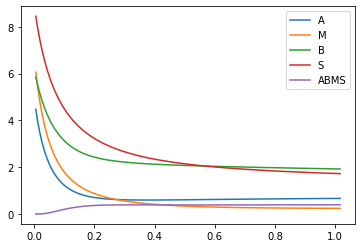

In [8]:
optim.plot_observable(0)


**After 750 optimization iterations**


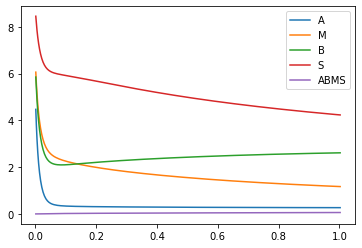

In [9]:
optim.plot_observable(-1)


In [ ]:
optim.plot_yield()

It seems like we've found a stable solution that produces greater yield than equilibrium. This should be thermodynamically
impossible. Let's try to find an explanation. We'll run simulations using the learned optimal parameters at a few different
timescales.

In [ ]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots(1, 3)
optim_rn = optim.rn
for i, runtime in enumerate([1, 8, 64]):
    optim_rn.reset()
    sim = VecSim(optim_rn, runtime, device='cpu')
    y = sim.simulate()
    sim.plot_observable(ax=ax[i])
    ax[i].set_title("runtime: " + str(runtime) + " seconds")
fig.set_size_inches(18, 6)
plt.show()

Clearly, the equilibrium reached by the system still matches the equilibrium solution. We have however found a set of parameters that can increase available complete AP2 at some point before equilibrium to levels significantly higher than at equilibrium. We don't observe any trapping, but have uncovered an interesting effect. 

Now we'll move on to looking at ARP23. This is 7 subunits, which drastically increases the number of possible reactions. Expect longer runtimes. 

In [ ]:
base_input = '../input_files/arp23.pwr'
rn = ReactionNetwork(base_input, one_step=True)
rn.resolve_tree()
vec_rn = VectorizedRxnNet(rn, dev='cpu')

## Equilibrium Solution for ARP23 ##

Observables and naming are designed to work with single characters, so we use the following scheme:

- ARC2: A
- ARC3: B
- ARC15: C
- ARC18: D
- ARC19: E
- ARC35: F
- ARC40: G

In [ ]:
vec_rn.update_reaction_net(rn)
poly_system = EquilibriumSolver(rn)
solution = poly_system.solve()
print(solution)
print("Equilibrium expected yield: ", 100 * solution[-1] / min(vec_rn.initial_copies[:vec_rn.num_monomers]), '%')

In [ ]:
vec_rn.reset(reset_params=True)
optim = Optimizer(reaction_network=vec_rn,
                  sim_runtime=1,
                  optim_iterations=1000,
                  learning_rate=.01,jk
                  
                  device='cpu')
optim.rn.update_reaction_net(rn)
optim.optimize()

In [ ]:
optim.plot_observable(0)

In [ ]:
optim.plot_observable(-1)

In [ ]:
optim.plot_yield()

In [ ]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots(1, 3)
optim_rn = optim.rn
for i, runtime in enumerate([1, 8, 64]):
    optim_rn.reset()
    sim = VecSim(optim_rn, runtime, device='cpu')
    y = sim.simulate()
    sim.plot_observable(ax=ax[i])
    ax[i].set_title("runtime: " + str(runtime) + " seconds")
fig.set_size_inches(18, 6)
plt.show()